###DATATONE

---
한국은행


출처:
한국은행 경제통계시스템(ECOS)


*   공식 사이트: https://ecos.bok.or.kr/api/#/ServiceUse/ServiceUseHow



In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests
import json

In [ ]:
#matplotlib 한글화
!sudo apt-get update
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic')  # 또는 'NanumGothic', 설치된 것 중에서 선택
mpl.rcParams['axes.unicode_minus'] = False


In [ ]:
plt.plot([1, 2, 3], [1, 4, 9])
plt.title('한글 제목 테스트')
plt.xlabel('X축')
plt.ylabel('Y축')
plt.show()


데이터 불러오기 한국은행 API

###주제


---

주제: 소비자 물가 상승세가 임금으로 적용 가능 임금 인상 예측

데이터 수집: 한국은행 API

*   소비자 물가 지수
*   직종별 평균 임금
* 시장금리
* 실업률





주택담보대출

In [ ]:
#주택담보대출 불러오기

house_df = pd.read_csv("/content/예금은행 대출금리(신규취급액 기준)_18131938.csv",encoding='cp949')
house_df

시점          고정형 주택담보대출 3)          변동형 주택담보대출 3)        주택담보대출
0   2020-01-01                   2.42                   2.90          2.51
1   2020-02-01                   2.47                   2.74          2.52
2   2020-03-01                   2.43                   2.66          2.48
3   2020-04-01                   2.55                   2.66          2.58
4   2020-05-01                   2.52                   2.53          2.52
5   2020-06-01                   2.52                   2.43          2.49
6   2020-07-01                   2.50                   2.37          2.45
7   2020-08-01                   2.43                   2.32          2.39
8   2020-09-01                   2.46                   2.42          2.44
9   2020-10-01                   2.46                   2.49          2.47
10  2020-11-01                   2.52                   2.62          2.56
11  2020-12-01                   2.51                   2.71          2.59
12  2021-01-01                   2.57                   2.70          2.63
13  2021-02-01                   2.62                   2.71          2.66
14  2021-03-01                   2.71                   2.77          2.73
15  2021-04-01                   2.71                   2.75          2.73
16  2021-05-01                   2.74                   2.66          2.69
17  2021-06-01                   2.83                   2.68          2.74
18  2021-07-01                   2.92                   2.73          2.81
19  2021-08-01                   2.98                   2.78          2.88
20  2021-09-01                   3.11                   2.87          3.01
21  2021-10-01                   3.38                   3.05          3.26
22  2021-11-01                   3.55                   3.41          3.51
23  2021-12-01                   3.58                   3.76          3.63
24  2022-01-01                   3.83                   3.92          3.85
25  2022-02-01                   3.88                   3.85          3.88
26  2022-03-01                   3.84                   3.82          3.84
27  2022-04-01                   3.98                   3.77          3.90
28  2022-05-01                   4.02                   3.77          3.90
29  2022-06-01                   4.17                   3.87          4.04
30  2022-07-01                   4.22                   4.05          4.16
31  2022-08-01                   4.36                   4.29          4.35
32  2022-09-01                   4.86                   4.57          4.79
33  2022-10-01                   4.82                   4.81          4.82
34  2022-11-01                   4.63                   5.16          4.74
35  2022-12-01                   4.50                   5.37          4.63
36  2023-01-01                   4.48                   5.37          4.58
37  2023-02-01                   4.50                   4.95          4.56
38  2023-03-01                   4.35                   4.76          4.40
39  2023-04-01                   4.21                   4.56          4.24
40  2023-05-01                   4.18                   4.52          4.21
41  2023-06-01                   4.23                   4.45          4.26
42  2023-07-01                   4.25                   4.57          4.28
43  2023-08-01                   4.28                   4.63          4.31
44  2023-09-01                   4.33                   4.61          4.35
45  2023-10-01                   4.55                   4.66          4.56
46  2023-11-01                   4.43                   4.70          4.48
47  2023-12-01                   4.09                   4.70          4.16
48  2024-01-01                   3.94                   4.59          3.99
49  2024-02-01                   3.93                   4.26          3.96
50  2024-03-01                   3.90                   4.31          3.94
51  2024-04-01                   3.91                   4.29          3.93
52  2024-05-01                   3.89

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   시점                     60 non-null     object 
 1           고정형 주택담보대출 3)  60 non-null     float64
 2           변동형 주택담보대출 3)  60 non-null     float64
 3         주택담보대출           60 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [ ]:
house_df.columns

Index(['시점', '        고정형 주택담보대출 3)', '        변동형 주택담보대출 3)', '      주택담보대출'], dtype='object')

In [ ]:
house_df.rename(columns={'        고정형 주택담보대출 3)':'고정형 주택담보대출','        변동형 주택담보대출 3)':'변동형 주택담보대출','      주택담보대출':'주택담보대출'},inplace=True)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          60 non-null     object 
 1   고정형 주택담보대출  60 non-null     float64
 2   변동형 주택담보대출  60 non-null     float64
 3   주택담보대출      60 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [ ]:
house_df['시점'] = pd.to_datetime(house_df['시점'])
print(house_df.info())
house_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시점          60 non-null     datetime64[ns]
 1   고정형 주택담보대출  60 non-null     float64       
 2   변동형 주택담보대출  60 non-null     float64       
 3   주택담보대출      60 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 KB
None


시점  고정형 주택담보대출  변동형 주택담보대출  주택담보대출
0 2020-01-01        2.42        2.90    2.51
1 2020-02-01        2.47        2.74    2.52
2 2020-03-01        2.43        2.66    2.48
3 2020-04-01        2.55        2.66    2.58
4 2020-05-01        2.52        2.53    2.52

In [ ]:
house_df.to_csv("주택담보대출.csv")

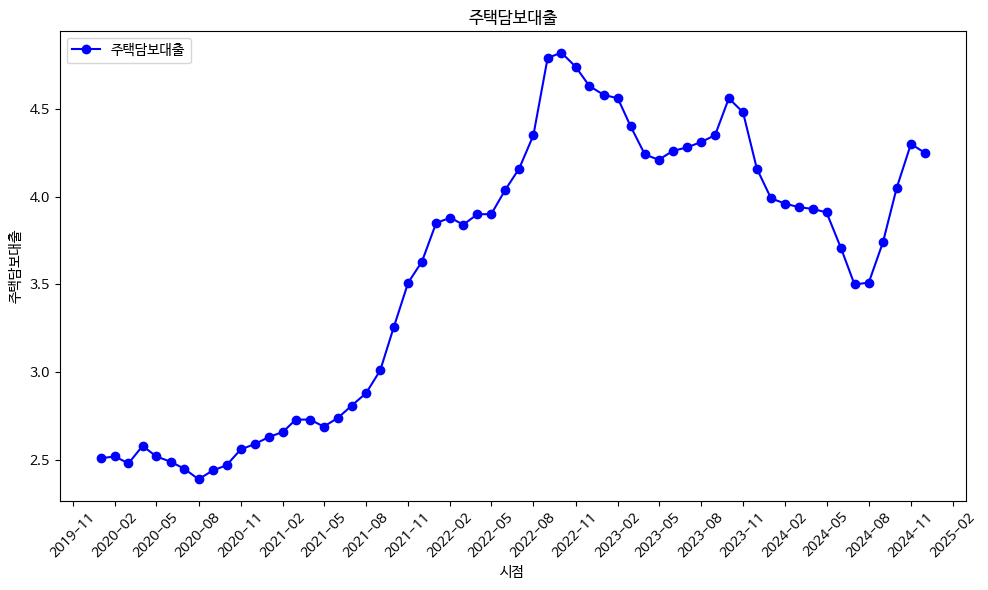

In [ ]:
import matplotlib.dates as mdates

x = house_df['시점']
y = house_df['주택담보대출']

plt.figure(figsize=(10, 6))  # 그래프 크기 조정 (선택)

# 날짜 포맷 설정: YYYY-MM 형식 + 3개월 간격 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.title("주택담보대출")
plt.xlabel("시점")
plt.ylabel("주택담보대출")
plt.plot(x, y, 'bo-',label='주택담보대출')
plt.legend(loc='upper left')

plt.tight_layout()  # 레이아웃 자동 조정 (레이블 안 잘리게)
plt.show()

혼인율

In [ ]:
#혼인율 불러오기
married_df = pd.read_csv("/content/월.분기.연간_인구동향_출생_사망_혼인_이혼__20250418142652.csv",encoding='cp949')
married_df

시점  출생아수(명)  조출생률(천명당)  사망자수(명)  조사망률(천명당)  자연증가건수(명)  자연증가율(천명당)  \
0   2020-01-01    26646        6.1    28430        6.5      -1784        -0.4   
1   2020-02-01    22759        5.6    25423        6.2      -2664        -0.7   
2   2020-03-01    24190        5.6    25850        5.9      -1660        -0.4   
3   2020-04-01    23299        5.5    24674        5.9      -1375        -0.3   
4   2020-05-01    22847        5.3    24346        5.6      -1499        -0.3   
..         ...      ...        ...      ...        ...        ...         ...   
56  2024-09-01    20564        4.9    29242        7.0      -8678        -2.1   
57  2024-10-01    21404        5.0    29806        6.9      -8402        -1.9   
58  2024-11-01    20045        4.8    29211        7.0      -9166        -2.2   
59  2024-12-01    18192        4.2    32468        7.5     -14276        -3.3   
60  2025-01-01    23947        5.5    39473        9.1     -15526        -3.6   

    혼인건수(건)  조혼인율(천명당)  
0     19819        4.6  
1     19103        4.7  
2     19358        4.5  
3     15669        3.7  
4     18144        4.2  
..      ...        ...  
56    15367        3.7  
57    19551        4.5  
58    18581        4.4  
59    22519        5.2  
60    20153        4.7  

[61 rows x 9 columns]

In [ ]:
married_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          61 non-null     object 
 1   출생아수(명)     61 non-null     int64  
 2   조출생률(천명당)   61 non-null     float64
 3   사망자수(명)     61 non-null     int64  
 4   조사망률(천명당)   61 non-null     float64
 5   자연증가건수(명)   61 non-null     int64  
 6   자연증가율(천명당)  61 non-null     float64
 7   혼인건수(건)     61 non-null     int64  
 8   조혼인율(천명당)   61 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 4.4+ KB


In [ ]:
married_df['시점'] = pd.to_datetime(married_df['시점'])
print(married_df.info())
married_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   시점          61 non-null     datetime64[ns]
 1   출생아수(명)     61 non-null     int64         
 2   조출생률(천명당)   61 non-null     float64       
 3   사망자수(명)     61 non-null     int64         
 4   조사망률(천명당)   61 non-null     float64       
 5   자연증가건수(명)   61 non-null     int64         
 6   자연증가율(천명당)  61 non-null     float64       
 7   혼인건수(건)     61 non-null     int64         
 8   조혼인율(천명당)   61 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 4.4 KB
None


시점  출생아수(명)  조출생률(천명당)  사망자수(명)  조사망률(천명당)  자연증가건수(명)  자연증가율(천명당)  \
0 2020-01-01    26646        6.1    28430        6.5      -1784        -0.4   
1 2020-02-01    22759        5.6    25423        6.2      -2664        -0.7   
2 2020-03-01    24190        5.6    25850        5.9      -1660        -0.4   
3 2020-04-01    23299        5.5    24674        5.9      -1375        -0.3   
4 2020-05-01    22847        5.3    24346        5.6      -1499        -0.3   

   혼인건수(건)  조혼인율(천명당)  
0    19819        4.6  
1    19103        4.7  
2    19358        4.5  
3    15669        3.7  
4    18144        4.2

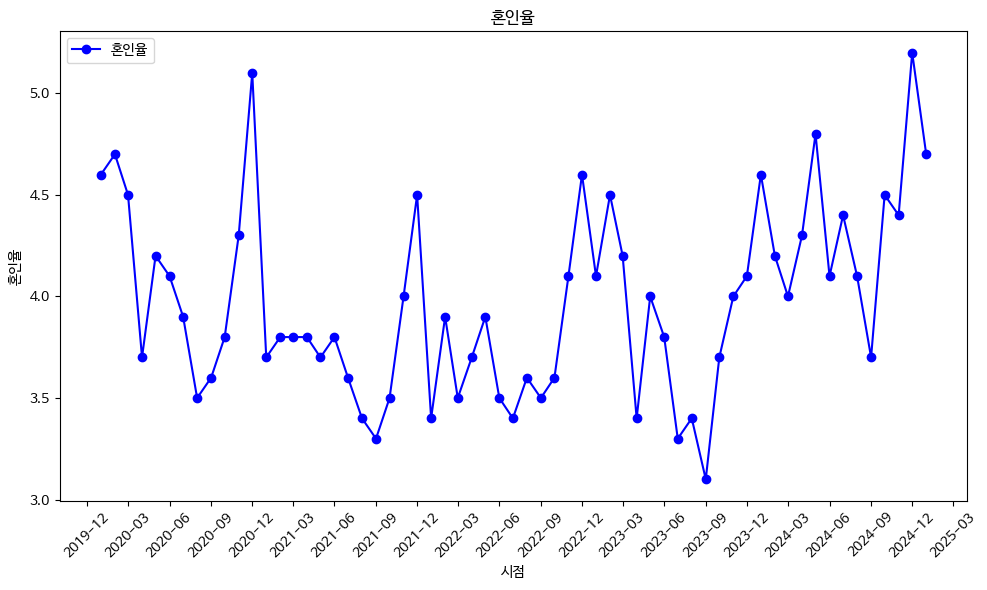

In [ ]:
import matplotlib.dates as mdates

x = married_df['시점']
y = married_df['조혼인율(천명당)']

plt.figure(figsize=(10, 6))  # 그래프 크기 조정 (선택)

# 날짜 포맷 설정: YYYY-MM 형식 + 3개월 간격 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.title("혼인율")
plt.xlabel("시점")
plt.ylabel("혼인율")
plt.plot(x, y, 'bo-',label='혼인율')
plt.legend(loc='upper left')

plt.tight_layout()  # 레이아웃 자동 조정 (레이블 안 잘리게)
plt.show()

혼인율

In [ ]:
#혼인율 불러오기
y_married_df = pd.read_csv("/content/시도_성_연령별_혼인율_20250418171607.csv",encoding='cp949')
y_married_df

시점  15 - 19세(남)  15 - 19세(여)  20 - 24세(남)  20 - 24세(여)  25 - 29세(남)  \
0  2020          0.2          1.2          2.9          8.0         25.2   
1  2021          0.2          0.7          2.6          6.6         22.0   
2  2022          0.2          0.9          2.6          7.0         20.4   
3  2023          0.2          1.2          2.5          7.0         19.2   
4  2024          0.2          1.3          2.6          7.4         22.8   

   25 - 29세(여)  30 - 34세(남)  30 - 34세(여)  35 - 39세(남)  ...  55 - 59세(남)  \
0         44.9         47.6         44.0         20.5  ...          2.5   
1         38.2         42.1         40.8         19.5  ...          2.4   
2         35.7         40.3         41.3         20.9  ...          2.5   
3         34.2         40.1         42.7         22.5  ...          2.6   
4         40.3         48.3         51.9         26.7  ...          2.6   

   55 - 59세(여)  60 - 64세(남)  60 - 64세(여)  65 - 69세(남)  65 - 69세(여)  \
0            2          1.8          1.2          1.1          0.7   
1            2          1.8          1.2          1.1          0.7   
2            2          1.8          1.2          1.1          0.7   
3            2          1.9          1.3          1.2          0.7   
4            2          1.9          1.3          1.2          0.8   

   70 - 74세(남)  70 - 74세(여)  75세이상(남)  75세이상(여)  
0          0.9          0.4       0.6       0.2  
1          0.9          0.5       0.6       0.2  
2          0.8          0.5       0.6       0.2  
3          0.9          0.5       0.7       0.2  
4          0.9          0.6       0.7       0.2  

[5 rows x 29 columns]

In [ ]:
y_married_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시점           5 non-null      int64  
 1   15 - 19세(남)  5 non-null      float64
 2   15 - 19세(여)  5 non-null      float64
 3   20 - 24세(남)  5 non-null      float64
 4   20 - 24세(여)  5 non-null      float64
 5   25 - 29세(남)  5 non-null      float64
 6   25 - 29세(여)  5 non-null      float64
 7   30 - 34세(남)  5 non-null      float64
 8   30 - 34세(여)  5 non-null      float64
 9   35 - 39세(남)  5 non-null      float64
 10  35 - 39세(여)  5 non-null      float64
 11  40 - 44세(남)  5 non-null      float64
 12  40 - 44세(여)  5 non-null      float64
 13  45 - 49세(남)  5 non-null      float64
 14  45 - 49세(여)  5 non-null      float64
 15  50 - 54세(남)  5 non-null      float64
 16  50 - 54세(여)  5 non-null      float64
 17  55세이상(남)     5 non-null      float64
 18  55세이상(여)     5 non-null      int64  
 19  55 - 59세(남) 

In [ ]:
y_married_df['시점'] = pd.to_datetime(y_married_df['시점'].astype(str) + '-01')
y_married_df.head()

<ipython-input-51-ae25fab9dbf0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  y_married_df['시점'] = pd.to_datetime(y_married_df['시점'].astype(str) + '-01')


시점  15 - 19세(남)  15 - 19세(여)  20 - 24세(남)  \
0 1970-01-01 00:00:00.000002-01:00          0.2          1.2          2.9   
1 1970-01-01 00:00:00.000002-01:00          0.2          0.7          2.6   
2 1970-01-01 00:00:00.000002-01:00          0.2          0.9          2.6   
3 1970-01-01 00:00:00.000002-01:00          0.2          1.2          2.5   
4 1970-01-01 00:00:00.000002-01:00          0.2          1.3          2.6   

   20 - 24세(여)  25 - 29세(남)  25 - 29세(여)  30 - 34세(남)  30 - 34세(여)  \
0          8.0         25.2         44.9         47.6         44.0   
1          6.6         22.0         38.2         42.1         40.8   
2          7.0         20.4         35.7         40.3         41.3   
3          7.0         19.2         34.2         40.1         42.7   
4          7.4         22.8         40.3         48.3         51.9   

   35 - 39세(남)  ...  55 - 59세(여)  60 - 64세(남)  60 - 64세(여)  65 - 69세(남)  \
0         20.5  ...            2          1.8          1.2          1.1   
1         19.5  ...            2          1.8          1.2          1.1   
2         20.9  ...            2          1.8          1.2          1.1   
3         22.5  ...            2          1.9          1.3          1.2   
4         26.7  ...            2          1.9          1.3          1.2   

   65 - 69세(여)  70 - 74세(남)  70 - 74세(여)  75세이상(남)  75세이상(여)  \
0          0.7          0.9          0.4       0.6       0.2   
1          0.7          0.9          0.5       0.6       0.2   
2          0.7          0.8          0.5       0.6       0.2   
3          0.7          0.9          0.5       0.7       0.2   
4          0.8          0.9          0.6       0.7       0.2   

                              date  
0 1970-01-01 00:00:00.000002-01:00  
1 1970-01-01 00:00:00.000002-01:00  
2 1970-01-01 00:00:00.000002-01:00  
3 1970-01-01 00:00:00.000002-01:00  
4 1970-01-01 00:00:00.000002-01:00  

[5 rows x 30 columns]

현재경기판단CSI

In [ ]:
current_df = pd.read_excel('/content/현재경기판단.xlsx',sheet_name='Sheet1')
current_df.columns

Index(['시점', '    40세미만', '전체'], dtype='object')

In [ ]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   시점         61 non-null     datetime64[ns]
 1       40세미만  61 non-null     int64         
 2   전체         61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


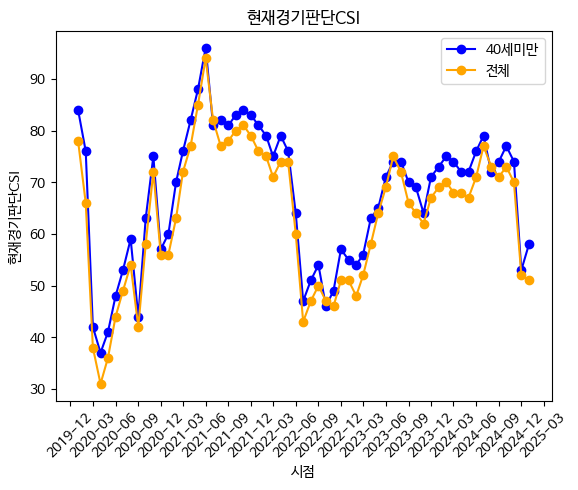

In [ ]:
import matplotlib.dates as mdates

# 날짜 포맷 설정: YYYY-MM 형식 + 3개월 간격 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
x=current_df['시점']
y1= current_df['    40세미만']
y2= current_df['전체']
plt.title("현재경기판단CSI")
plt.xlabel("시점")
plt.ylabel("현재경기판단CSI")

plt.plot(x,y1,color='blue', marker='o', linestyle='solid',label='40세미만')
plt.plot(x,y2,color='orange', marker='o', linestyle='solid',label='전체')
plt.legend()
plt.show()

In [ ]:
#향후경기전망
score_df = pd.read_excel('/content/향후경기전망.xlsx',sheet_name='Sheet1')
score_df.columns

Index(['시점', '    40세미만', '전체'], dtype='object')

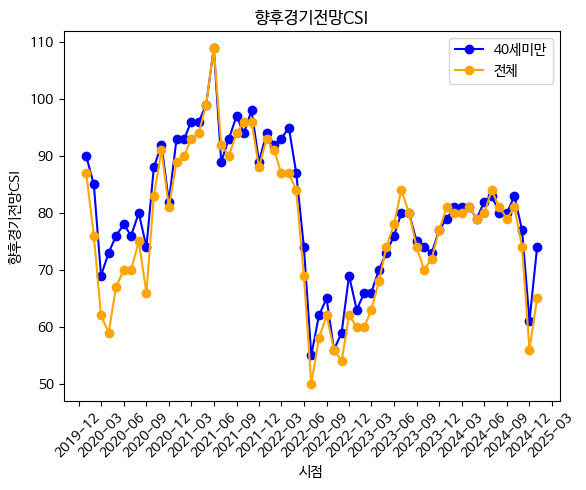

In [ ]:
import matplotlib.dates as mdates

# 날짜 포맷 설정: YYYY-MM 형식 + 3개월 간격 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
x=score_df['시점']
y1= score_df['    40세미만']
y2= score_df['전체']
plt.title("향후경기전망CSI")
plt.xlabel("시점")
plt.ylabel("향후경기전망CSI")

plt.plot(x,y1,color='blue', marker='o', linestyle='solid',label='40세미만')
plt.plot(x,y2,color='orange', marker='o', linestyle='solid',label='전체')
plt.legend()
plt.show()

In [ ]:
store_df =pd.read_excel('/content/가계수입전망.xlsx',sheet_name='Sheet1')
store_df.head()

시점      40세미만   전체
0 2020-01-01        109  101
1 2020-02-01        105   97
2 2020-03-01         95   87
3 2020-04-01         93   83
4 2020-05-01         91   87

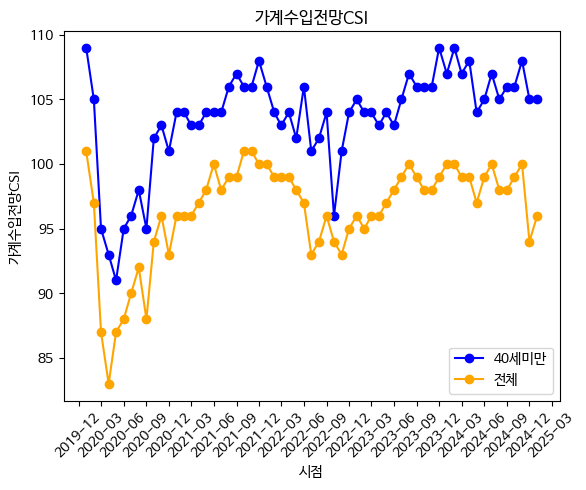

In [ ]:
# 날짜 포맷 설정: YYYY-MM 형식 + 3개월 간격 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
x=store_df['시점']
y1= store_df['    40세미만']
y2= store_df['전체']
plt.title("가계수입전망CSI")
plt.xlabel("시점")
plt.ylabel("가계수입전망CSI")

plt.plot(x,y1,color='blue', marker='o', linestyle='solid',label='40세미만')
plt.plot(x,y2,color='orange', marker='o', linestyle='solid',label='전체')
plt.legend()
plt.show()

혼인률

In [ ]:
married_df = pd.read_csv("/content/혼인율.csv",encoding='cp949')
married_df

시점  20 - 24세(남)  20 - 24세(여)  25 - 29세(남)  25 - 29세(여)  30 - 34세(남)  \
0  2020          2.9          8.0         25.2         44.9         47.6   
1  2021          2.6          6.6         22.0         38.2         42.1   
2  2022          2.6          7.0         20.4         35.7         40.3   
3  2023          2.5          7.0         19.2         34.2         40.1   
4  2024          2.6          7.4         22.8         40.3         48.3   

   30 - 34세(여)  35 - 39세(남)  35 - 39세(여)       남      여  
0         44.0         20.5         14.3  24.050  27.80  
1         40.8         19.5         13.8  21.550  24.85  
2         41.3         20.9         15.0  21.050  24.75  
3         42.7         22.5         16.3  21.075  25.05  
4         51.9         26.7         19.2  25.100  29.70

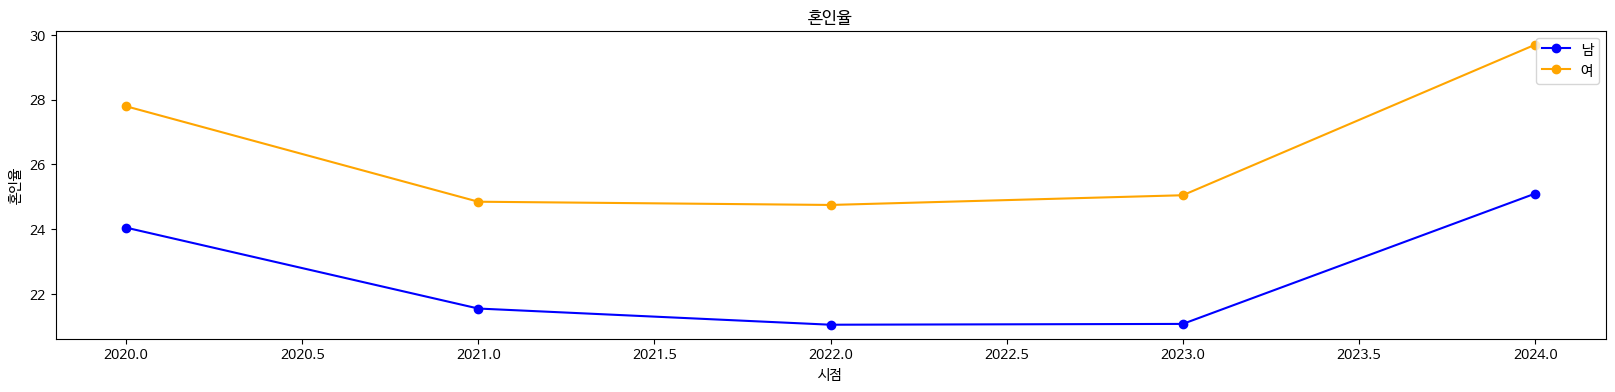

In [ ]:
x=married_df['시점']
y_m= married_df['남']
y_f= married_df['여']


plt.figure(figsize=(20,4))
plt.title("혼인율")
plt.xlabel("시점")
plt.ylabel("혼인율")
plt.plot(x,y_m,color='blue', marker='o', linestyle='solid',label='남')
plt.plot(x,y_f,color='orange', marker='o', linestyle='solid',label='여')
plt.legend()
plt.show()

소비자동향 상관관계 분석


---
목표: 전체 CSI 와 2030 CSI 데이터 추출 후 각각 CCSI와 상관관계 분석


In [ ]:
#전체 소비자지출 데이터 불려오기

entire_con_df = pd.read_excel('/content/전체소비자수정.xlsx',sheet_name='Sheet1')
entire_con_df.info()
print(entire_con_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   날짜                   61 non-null     datetime64[ns]
 1   교양·오락·문화생활비 지출전망CSI  61 non-null     int64         
 2   교육비 지출전망CSI          61 non-null     int64         
 3   교통비 및 통신비 지출전망CSI    61 non-null     int64         
 4   내구재 지출전망CSI          61 non-null     int64         
 5   여행비 지출전망CSI          61 non-null     int64         
 6   외식비 지출전망CSI          61 non-null     int64         
 7   의료·보건비 지출전망CSI       61 non-null     int64         
 8   의류비 지출전망CSI          61 non-null     int64         
 9   주거비 지출전망CSI          61 non-null     int64         
 10  가계수입전망CSI            61 non-null     int64         
 11  소비지출전망CSI            61 non-null     int64         
 12  소비자심리지수              61 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int

In [ ]:
entire_con_corr = entire_con_df.drop(columns='날짜')
corr=entire_con_corr.corr()

# 'ccsi' 컬럼과 다른 변수들 간의 상관계수만 추출
ccsi_corr = corr[['소비자심리지수']].drop('소비자심리지수')

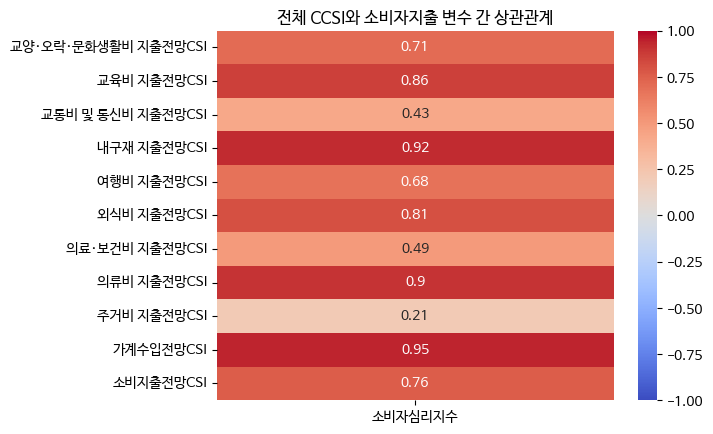

In [ ]:
sns.heatmap(ccsi_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('전체 CCSI와 소비자지출 변수 간 상관관계')
plt.show()

In [ ]:
# 2030 소비자동향 데이터 불러오기
young_consum_df = pd.read_excel("/content/2030소비자수정.xlsx",sheet_name='Sheet1')
young_consum_df.info()
print(young_consum_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   날짜                   61 non-null     datetime64[ns]
 1   교양·오락·문화생활비 지출전망CSI  61 non-null     int64         
 2   교육비 지출전망CSI          61 non-null     int64         
 3   교통비 및 통신비 지출전망CSI    61 non-null     int64         
 4   내구재 지출전망CSI          61 non-null     int64         
 5   여행비 지출전망CSI          61 non-null     int64         
 6   외식비 지출전망CSI          61 non-null     int64         
 7   의료·보건비 지출전망CSI       61 non-null     int64         
 8   의류비 지출전망CSI          61 non-null     int64         
 9   주거비 지출전망CSI          61 non-null     int64         
 10  가계수입전망CSI            61 non-null     int64         
 11  소비지출전망CSI            61 non-null     int64         
 12  소비자심리지수              61 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int

In [ ]:
young_con_corr = young_consum_df.drop(columns='날짜')
corr=young_con_corr.corr()

# 'ccsi' 컬럼과 다른 변수들 간의 상관계수만 추출
young_ccsi_corr = corr[['소비자심리지수']].drop('소비자심리지수')

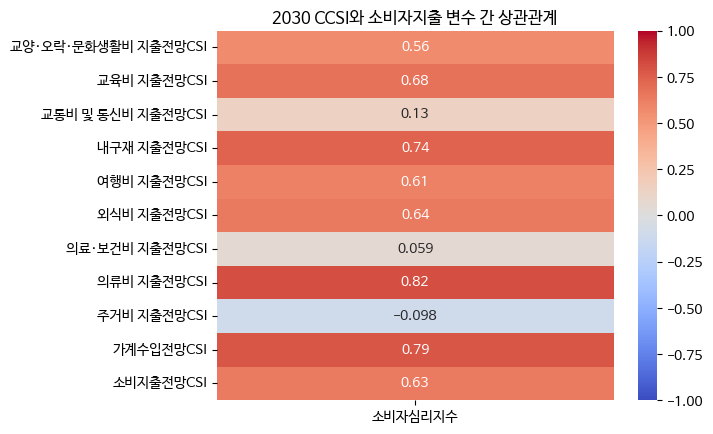

In [ ]:
sns.heatmap(young_ccsi_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('2030 CCSI와 소비자지출 변수 간 상관관계')
plt.show()

EDA

---



*   유형별 주택매매가격지수

*   유형별 주택전세가격지수
*   유형별 주택월세가격지수


*   예금취급기관 가계대출



1.데이터 로드 및 구조 확인

2.기술 통계 확인

3.결측치 및 이상치 처리

4.데이터 유형 확인 및 변환

5.시각화

6.상관관계



주택매매가격지수

In [ ]:
#주택매매가격지수
bargain_df = pd.read_excel('/content/주택매매가격지수.xlsx',sheet_name='Sheet1')
bargain_df
print(bargain_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      60 non-null     datetime64[ns]
 1   단독주택    60 non-null     float64       
 2   아파트     60 non-null     float64       
 3   연립다세대   60 non-null     float64       
 4   종합      60 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.5 KB
None


In [ ]:
numeric_bargain= bargain_df.select_dtypes(include=['number'])
numeric_bargain.describe()

단독주택         아파트       연립다세대          종합
count   60.000000   60.000000   60.000000   60.000000
mean   102.168333   97.588333   99.353333   98.700000
std      3.874099    3.978037    1.760823    2.914895
min     94.200000   92.600000   97.000000   95.100000
25%     99.025000   94.200000   98.100000   96.500000
50%    104.000000   96.350000   98.750000   97.550000
75%    104.900000  100.950000  100.700000  100.775000
max    107.600000  104.400000  102.400000  103.700000

<Axes: >

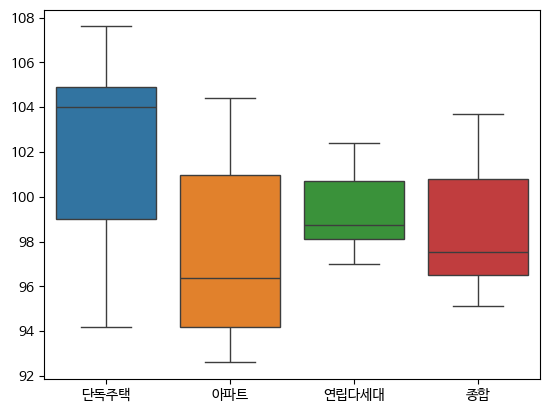

In [ ]:
sns.boxplot(data=numeric_bargain)

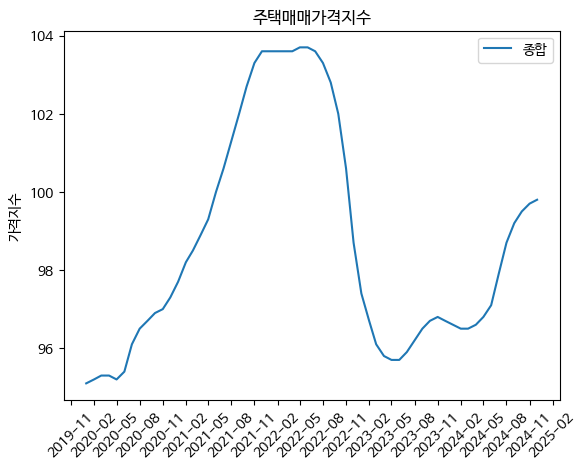

In [ ]:
#시각화
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
x = bargain_df['날짜']
y = bargain_df['종합']
plt.title("주택매매가격지수")
plt.ylabel("가격지수")
plt.plot(x,y,label='종합')
plt.legend()
plt.show()

In [ ]:
bargain=bargain_df[['날짜','종합']]
bargain.info()
bargain.rename(columns={'종합':'주택매매가격종합'},inplace=True)
print(bargain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      60 non-null     datetime64[ns]
 1   종합      60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        60 non-null     datetime64[ns]
 1   주택매매가격종합  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB
None


<ipython-input-5-4efb76b41d49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bargain.rename(columns={'종합':'주택매매가격종합'},inplace=True)


In [ ]:
numeric_bargain.corr()

단독주택       아파트     연립다세대        종합
단독주택   1.000000  0.108305  0.333167  0.301308
아파트    0.108305  1.000000  0.912225  0.977727
연립다세대  0.333167  0.912225  1.000000  0.962440
종합     0.301308  0.977727  0.962440  1.000000

In [ ]:
bargain_corr=numeric_bargain.corr()
bargain_total_corr = bargain_corr[['종합']].drop('종합')

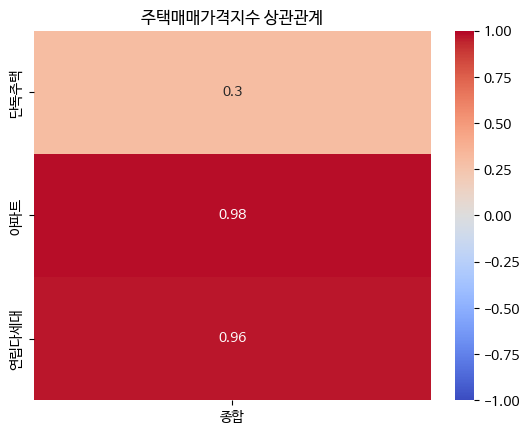

In [ ]:
sns.heatmap(bargain_total_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('주택매매가격지수 상관관계')
plt.show()

주택전세가격지수

In [ ]:
charter_df = pd.read_excel("/content/주택전세가격지수.xlsx",sheet_name='Sheet1')
print(charter_df.info())
charter_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      60 non-null     datetime64[ns]
 1   단독주택    60 non-null     float64       
 2   아파트     60 non-null     float64       
 3   연립다세대   60 non-null     float64       
 4   종합      60 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.5 KB
None


날짜  단독주택   아파트  연립다세대    종합
0 2020-01-01  98.2  92.7   97.3  94.9
1 2020-02-01  98.3  92.9   97.4  95.0
2 2020-03-01  98.3  93.1   97.5  95.1
3 2020-04-01  98.3  93.2   97.5  95.2
4 2020-05-01  98.3  93.2   97.5  95.2

In [ ]:
numeric_charter= charter_df.select_dtypes(include=['number'])
numeric_charter.describe()

단독주택         아파트       연립다세대          종합
count   60.000000   60.000000   60.000000   60.000000
mean   100.141667   94.090000   98.456667   96.136667
std      0.983817    6.782997    2.220274    4.622017
min     98.200000   83.400000   95.900000   89.200000
25%     99.650000   87.825000   96.275000   91.725000
50%    100.200000   93.350000   97.850000   95.550000
75%    100.900000  100.625000  100.525000  100.600000
max    101.400000  103.500000  101.900000  102.800000

<Axes: >

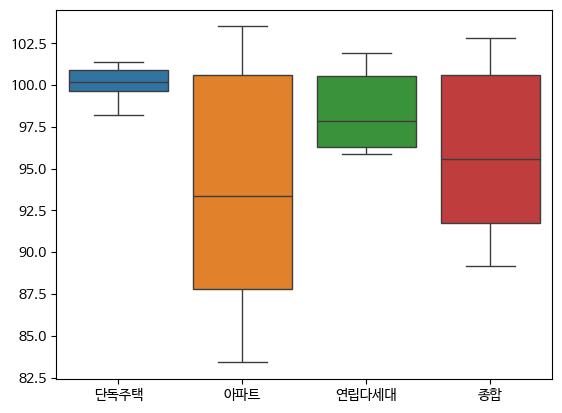

In [ ]:
sns.boxplot(data=numeric_charter)

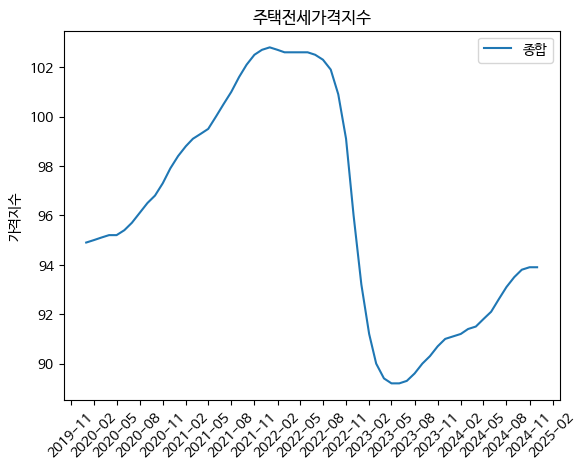

In [ ]:
#시각화
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
x = charter_df['날짜']
y = charter_df['종합']
plt.title("주택전세가격지수")
plt.ylabel("가격지수")
plt.plot(x,y,label='종합')
plt.legend()
plt.show()

In [ ]:
charter = charter_df[['날짜','종합']]
charter.rename(columns={'종합':'주택전세가격종합'},inplace=True)
print(charter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        60 non-null     datetime64[ns]
 1   주택전세가격종합  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB
None


<ipython-input-7-6c2d259901ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charter.rename(columns={'종합':'주택전세가격종합'},inplace=True)


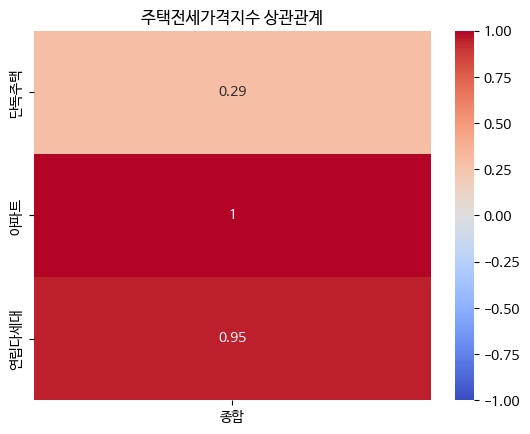

In [ ]:
charter_corr=numeric_charter.corr()
charter_total_corr = charter_corr[['종합']].drop('종합')
sns.heatmap(charter_total_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('주택전세가격지수 상관관계')
plt.show()

주택전세가격지수 최근에 올라가기 추세가 보여짐 ,종합이 올라가면 아파트, 연립다세대 올라감

주택월세통합가격지수

In [ ]:
rent_df = pd.read_excel('/content/주택월세통합가격지수.xlsx',sheet_name='Sheet1')
print(rent_df.info())
rent_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      60 non-null     datetime64[ns]
 1   단독주택    60 non-null     float64       
 2   아파트     60 non-null     float64       
 3   연립다세대   60 non-null     float64       
 4   종합      60 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.5 KB
None


날짜  단독주택   아파트  연립다세대    종합
0 2020-01-01  99.5  97.7   99.3  98.4
1 2020-02-01  99.5  97.8   99.3  98.5
2 2020-03-01  99.5  97.8   99.3  98.5
3 2020-04-01  99.5  97.9   99.3  98.5
4 2020-05-01  99.5  97.9   99.3  98.5

In [ ]:
numeric_rent= rent_df.select_dtypes(include=['number'])
numeric_rent.describe()

단독주택         아파트       연립다세대          종합
count   60.000000   60.000000   60.000000   60.000000
mean   100.456667  100.825000  100.581667  100.713333
std      0.645550    1.734166    0.797346    1.309996
min     99.500000   97.700000   99.300000   98.400000
25%     99.875000   99.700000   99.875000   99.775000
50%    100.600000  101.050000  100.800000  100.950000
75%    100.800000  102.025000  101.100000  101.600000
max    101.900000  104.200000  102.200000  103.300000

<Axes: >

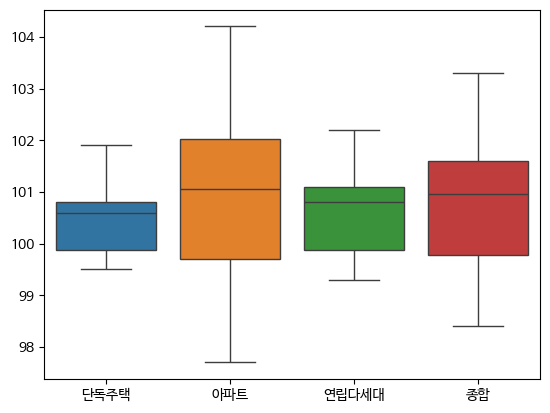

In [ ]:
sns.boxplot(data=numeric_rent)

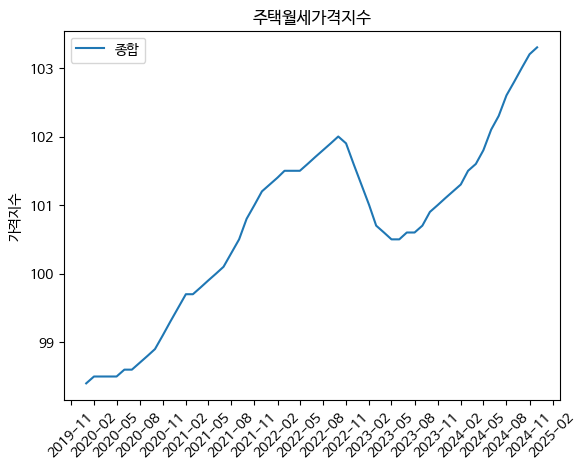

In [ ]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
x = rent_df['날짜']
y = rent_df['종합']
plt.title("주택월세가격지수")
plt.ylabel("가격지수")
plt.plot(x,y,label='종합')
plt.legend()
plt.show()

In [ ]:
rent = rent_df[['날짜','종합']]
rent.rename(columns={'종합':'주택월세가격종합'},inplace=True)
print(rent.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        60 non-null     datetime64[ns]
 1   주택월세가격종합  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB
None


<ipython-input-9-8eba7e57a2cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent.rename(columns={'종합':'주택월세가격종합'},inplace=True)


In [ ]:
house_prize = pd.concat([bargain,charter,rent],axis=1)
house_prize.info()
house_prize.drop(columns='날짜',inplace=True)
house_prize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        60 non-null     datetime64[ns]
 1   주택매매가격종합  60 non-null     float64       
 2   날짜        60 non-null     datetime64[ns]
 3   주택전세가격종합  60 non-null     float64       
 4   날짜        60 non-null     datetime64[ns]
 5   주택월세가격종합  60 non-null     float64       
dtypes: datetime64[ns](3), float64(3)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   주택매매가격종합  60 non-null     float64
 1   주택전세가격종합  60 non-null     float64
 2   주택월세가격종합  60 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


In [ ]:
house_prize.corr()

주택매매가격종합  주택전세가격종합  주택월세가격종합
주택매매가격종합  1.000000  0.835375  0.481687
주택전세가격종합  0.835375  1.000000 -0.027151
주택월세가격종합  0.481687 -0.027151  1.000000

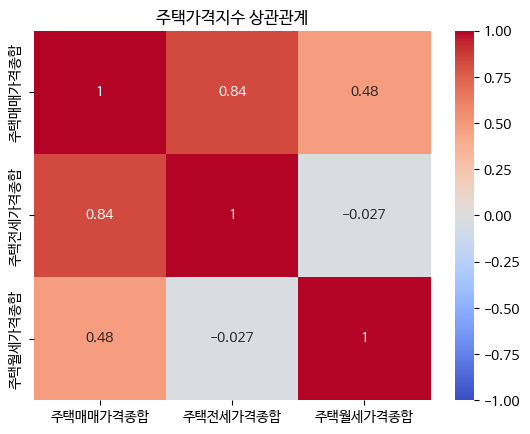

In [ ]:
sns.heatmap(house_prize.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('주택가격지수 상관관계')
plt.show()

가계대출

In [ ]:
loan_df = pd.read_excel('/content/가계대출.xlsx',sheet_name='Sheet1')
print(loan_df.info())
loan_df.drop(columns='주택담보대출-[참고] 주택금융공사 및 주택도시기금의 주택담보대출',inplace=True)
print(loan_df.info())
loan_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   날짜                                   60 non-null     datetime64[ns]
 1   기타대출-비은행예금취급기관                       60 non-null     float64       
 2   기타대출-예금은행                            60 non-null     float64       
 3   주택담보대출-비은행예금취급기관                     60 non-null     float64       
 4   주택담보대출-예금은행                          60 non-null     float64       
 5   기타대출-예금취급기관                          60 non-null     float64       
 6   주택담보대출-[참고] 주택금융공사 및 주택도시기금의 주택담보대출  60 non-null     float64       
 7   주택담보대출-예금취급기관                        60 non-null     float64       
 8   예금취급기관                               60 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 4.3 KB
None
<class 'pandas.core.frame.DataF

날짜  기타대출-비은행예금취급기관  기타대출-예금은행  주택담보대출-비은행예금취급기관  주택담보대출-예금은행  \
0 2020-01-01        216068.7   233159.8           98706.4     535576.6   
1 2020-02-01        216502.7   234639.8           97859.4     537423.4   
2 2020-03-01        216979.6   237954.0           96947.3     542650.8   
3 2020-04-01        217228.3   237899.5           96562.6     547830.4   
4 2020-05-01        217450.5   239017.1           96159.7     550427.7   

   기타대출-예금취급기관  주택담보대출-예금취급기관     예금취급기관  
0     449228.5       634283.0  1083511.5  
1     451142.5       635282.9  1086425.4  
2     454933.6       639598.1  1094531.8  
3     455127.8       644393.0  1099520.7  
4     456467.5       646587.4  1103055.0

In [ ]:
numeric_loan= loan_df.select_dtypes(include=['number'])
numeric_loan.describe()

기타대출-비은행예금취급기관      기타대출-예금은행  주택담보대출-비은행예금취급기관    주택담보대출-예금은행  \
count       60.000000      60.000000         60.000000      60.000000   
mean    224881.351667  256038.265000     103494.035000  631537.420000   
std      14813.268464   16100.378942       5231.099573   50328.026148   
min     198315.800000  233159.800000      94962.300000  535576.600000   
25%     216394.200000  239575.875000      97986.925000  599706.400000   
50%     224898.400000  251395.150000     104853.700000  634839.300000   
75%     238034.000000  269956.800000     106828.400000  660401.525000   
max     246464.300000  282762.700000     111959.000000  727848.900000   

         기타대출-예금취급기관  주택담보대출-예금취급기관        예금취급기관  
count      60.000000      60.000000  6.000000e+01  
mean   480919.615000  735031.463333  1.215951e+06  
std     30198.109285   54169.703435  5.297907e+04  
min    436564.100000  634283.000000  1.083512e+06  
25%    455079.250000  697482.775000  1.208962e+06  
50%    476288.550000  744380.600000  1.233898e+06  
75%    509000.200000  765739.725000  1.253130e+06  
max    529003.200000  839807.900000  1.276372e+06

<Axes: >

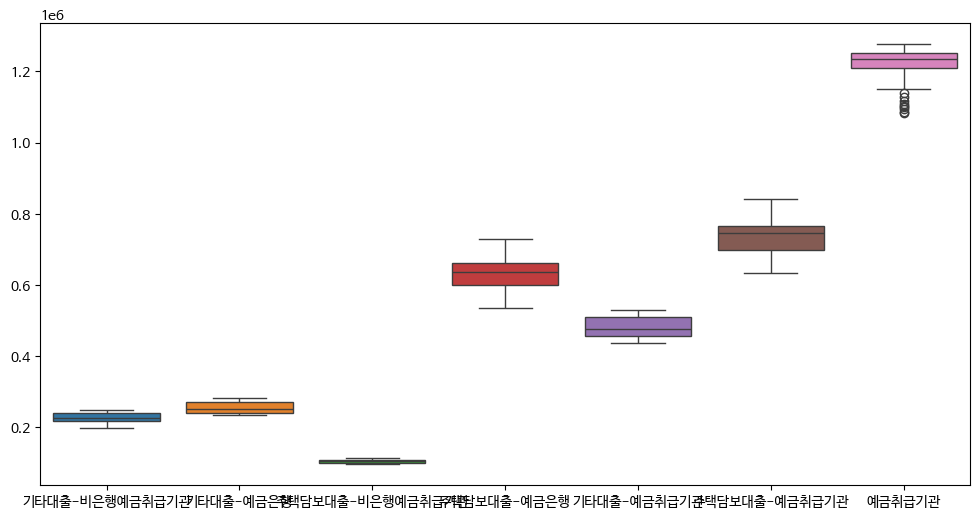

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_loan)

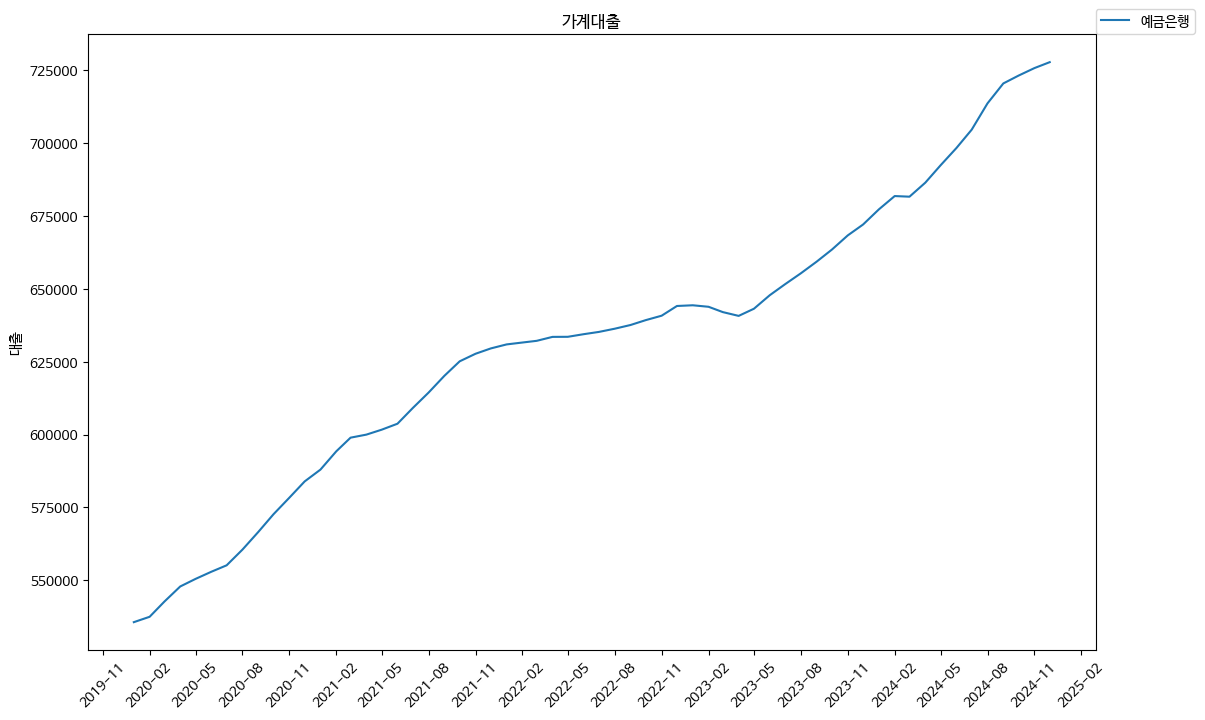

In [ ]:
plt.figure(figsize=(13,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
x = loan_df['날짜']
y = loan_df['주택담보대출-예금은행']
plt.title("가계대출")
plt.ylabel("대출")
plt.plot(x,y,label='예금은행')
plt.legend(loc=(1.0, 1.0))
plt.show()

In [ ]:
loan_house = pd.concat([house_prize,loan_df],axis=1)
loan_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   주택매매가격종합          60 non-null     float64       
 1   주택전세가격종합          60 non-null     float64       
 2   주택월세가격종합          60 non-null     float64       
 3   날짜                60 non-null     datetime64[ns]
 4   기타대출-비은행예금취급기관    60 non-null     float64       
 5   기타대출-예금은행         60 non-null     float64       
 6   주택담보대출-비은행예금취급기관  60 non-null     float64       
 7   주택담보대출-예금은행       60 non-null     float64       
 8   기타대출-예금취급기관       60 non-null     float64       
 9   주택담보대출-예금취급기관     60 non-null     float64       
 10  예금취급기관            60 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 5.3 KB


In [ ]:
loan_house_num=loan_house.select_dtypes(include=['number'])
loan_house_num.describe()

주택매매가격종합    주택전세가격종합    주택월세가격종합  기타대출-비은행예금취급기관      기타대출-예금은행  \
count   60.000000   60.000000   60.000000       60.000000      60.000000   
mean    98.700000   96.136667  100.713333   224881.351667  256038.265000   
std      2.914895    4.622017    1.309996    14813.268464   16100.378942   
min     95.100000   89.200000   98.400000   198315.800000  233159.800000   
25%     96.500000   91.725000   99.775000   216394.200000  239575.875000   
50%     97.550000   95.550000  100.950000   224898.400000  251395.150000   
75%    100.775000  100.600000  101.600000   238034.000000  269956.800000   
max    103.700000  102.800000  103.300000   246464.300000  282762.700000   

       주택담보대출-비은행예금취급기관    주택담보대출-예금은행    기타대출-예금취급기관  주택담보대출-예금취급기관  \
count         60.000000      60.000000      60.000000      60.000000   
mean      103494.035000  631537.420000  480919.615000  735031.463333   
std         5231.099573   50328.026148   30198.109285   54169.703435   
min        94962.300000  535576.600000  436564.100000  634283.000000   
25%        97986.925000  599706.400000  455079.250000  697482.775000   
50%       104853.700000  634839.300000  476288.550000  744380.600000   
75%       106828.400000  660401.525000  509000.200000  765739.725000   
max       111959.000000  727848.900000  529003.200000  839807.900000   

             예금취급기관  
count  6.000000e+01  
mean   1.215951e+06  
std    5.297907e+04  
min    1.083512e+06  
25%    1.208962e+06  
50%    1.233898e+06  
75%    1.253130e+06  
max    1.276372e+06

In [ ]:
loan_house_num.corr()

주택매매가격종합  주택전세가격종합  주택월세가격종합  기타대출-비은행예금취급기관  기타대출-예금은행  \
주택매매가격종합          1.000000  0.835375  0.481687        0.643933   0.753422   
주택전세가격종합          0.835375  1.000000 -0.027151        0.764922   0.835068   
주택월세가격종합          0.481687 -0.027151  1.000000       -0.184098  -0.034194   
기타대출-비은행예금취급기관    0.643933  0.764922 -0.184098        1.000000   0.908327   
기타대출-예금은행         0.753422  0.835068 -0.034194        0.908327   1.000000   
주택담보대출-비은행예금취급기관  0.428197 -0.055375  0.841296        0.048463  -0.020199   
주택담보대출-예금은행       0.180276 -0.344956  0.925007       -0.430381  -0.247989   
기타대출-예금취급기관       0.717566  0.820446 -0.108537        0.974819   0.978726   
주택담보대출-예금취급기관     0.208842 -0.325839  0.940649       -0.395179  -0.232352   
예금취급기관            0.622548  0.134493  0.899923        0.151588   0.320300   

                  주택담보대출-비은행예금취급기관  주택담보대출-예금은행  기타대출-예금취급기관  주택담보대출-예금취급기관  \
주택매매가격종합                  0.428197     0.180276     0.717566       0.208842   
주택전세가격종합                 -0.055375    -0.344956     0.820446      -0.325839   
주택월세가격종합                  0.841296     0.925007    -0.108537       0.940649   
기타대출-비은행예금취급기관            0.048463    -0.430381     0.974819      -0.395179   
기타대출-예금은행                -0.020199    -0.247989     0.978726      -0.232352   
주택담보대출-비은행예금취급기관          1.000000     0.710453     0.013004       0.756637   
주택담보대출-예금은행               0.710453     1.000000    -0.343335       0.997688   
기타대출-예금취급기관               0.013004    -0.343335     1.000000      -0.317730   
주택담보대출-예금취급기관             0.756637     0.997688    -0.317730       1.000000   
예금취급기관                    0.781053     0.824409     0.245130       0.841367   

                    예금취급기관  
주택매매가격종합          0.622548  
주택전세가격종합          0.134493  
주택월세가격종합          0.899923  
기타대출-비은행예금취급기관    0.151588  
기타대출-예금은행         0.320300  
주택담보대출-비은행예금취급기관  0.781053  
주택담보대출-예금은행       0.824409  
기타대출-예금취급기관       0.245130  
주택담보대출-예금취급기관     0.841367  
예금취급기관            1.000000

Text(0.5, 1.0, '주택가격 대출 상관관계')

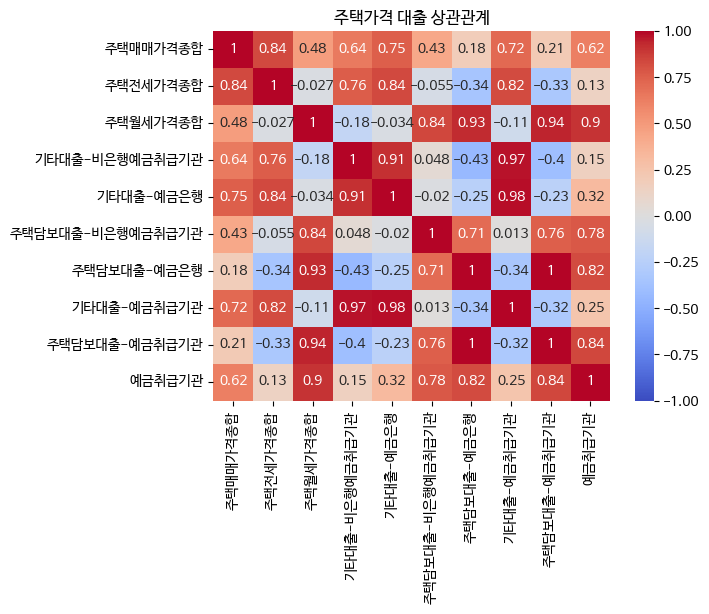

In [ ]:
sns.heatmap(loan_house_num.corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("주택가격 대출 상관관계")

In [ ]:
loan_house_num.columns

Index(['주택매매가격종합', '주택전세가격종합', '주택월세가격종합', '기타대출-비은행예금취급기관', '기타대출-예금은행',
       '주택담보대출-비은행예금취급기관', '주택담보대출-예금은행', '기타대출-예금취급기관', '주택담보대출-예금취급기관',
       '예금취급기관'],
      dtype='object')

In [ ]:
loan_house_num[['주택매매가격종합','주택전세가격종합', '주택월세가격종합','주택담보대출-예금은행']].corr()

주택매매가격종합  주택전세가격종합  주택월세가격종합  주택담보대출-예금은행
주택매매가격종합     1.000000  0.835375  0.481687     0.180276
주택전세가격종합     0.835375  1.000000 -0.027151    -0.344956
주택월세가격종합     0.481687 -0.027151  1.000000     0.925007
주택담보대출-예금은행  0.180276 -0.344956  0.925007     1.000000

Text(0.5, 1.0, '주택가격 대출 상관관계')

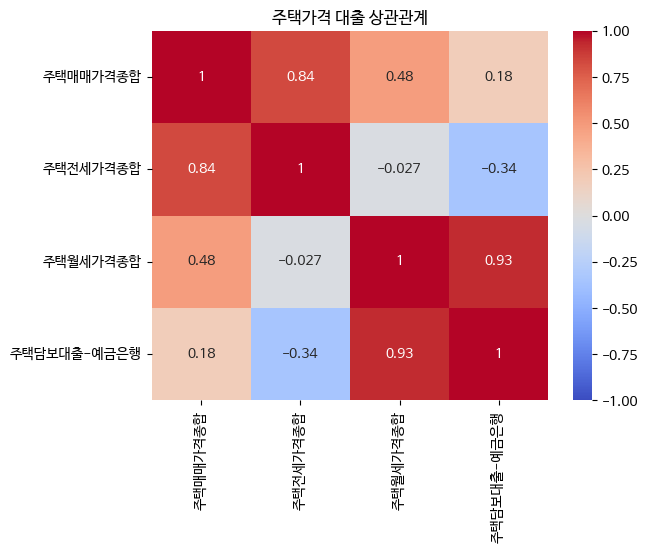

In [ ]:
sns.heatmap(loan_house_num[['주택매매가격종합','주택전세가격종합', '주택월세가격종합','주택담보대출-예금은행']].corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("주택가격 대출 상관관계")

In [ ]:
numeric_loan.corr()

기타대출-비은행예금취급기관  기타대출-예금은행  주택담보대출-비은행예금취급기관  주택담보대출-예금은행  \
기타대출-비은행예금취급기관          1.000000   0.908327          0.048463    -0.430381   
기타대출-예금은행               0.908327   1.000000         -0.020199    -0.247989   
주택담보대출-비은행예금취급기관        0.048463  -0.020199          1.000000     0.710453   
주택담보대출-예금은행            -0.430381  -0.247989          0.710453     1.000000   
기타대출-예금취급기관             0.974819   0.978726          0.013004    -0.343335   
주택담보대출-예금취급기관          -0.395179  -0.232352          0.756637     0.997688   
예금취급기관                  0.151588   0.320300          0.781053     0.824409   

                  기타대출-예금취급기관  주택담보대출-예금취급기관    예금취급기관  
기타대출-비은행예금취급기관       0.974819      -0.395179  0.151588  
기타대출-예금은행            0.978726      -0.232352  0.320300  
주택담보대출-비은행예금취급기관     0.013004       0.756637  0.781053  
주택담보대출-예금은행         -0.343335       0.997688  0.824409  
기타대출-예금취급기관          1.000000      -0.317730  0.245130  
주택담보대출-예금취급기관       -0.317730       1.000000  0.841367  
예금취급기관               0.245130       0.841367  1.000000

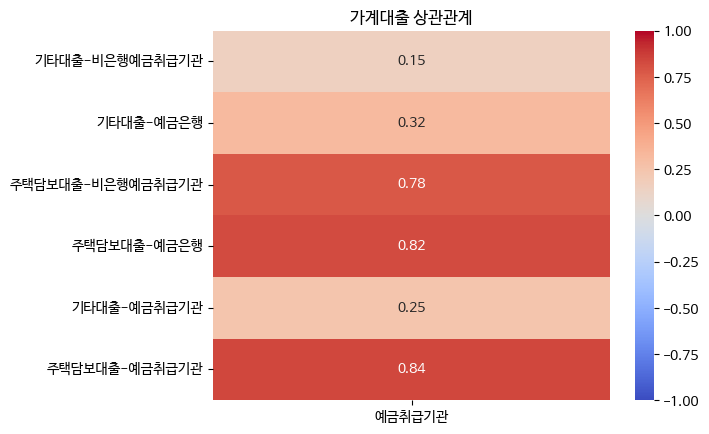

In [ ]:
loan_corr=numeric_loan.corr()
loan_total_corr = loan_corr[['예금취급기관']].drop('예금취급기관')
sns.heatmap(loan_total_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('가계대출 상관관계')
plt.show()

부동산 실거래

In [ ]:
trade_df = pd.read_csv("/content/서울시 부동산 실거래가 정보.csv",encoding='cp949')
trade_df

<ipython-input-4-622bd9c45373>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trade_df = pd.read_csv("/content/서울시 부동산 실거래가 정보.csv",encoding='cp949')


접수연도  자치구코드  자치구명  법정동코드   법정동명  지번구분 지번구분명      본번    부번  \
0       2020  11230  동대문구  11000    이문동   NaN   NaN     NaN   NaN   
1       2020  11680   강남구  10300    개포동   1.0    대지    1280   0.0   
2       2020  11260   중랑구  10300    중화동   NaN   NaN     NaN   NaN   
3       2020  11710   송파구  10400    송파동   1.0    대지      97  44.0   
4       2020  11560  영등포구  11500  당산동5가   1.0    대지      42   0.0   
...      ...    ...   ...    ...    ...   ...   ...     ...   ...   
183895  2020  11140    중구  16200    신당동   1.0    대지   849.0   0.0   
183896  2020  11680   강남구  10600    대치동   1.0    대지   633.0   0.0   
183897  2020  11650   서초구  10100    방배동   1.0    대지  3275.0   0.0   
183898  2020  11470   양천구  10100    신정동   1.0    대지  1290.0   4.0   
183899  2020  11410  서대문구  11600    창천동   1.0    대지    29.0  81.0   

                건물명  ...  토지면적(㎡)     층  권리구분  취소일    건축년도   건물용도  신고구분  \
0               NaN  ...   132.00   NaN   NaN  NaN  1967.0  단독다가구   NaN   
1          래미안블레스티지  ...     0.00   1.0   NaN  NaN  2019.0    아파트   NaN   
2               NaN  ...   195.00   NaN   NaN  NaN  1977.0  단독다가구   NaN   
3       삼구주택(97-44)  ...    29.89   3.0   NaN  NaN  2011.0  연립다세대   NaN   
4         당산삼성래미안4차  ...     0.00  12.0   NaN  NaN  2003.0    아파트   NaN   
...             ...  ...      ...   ...   ...  ...     ...    ...   ...   
183895        삼성홈타운  ...     0.00   3.0   NaN  NaN  2004.0    아파트   NaN   
183896      래미안대치청실  ...     0.00  32.0   입주권  NaN     0.0    아파트   NaN   
183897       동부센트레빌  ...      NaN  18.0   NaN  NaN  2004.0    아파트   NaN   
183898  신정동대우미래사랑5차  ...   122.65   9.0   NaN  NaN  2004.0   오피스텔   NaN   
183899  신촌 르메이에르타운5  ...    38.44  15.0   NaN  NaN  2005.0   오피스텔   NaN   

        신고한 개업공인중개사 시군구명 지하철역  학교 수  
0                    NaN    6    21  
1                    NaN   21    34  
2                    NaN    8    24  
3                    NaN   28    41  
4                    NaN   11    23  
...                  ...  ...   ...  
183895               NaN   23    11  
183896               NaN   21    34  
183897               NaN   12    24  
183898               NaN    5    30  
183899               NaN    5    18  

[183900 rows x 23 columns]

In [ ]:
trade_2021_df = pd.read_csv("/content/서울시 부동산 실거래가 정보 (1).csv", encoding='cp949')
trade_2021_df

<ipython-input-5-126690a08080>:1: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  trade_2021_df = pd.read_csv("/content/서울시 부동산 실거래가 정보 (1).csv", encoding='cp949')


접수연도  자치구코드  자치구명  법정동코드    법정동명  지번구분 지번구분명      본번     부번       건물명  \
0       2021  11440   마포구  11500     상수동   1.0    대지   157.0    1.0   세방글로벌시티   
1       2021  11230  동대문구  10500    답십리동   NaN   NaN     NaN    NaN       NaN   
2       2021  11560  영등포구  10300  영등포동2가   1.0    대지    94.0  154.0  여의도 디앤써밋   
3       2021  11590   동작구  10800     대방동   1.0    대지   500.0    0.0        성원   
4       2021  11260   중랑구  10100     면목동   1.0    대지  1538.0    0.0     주함해븐빌   
...      ...    ...   ...    ...     ...   ...   ...     ...    ...       ...   
138694  2021  11140    중구  16500     황학동   NaN   NaN     NaN    NaN       NaN   
138695  2021  11140    중구  16500     황학동   NaN   NaN     NaN    NaN       NaN   
138696  2021  11140    중구  16500     황학동   NaN   NaN     NaN    NaN       NaN   
138697  2021  11110   종로구  18500     홍지동   1.0    대지    69.0   48.0  경진주택(가동)   
138698  2021  11170   용산구  12900     이촌동   1.0    대지   301.0   18.0  (301-18)   

        ...  토지면적(㎡)     층  권리구분         취소일    건축년도   건물용도  신고구분  \
0       ...    39.91  14.0   NaN  20220329.0  2005.0   오피스텔  중개거래   
1       ...    70.70   NaN   NaN         NaN  2014.0  단독다가구  중개거래   
2       ...    31.40  13.0   NaN         NaN  2019.0   오피스텔  중개거래   
3       ...     0.00   4.0   NaN         NaN  1994.0    아파트  중개거래   
4       ...    21.24   3.0   NaN         NaN  2017.0  연립다세대  중개거래   
...     ...      ...   ...   ...         ...     ...    ...   ...   
138694  ...    96.50   NaN   NaN         NaN  2014.0  단독다가구   NaN   
138695  ...   133.10   NaN   NaN         NaN  1967.0  단독다가구   NaN   
138696  ...   102.00   NaN   NaN         NaN  1967.0  단독다가구   NaN   
138697  ...   142.67   3.0   NaN         NaN  1990.0  연립다세대   NaN   
138698  ...    48.00   4.0   NaN         NaN  1973.0  연립다세대   NaN   

        신고한 개업공인중개사 시군구명 지하철역 학교 수  
0                 서울 마포구   16   22  
1                서울 동대문구    6   21  
2                서울 영등포구   11   23  
3                서울 영등포구   12   21  
4                 서울 중랑구    8   24  
...                  ...  ...  ...  
138694               NaN   23   11  
138695               NaN   23   11  
138696               NaN   23   11  
138697               NaN   15   13  
138698               NaN   10   14  

[138699 rows x 23 columns]

In [ ]:
trade_2022_df = pd.read_csv("/content/서울시 부동산 실거래가 정보 (2).csv",encoding='cp949')
trade_2022_df

접수연도  자치구코드 자치구명  법정동코드 법정동명  지번구분 지번구분명      본번     부번            건물명  \
0      2022  11260  중랑구  10100  면목동   1.0    대지   173.0  164.0           은하빌라   
1      2022  11215  광진구  10500  자양동   1.0    대지   860.0    0.0      테라팰리스건대2차   
2      2022  11680  강남구  10300  개포동   1.0    대지  1165.0   16.0         칠성빌라나동   
3      2022  11200  성동구  12200  용답동   1.0    대지   238.0   12.0     서희스타힐스리버파크   
4      2022  11740  강동구  10900  천호동   1.0    대지   167.0  153.0         다성 이즈빌   
...     ...    ...  ...    ...  ...   ...   ...     ...    ...            ...   
66339  2022  11110  종로구  18600  신영동   NaN   NaN     NaN    NaN            NaN   
66340  2022  11290  성북구  13300  정릉동   1.0    대지   260.0   10.0  진안빌라A(260-10)   
66341  2022  11290  성북구  13300  정릉동   NaN   NaN     NaN    NaN            NaN   
66342  2022  11290  성북구  13300  정릉동   1.0    대지   260.0   10.0  진안빌라A(260-10)   
66343  2022  11650  서초구  10300  우면동   1.0    대지    70.0    0.0            코오롱   

       ...  토지면적(㎡)     층  권리구분  취소일    건축년도   건물용도  신고구분  신고한 개업공인중개사 시군구명  \
0      ...    28.50   3.0   NaN  NaN  1996.0  연립다세대  중개거래            서울 마포구   
1      ...     0.00  17.0   NaN  NaN  2018.0    아파트  중개거래            서울 강남구   
2      ...    41.77   1.0   NaN  NaN  1989.0  연립다세대  중개거래            서울 강남구   
3      ...    27.28   4.0   NaN  NaN  2016.0   오피스텔  중개거래            서울 광진구   
4      ...    38.62   2.0   NaN  NaN  2017.0   오피스텔  중개거래            서울 강동구   
...    ...      ...   ...   ...  ...     ...    ...   ...               ...   
66339  ...   222.00   NaN   NaN  NaN  2005.0  단독다가구   NaN               NaN   
66340  ...    42.40   2.0   NaN  NaN  1991.0  연립다세대   NaN               NaN   
66341  ...   182.00   NaN   NaN  NaN  1968.0  단독다가구   NaN               NaN   
66342  ...    42.40   2.0   NaN  NaN  1991.0  연립다세대   NaN               NaN   
66343  ...     0.00   6.0   NaN  NaN  1994.0    아파트   NaN               NaN   

      지하철역 학교 수  
0        8   24  
1       11   22  
2       21   34  
3       14   21  
4       15   29  
...    ...  ...  
66339   15   13  
66340    9   29  
66341    9   29  
66342    9   29  
66343   12   24  

[66344 rows x 23 columns]

In [ ]:
trade_2023_df = pd.read_csv("/content/서울시 부동산 실거래가 정보 (3).csv",encoding='cp949')
trade_2023_df

접수연도  자치구코드 자치구명  법정동코드 법정동명  지번구분 지번구분명     본번    부번             건물명  \
0      2023  11380  은평구  10200  녹번동   1.0    대지  152.0  59.0  이지플아트빌(152-59)   
1      2023  11590  동작구  10700  사당동   NaN   NaN    NaN   NaN             NaN   
2      2023  11590  동작구  10700  사당동   NaN   NaN    NaN   NaN             NaN   
3      2023  11710  송파구  10400  송파동   1.0    대지   95.0   7.0    HANYANGLEEPS   
4      2023  11530  구로구  10200  구로동   1.0    대지  546.0  17.0       오크트리빌구로1차   
...     ...    ...  ...    ...  ...   ...   ...    ...   ...             ...   
69793  2023  11500  강서구  10800  공항동   1.0    대지   61.0  89.0           남성아트빌   
69794  2023  11380  은평구  10900  신사동   1.0    대지  370.0   0.0        은평신사두산위브   
69795  2023  11440  마포구  12500  성산동   1.0    대지  593.0   5.0        상암미르웰한올림   
69796  2023  11470  양천구  10300  신월동   NaN   NaN    NaN   NaN             NaN   
69797  2023  11350  노원구  10600  중계동   1.0    대지  511.0   2.0         목화(4단지)   

       ...  토지면적(㎡)     층  권리구분         취소일    건축년도   건물용도  신고구분  \
0      ...    37.00   2.0   NaN         NaN  2005.0  연립다세대  중개거래   
1      ...   202.70   NaN   NaN         NaN  1970.0  단독다가구  중개거래   
2      ...    98.60   NaN   NaN         NaN  1987.0  단독다가구  중개거래   
3      ...    10.61   5.0   NaN         NaN  2012.0  연립다세대  중개거래   
4      ...    18.52   4.0   NaN         NaN  2023.0  연립다세대   직거래   
...    ...      ...   ...   ...         ...     ...    ...   ...   
69793  ...    19.00   6.0   NaN         NaN  2015.0  연립다세대   NaN   
69794  ...     0.00   9.0   NaN  20230803.0  2006.0    아파트   NaN   
69795  ...    22.99  13.0   NaN         NaN  2018.0   오피스텔   NaN   
69796  ...    86.00   NaN   NaN         NaN  1981.0  단독다가구   NaN   
69797  ...     0.00   2.0   NaN         NaN  1991.0    아파트   NaN   

       신고한 개업공인중개사 시군구명 지하철역 학교 수  
0                서울 은평구   13   32  
1                서울 강남구   12   21  
2                서울 강남구   12   21  
3                서울 송파구   28   41  
4                   NaN    7   26  
...                 ...  ...  ...  
69793               NaN    9   35  
69794               NaN   13   32  
69795               NaN   16   22  
69796               NaN    5   30  
69797               NaN   13   42  

[69798 rows x 23 columns]

In [ ]:
trade_2024_df = pd.read_csv("/content/서울시 부동산 실거래가 정보 (4).csv",encoding='cp949')
trade_2024_df

<ipython-input-8-806046517673>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  trade_2024_df = pd.read_csv("/content/서울시 부동산 실거래가 정보 (4).csv",encoding='cp949')


접수연도  자치구코드  자치구명  법정동코드  법정동명  지번구분 지번구분명     본번    부번           건물명  \
0      2024  11230  동대문구  10400   전농동   1.0    대지  103.0  50.0      (103-50)   
1      2024  11200   성동구  12200   용답동   1.0    대지  232.0   1.0       신창비바패밀리   
2      2024  11500   강서구  10300   화곡동   1.0    대지   61.0  53.0         리더스타운   
3      2024  11260   중랑구  10100   면목동   NaN   NaN    NaN   NaN           NaN   
4      2024  11710   송파구  10800   문정동   1.0    대지  624.0   0.0       송파 아이파크   
...     ...    ...   ...    ...   ...   ...   ...    ...   ...           ...   
96780  2024  11530   구로구  10700   개봉동   1.0    대지    170    33  금석연립(170-33)   
96781  2024  11530   구로구  10700   개봉동   1.0    대지    170    33  금석연립(170-33)   
96782  2024  11530   구로구  10700   개봉동   1.0    대지    170    33  금석연립(170-33)   
96783  2024  11440   마포구  11000  노고산동   NaN   NaN    NaN   NaN           NaN   
96784  2024  11305   강북구  10100   미아동   NaN   NaN    NaN   NaN           NaN   

       ...  토지면적(㎡)     층  권리구분         취소일    건축년도   건물용도  신고구분  \
0      ...   20.000  -1.0   NaN         NaN  1991.0  연립다세대  중개거래   
1      ...   58.930   3.0   NaN         NaN  2006.0   오피스텔  중개거래   
2      ...   19.000   5.0   NaN         NaN  2016.0  연립다세대  중개거래   
3      ...   92.000   NaN   NaN         NaN  1978.0  단독다가구  중개거래   
4      ...   42.745  13.0   NaN         NaN  2015.0   오피스텔  중개거래   
...    ...      ...   ...   ...         ...     ...    ...   ...   
96780  ...  124.000   1.0   NaN  20240207.0  1981.0  연립다세대  중개거래   
96781  ...  124.000   1.0   NaN  20240207.0  1981.0  연립다세대  중개거래   
96782  ...  124.000   2.0   NaN  20240207.0  1981.0  연립다세대  중개거래   
96783  ...  116.700   NaN   NaN  20240417.0  1988.0  단독다가구   NaN   
96784  ...  136.000   NaN   NaN  20240905.0  1994.0  단독다가구   NaN   

       신고한 개업공인중개사 시군구명  지하철역  학교 수  
0               서울 동대문구   6.0  21.0  
1                서울 성동구  14.0  21.0  
2                서울 강서구   9.0  35.0  
3                서울 중랑구   8.0  24.0  
4                서울 송파구  28.0  41.0  
...                 ...   ...   ...  
96780            서울 강남구   7.0  26.0  
96781            서울 강남구   7.0  26.0  
96782            서울 강남구   7.0  26.0  
96783               NaN  16.0  22.0  
96784               NaN   3.0  14.0  

[96785 rows x 23 columns]

In [ ]:
total_trade_df = pd.concat([trade_df,trade_2021_df,trade_2022_df,trade_2023_df,trade_2024_df],axis=0)
total_trade_df

접수연도  자치구코드  자치구명  법정동코드   법정동명  지번구분 지번구분명    본번    부번           건물명  \
0      2020  11230  동대문구  11000    이문동   NaN   NaN   NaN   NaN           NaN   
1      2020  11680   강남구  10300    개포동   1.0    대지  1280   0.0      래미안블레스티지   
2      2020  11260   중랑구  10300    중화동   NaN   NaN   NaN   NaN           NaN   
3      2020  11710   송파구  10400    송파동   1.0    대지    97  44.0   삼구주택(97-44)   
4      2020  11560  영등포구  11500  당산동5가   1.0    대지    42   0.0     당산삼성래미안4차   
...     ...    ...   ...    ...    ...   ...   ...   ...   ...           ...   
96780  2024  11530   구로구  10700    개봉동   1.0    대지   170    33  금석연립(170-33)   
96781  2024  11530   구로구  10700    개봉동   1.0    대지   170    33  금석연립(170-33)   
96782  2024  11530   구로구  10700    개봉동   1.0    대지   170    33  금석연립(170-33)   
96783  2024  11440   마포구  11000   노고산동   NaN   NaN   NaN   NaN           NaN   
96784  2024  11305   강북구  10100    미아동   NaN   NaN   NaN   NaN           NaN   

       ...  토지면적(㎡)     층  권리구분         취소일    건축년도   건물용도  신고구분  \
0      ...   132.00   NaN   NaN         NaN  1967.0  단독다가구   NaN   
1      ...     0.00   1.0   NaN         NaN  2019.0    아파트   NaN   
2      ...   195.00   NaN   NaN         NaN  1977.0  단독다가구   NaN   
3      ...    29.89   3.0   NaN         NaN  2011.0  연립다세대   NaN   
4      ...     0.00  12.0   NaN         NaN  2003.0    아파트   NaN   
...    ...      ...   ...   ...         ...     ...    ...   ...   
96780  ...   124.00   1.0   NaN  20240207.0  1981.0  연립다세대  중개거래   
96781  ...   124.00   1.0   NaN  20240207.0  1981.0  연립다세대  중개거래   
96782  ...   124.00   2.0   NaN  20240207.0  1981.0  연립다세대  중개거래   
96783  ...   116.70   NaN   NaN  20240417.0  1988.0  단독다가구   NaN   
96784  ...   136.00   NaN   NaN  20240905.0  1994.0  단독다가구   NaN   

       신고한 개업공인중개사 시군구명  지하철역  학교 수  
0                   NaN   6.0  21.0  
1                   NaN  21.0  34.0  
2                   NaN   8.0  24.0  
3                   NaN  28.0  41.0  
4                   NaN  11.0  23.0  
...                 ...   ...   ...  
96780            서울 강남구   7.0  26.0  
96781            서울 강남구   7.0  26.0  
96782            서울 강남구   7.0  26.0  
96783               NaN  16.0  22.0  
96784               NaN   3.0  14.0  

[555526 rows x 23 columns]

In [ ]:
total_trade_df.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명', '지하철역', '학교 수'],
      dtype='object')

In [ ]:
total_trade_df.isna().sum()

접수연도                     0
자치구코드                    0
자치구명                     1
법정동코드                    0
법정동명                     0
지번구분                 34379
지번구분명                34379
본번                   34367
부번                   34367
건물명                  34382
계약일                      0
물건금액(만원)                 0
건물면적(㎡)                  0
토지면적(㎡)              80601
층                    34328
권리구분                552420
취소일                 528207
건축년도                  3098
건물용도                     0
신고구분                310883
신고한 개업공인중개사 시군구명    355339
지하철역                     1
학교 수                     1
dtype: int64

In [ ]:
total_trade=total_trade_df[['접수연도','자치구명','법정동명','건물명','계약일','물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층','건축년도','건물용도','지하철역', '학교 수']]
total_trade

접수연도  자치구명   법정동명           건물명       계약일  물건금액(만원)  건물면적(㎡)  토지면적(㎡)  \
0      2020  동대문구    이문동           NaN  20210510     85000    75.57   132.00   
1      2020   강남구    개포동      래미안블레스티지  20210215    251000    84.94     0.00   
2      2020   중랑구    중화동           NaN  20210201     85000    99.18   195.00   
3      2020   송파구    송파동   삼구주택(97-44)  20210125     38000    55.20    29.89   
4      2020  영등포구  당산동5가     당산삼성래미안4차  20210112    180000   133.42     0.00   
...     ...   ...    ...           ...       ...       ...      ...      ...   
96780  2024   구로구    개봉동  금석연립(170-33)  20220708      9190    53.61   124.00   
96781  2024   구로구    개봉동  금석연립(170-33)  20220708      9190    53.61   124.00   
96782  2024   구로구    개봉동  금석연립(170-33)  20220708      9740    53.61   124.00   
96783  2024   마포구   노고산동           NaN  20210719    195000   157.45   116.70   
96784  2024   강북구    미아동           NaN  20210208    164000   293.08   136.00   

          층    건축년도   건물용도  지하철역  학교 수  
0       NaN  1967.0  단독다가구   6.0  21.0  
1       1.0  2019.0    아파트  21.0  34.0  
2       NaN  1977.0  단독다가구   8.0  24.0  
3       3.0  2011.0  연립다세대  28.0  41.0  
4      12.0  2003.0    아파트  11.0  23.0  
...     ...     ...    ...   ...   ...  
96780   1.0  1981.0  연립다세대   7.0  26.0  
96781   1.0  1981.0  연립다세대   7.0  26.0  
96782   2.0  1981.0  연립다세대   7.0  26.0  
96783   NaN  1988.0  단독다가구  16.0  22.0  
96784   NaN  1994.0  단독다가구   3.0  14.0  

[555526 rows x 13 columns]

In [ ]:
total_trade.shape

(555526, 13)

In [ ]:
total_trade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555526 entries, 0 to 96784
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   접수연도      555526 non-null  int64  
 1   자치구명      555525 non-null  object 
 2   법정동명      555526 non-null  object 
 3   건물명       521144 non-null  object 
 4   계약일       555526 non-null  int64  
 5   물건금액(만원)  555526 non-null  int64  
 6   건물면적(㎡)   555526 non-null  float64
 7   토지면적(㎡)   474925 non-null  float64
 8   층         521198 non-null  float64
 9   건축년도      552428 non-null  float64
 10  건물용도      555526 non-null  object 
 11  지하철역      555525 non-null  float64
 12  학교 수      555525 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 75.5+ MB


In [ ]:
total_trade.to_excel('2020~2024년 부동산 실거래.xlsx',sheet_name='Sheet1')

<Axes: >

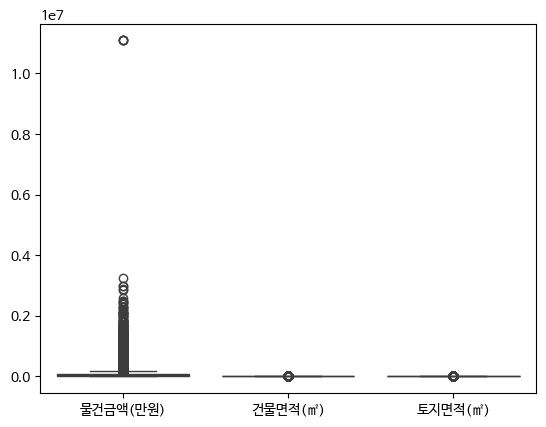

In [ ]:
total_trade[['물건금액(만원)','건물면적(㎡)','토지면적(㎡)']].describe()
sns.boxplot(data=total_trade[['물건금액(만원)','건물면적(㎡)','토지면적(㎡)']])

<Axes: >

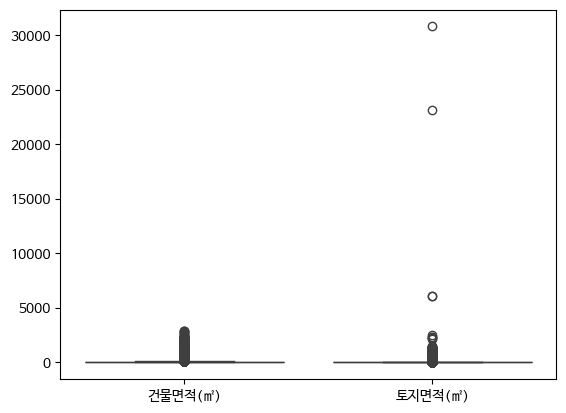

In [ ]:
sns.boxplot(data=total_trade[['건물면적(㎡)','토지면적(㎡)']])

In [ ]:
total_trade.groupby('자치구명').agg({'물건금액(만원)':'mean','건물면적(㎡)':'mean'}).sort_values(by=['물건금액(만원)','건물면적(㎡)'],ascending=False).reset_index()

자치구명       물건금액(만원)    건물면적(㎡)
0    강남구  156863.436071  81.075704
1    서초구  141539.089267  79.166204
2    용산구  129376.939072  82.457391
3    성동구  113110.260938  78.507047
4    송파구   90713.072957  66.949910
5    동작구   76625.369900  72.846040
6    마포구   76252.603770  63.641778
7     중구   72443.626121  67.204907
8   영등포구   70463.473025  63.770004
9    광진구   69400.347415  73.970920
10   강동구   67990.583194  66.286961
11   종로구   67885.027509  73.857600
12  서대문구   62256.296973  69.165815
13   양천구   60998.277056  64.686535
14   성북구   60993.132387  73.891862
15  동대문구   60303.626107  67.203560
16   노원구   52369.513377  62.756818
17   관악구   48730.756251  69.761225
18   중랑구   46443.645900  70.038579
19   구로구   43035.606857  61.187407
20   은평구   42449.260507  59.642163
21   강서구   42251.377195  54.751260
22   금천구   37870.333766  58.047074
23   도봉구   36880.376867  63.919886
24   강북구   36372.573943  63.494670

<Axes: >

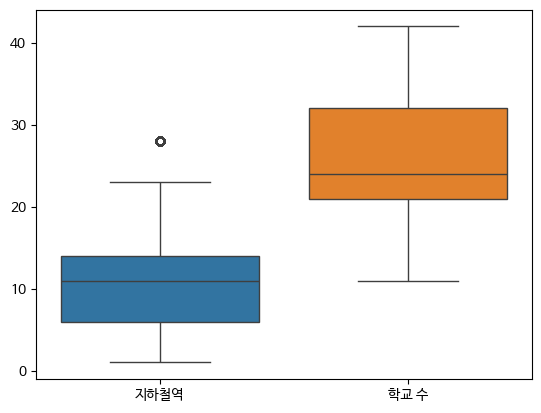

In [ ]:
convience = total_trade[['지하철역','학교 수']]
sns.boxplot(data=convience)

In [ ]:
#편의시설 상관관계
total_trade[['물건금액(만원)','건물면적(㎡)','토지면적(㎡)','층','지하철역','학교 수']].corr()

물건금액(만원)   건물면적(㎡)   토지면적(㎡)         층      지하철역      학교 수
물건금액(만원)  1.000000  0.618235  0.198267  0.355876  0.213716  0.013741
건물면적(㎡)   0.618235  1.000000  0.401220  0.240194  0.028132 -0.030470
토지면적(㎡)   0.198267  0.401220  1.000000 -0.077968 -0.016096 -0.061969
층         0.355876  0.240194 -0.077968  1.000000  0.100411  0.016541
지하철역      0.213716  0.028132 -0.016096  0.100411  1.000000  0.497922
학교 수      0.013741 -0.030470 -0.061969  0.016541  0.497922  1.000000

Text(0.5, 1.0, '편의시설 금액 상관관계')

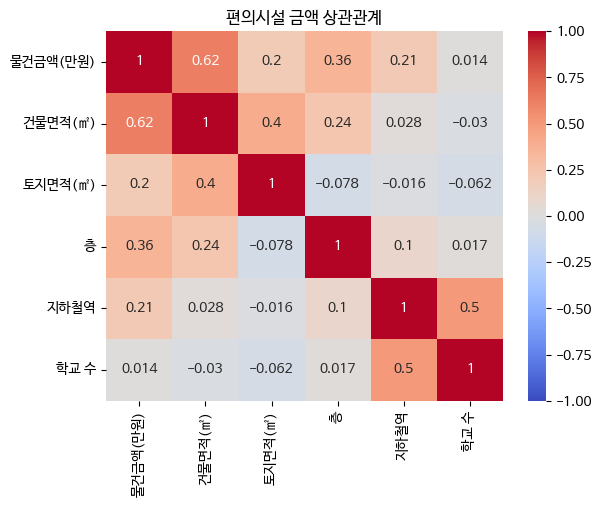

In [ ]:
sns.heatmap(total_trade[['물건금액(만원)','건물면적(㎡)','토지면적(㎡)','층','지하철역','학교 수']].corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("편의시설 금액 상관관계")

<Axes: >

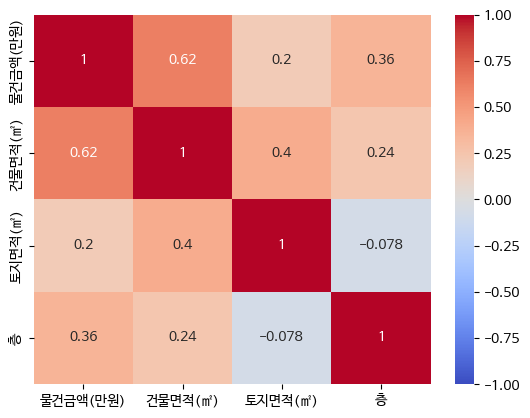

In [ ]:
#주거생활 금액 상관관계
total_trade[['물건금액(만원)','건물면적(㎡)','토지면적(㎡)','층']].corr()

sns.heatmap(total_trade[['물건금액(만원)','건물면적(㎡)','토지면적(㎡)','층']].corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

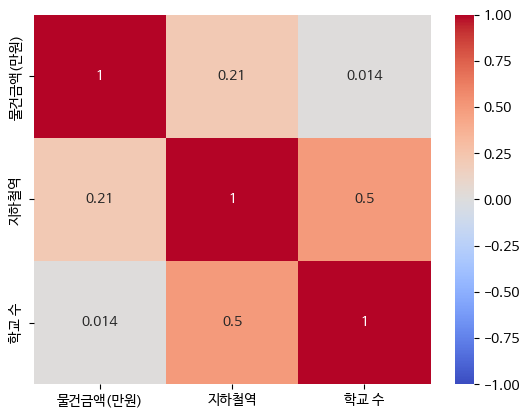

In [ ]:
total_trade[['물건금액(만원)','지하철역','학교 수']].corr()
sns.heatmap(total_trade[['물건금액(만원)','지하철역','학교 수']].corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)

시각화 담보대출 가격 상관관계

In [ ]:
loan_trade = pd.concat([loan_df.reset_index(drop=True),
                         total_trade.reset_index(drop=True)],
                        axis=1)

loan_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555526 entries, 0 to 555525
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   날짜                60 non-null      datetime64[ns]
 1   기타대출-비은행예금취급기관    60 non-null      float64       
 2   기타대출-예금은행         60 non-null      float64       
 3   주택담보대출-비은행예금취급기관  60 non-null      float64       
 4   주택담보대출-예금은행       60 non-null      float64       
 5   기타대출-예금취급기관       60 non-null      float64       
 6   주택담보대출-예금취급기관     60 non-null      float64       
 7   예금취급기관            60 non-null      float64       
 8   접수연도              555526 non-null  int64         
 9   자치구명              555525 non-null  object        
 10  법정동명              555526 non-null  object        
 11  건물명               521144 non-null  object        
 12  계약일               555526 non-null  int64         
 13  물건금액(만원)          555526 non-null  int64         
 14  건물면적

In [ ]:
loan_trade[['주택담보대출-예금은행','물건금액(만원)']].corr()

주택담보대출-예금은행  물건금액(만원)
주택담보대출-예금은행     1.000000 -0.159266
물건금액(만원)       -0.159266  1.000000

###데이터셋

In [ ]:
final_df = pd.read_csv("/content/데이터 최최종본.csv",encoding='euc-kr')
final_df.head()

자치구명      날짜  물건금액(만원)   층  평수  건축년도 건물용도  지하철역  학교 수  건설중장비임대  \
0    서울특별시 노원구 월계동  202112     73600   9  15  1987  아파트    13    42   107.74   
1   서울특별시 중구 충무로5가  202112     45500   6  12  2018  아파트    23    11   107.74   
2   서울특별시 동대문구 용두동  202112     18100  18   4  2019  아파트     6    21   107.74   
3  서울특별시 성동구 하왕십리동  202112     13000   6   4  2013  아파트    14    21   107.74   
4     서울특별시 중랑구 묵동  202112    105000   4  31  1995  아파트     8    24   107.74   

   ...  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0  ...          90.4          93.6            98.3          5,261   
1  ...          90.4          93.6            98.3          5,261   
2  ...          90.4          93.6            98.3          5,261   
3  ...          90.4          93.6            98.3          5,261   
4  ...          90.4          93.6            98.3          5,261   

   미분양주택현황(서울)  기준금리   소비자물가 실질 GDP  주택담보대출(증감-전월대비)  물건금액(억)  
0           54   1.0  104.04    1.6         1589.925     7.36  
1           54   1.0  104.04    1.6         1589.925     4.55  
2           54   1.0  104.04    1.6         1589.925     1.81  
3           54   1.0  104.04    1.6         1589.925     1.30  
4           54   1.0  104.04    1.6         1589.925    10.50  

[5 rows x 24 columns]

In [ ]:
from datetime import datetime

# Apply strptime to each element in the '날짜' column using apply
final_df['날짜'] = final_df['날짜'].apply(lambda x: datetime.strptime(str(x), '%Y%m'))

In [ ]:
final_df.head()

자치구명         날짜  물건금액(만원)   층  평수  건축년도 건물용도  지하철역  학교 수  \
0    서울특별시 노원구 월계동 2021-12-01     73600   9  15  1987  아파트    13    42   
1   서울특별시 중구 충무로5가 2021-12-01     45500   6  12  2018  아파트    23    11   
2   서울특별시 동대문구 용두동 2021-12-01     18100  18   4  2019  아파트     6    21   
3  서울특별시 성동구 하왕십리동 2021-12-01     13000   6   4  2013  아파트    14    21   
4     서울특별시 중랑구 묵동 2021-12-01    105000   4  31  1995  아파트     8    24   

   건설중장비임대  ...  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0   107.74  ...          90.4          93.6            98.3          5,261   
1   107.74  ...          90.4          93.6            98.3          5,261   
2   107.74  ...          90.4          93.6            98.3          5,261   
3   107.74  ...          90.4          93.6            98.3          5,261   
4   107.74  ...          90.4          93.6            98.3          5,261   

   미분양주택현황(서울)  기준금리   소비자물가 실질 GDP  주택담보대출(증감-전월대비)  물건금액(억)  
0           54   1.0  104.04    1.6         1589.925     7.36  
1           54   1.0  104.04    1.6         1589.925     4.55  
2           54   1.0  104.04    1.6         1589.925     1.81  
3           54   1.0  104.04    1.6         1589.925     1.30  
4           54   1.0  104.04    1.6         1589.925    10.50  

[5 rows x 24 columns]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010950 entries, 0 to 1010949
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   자치구명             1010950 non-null  object        
 1   날짜               1010950 non-null  datetime64[ns]
 2   물건금액(만원)         1010950 non-null  int64         
 3   층                1010950 non-null  int64         
 4   평수               1010950 non-null  int64         
 5   건축년도             1010950 non-null  int64         
 6   건물용도             1010950 non-null  object        
 7   지하철역             1010950 non-null  int64         
 8   학교 수             1010950 non-null  int64         
 9   건설중장비임대          1010950 non-null  float64       
 10  건설엔지니어링          1010950 non-null  float64       
 11  건축설계             1010950 non-null  float64       
 12  선행종합지수           1010950 non-null  float64       
 13  동행종합지수           1010950 non-null  float64       
 14  유형

In [ ]:
final_df['건축년도']=final_df[final_df['건축년도']>1980]['건축년도']

In [ ]:
numeric_columns = final_df.select_dtypes(include=['number'])
print(numeric_columns.describe())

           물건금액(만원)             층            평수           건축년도          지하철역  \
count  1.010950e+06  1.010950e+06  1.010950e+06  970888.000000  1.010950e+06   
mean   7.104688e+04  6.252350e+00  2.089609e+01    2004.660516  1.101539e+01   
std    8.549218e+04  5.733915e+00  2.055917e+01      11.157450  6.419780e+00   
min    1.700000e+03 -3.000000e+00  1.000000e+00    1981.000000  1.000000e+00   
25%    2.550000e+04  2.000000e+00  1.200000e+01    1995.000000  6.000000e+00   
50%    4.500000e+04  4.000000e+00  1.800000e+01    2004.000000  1.100000e+01   
75%    8.900000e+04  9.000000e+00  2.600000e+01    2015.000000  1.300000e+01   
max    1.108778e+07  6.800000e+01  1.099000e+03    2024.000000  2.800000e+01   

               학교 수       건설중장비임대       건설엔지니어링          건축설계        선행종합지수  \
count  1.010950e+06  1.010950e+06  1.010950e+06  1.010950e+06  1.010950e+06   
mean   2.663224e+01  1.147824e+02  1.121250e+02  1.172783e+02  1.067196e+02   
std    7.869946e+00  1.505946e+01  1.20149

<Axes: >

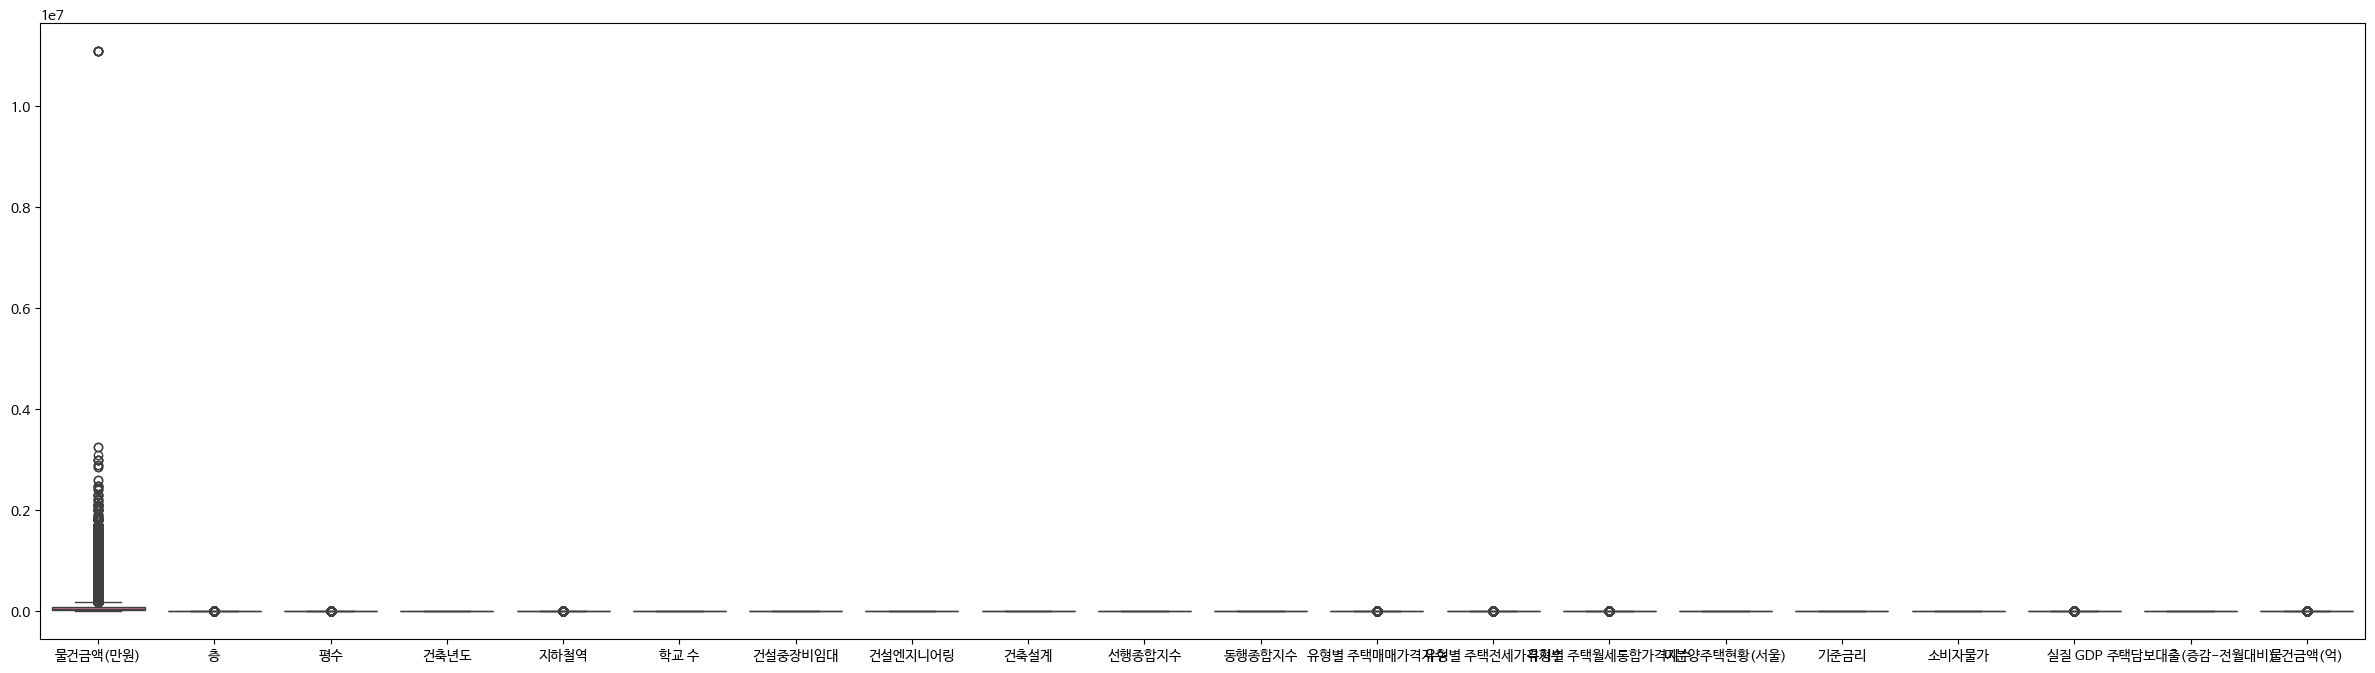

In [ ]:
plt.figure(figsize=(30, 8))
sns.boxplot(data=numeric_columns)

**가설**
*   평수
*   금리
* 편의시설(학교 수 ,지하철역)

In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(final_df['평수'],final_df['물건금액(억)'])
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): 622.7789572253427 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
#검증
from scipy import stats as st

#t 분포 검증
t_stat, p_val = st.ttest_ind(final_df['기준금리'],final_df['물건금액(억)'])
print("검정통계량(t):", t_stat, ", p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): -633.4263883282176 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
#편의시설
from scipy.stats import f_oneway

# 일원분산분석
f_stat, p_value = f_oneway(final_df['지하철역'],final_df['학교 수'],final_df['물건금액(억)'])


print("검정통계량(t):", f_stat, ", p-value:", p_value)

alpha = 0.05
if p_val < alpha:
    print("→ 귀무가설 기각 (개선 효과 유의미)")
else:
    print("→ 귀무가설 채택 (개선 효과 통계적으로 확인 어려움)")

검정통계량(t): 1837048.5710480723 , p-value: 0.0
→ 귀무가설 기각 (개선 효과 유의미)


In [ ]:
final_house_loan= final_df[['날짜','주택담보대출(증감-전월대비)']].drop_duplicates().sort_values(by='날짜')
final_house_loan

날짜  주택담보대출(증감-전월대비)
226307 2020-01-01          946.200
217923 2020-02-01         1997.950
213302 2020-03-01         2399.775
210143 2020-04-01         2493.500
204344 2020-05-01         1574.225
187962 2020-06-01         1849.375
176813 2020-07-01         1526.775
171656 2020-08-01         2699.350
167733 2020-09-01         3079.850
163162 2020-10-01         3243.475
156659 2020-11-01         3144.150
148932 2020-12-01         3143.750
142984 2021-01-01         2380.825
139000 2021-02-01         3567.350
135126 2021-03-01         3022.125
131372 2021-04-01         1739.275
126336 2021-05-01         1619.000
122287 2021-06-01         2357.250
117498 2021-07-01         3467.050
113303 2021-08-01         3336.150
110510 2021-09-01         3161.475
108218 2021-10-01         2697.400
106777 2021-11-01         2170.900
105606 2021-12-01         1589.925
104468 2022-01-01         1197.625
103613 2022-02-01          836.050
102058 2022-03-01          893.200
100226 2022-04-01         1447.350
98393  2022-05-01          372.300
97247  2022-06-01         1470.500
96558  2022-07-01          907.300
95755  2022-08-01         1019.950
95100  2022-09-01          847.675
94525  2022-10-01          976.450
93759  2022-11-01          624.750
92850  2022-12-01         1223.550
91352  2023-01-01         -155.475
88798  2023-02-01           -4.500
85691  2023-03-01           56.625
82357  2023-04-01          459.300
78779  2023-05-01         1493.725
74746  2023-06-01         2552.125
70992  2023-07-01         2185.675
66942  2023-08-01         2485.800
63426  2023-09-01         2423.800
61006  2023-10-01         2231.250
59084  2023-11-01         2663.450
57212  2023-12-01         2259.175
54526  2024-01-01         2371.750
51811  2024-02-01         2114.525
47361  2024-03-01          782.525
42714  2024-04-01         2469.550
37414  2024-05-01         2736.150
29478  2024-06-01         2943.250
20254  2024-07-01         2900.275
13723  2024-08-01         4323.075
10545  2024-09-01         3334.500
6684   2024-10-01         2330.300
3246   2024-11-01         2111.650
0      2024-12-01         1934.850

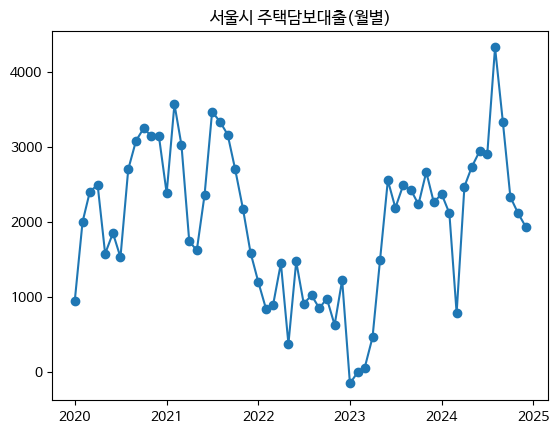

In [ ]:
x = final_house_loan['날짜']
y= final_house_loan['주택담보대출(증감-전월대비)']


plt.title("서울시 주택담보대출(월별)")
plt.plot(x,y,marker='o')

In [ ]:
final_df[['물건금액(만원)','평수']]

물건금액(만원)  평수
0           73600  15
1           45500  12
2           18100   4
3           13000   4
4          105000  31
...           ...  ..
1010945      9190  16
1010946      9190  16
1010947      9740  16
1010948    195000  48
1010949    164000  89

[1010950 rows x 2 columns]

In [ ]:
final_df.drop_duplicates()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541017 entries, 0 to 541016
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   날짜               541017 non-null  datetime64[ns]
 1   자치구              541017 non-null  object        
 2   물건금액(만원)         541017 non-null  object        
 3   건축년도             522522 non-null  float64       
 4   건물용도             541017 non-null  object        
 5   거래유형             541017 non-null  object        
 6   평수               541017 non-null  int64         
 7   층                541017 non-null  float64       
 8   건설중장비임대          541017 non-null  float64       
 9   건설엔지니어링          541017 non-null  float64       
 10  건축설계             541017 non-null  float64       
 11  선행종합지수           541017 non-null  float64       
 12  동행종합지수           541017 non-null  float64       
 13  유형별 주택매매가격지수     541017 non-null  float64       
 14  유형별 주택전세가격지수     541

In [ ]:
final_df.groupby('건물용도').agg({'물건금액(억)':'mean','평수':'mean'})

물건금액(억)         평수
건물용도                       
다가구    15.408215  44.481036
다세대     2.956685  13.081301
단독     15.075282  45.452259
아파트    10.074829  22.779071
연립      5.036084  20.031415
연립다세대   3.152676  13.310811
오피스텔    2.740634   9.931588

In [ ]:
final_df['평수_log'] = np.log(final_df['평수'])

LinearRegression()으로 추정한 모수
회귀계수는 0.26
절편은 1.7

Mean Squared Error is 4.5e+01


Text(0, 0.5, '금액(억)')

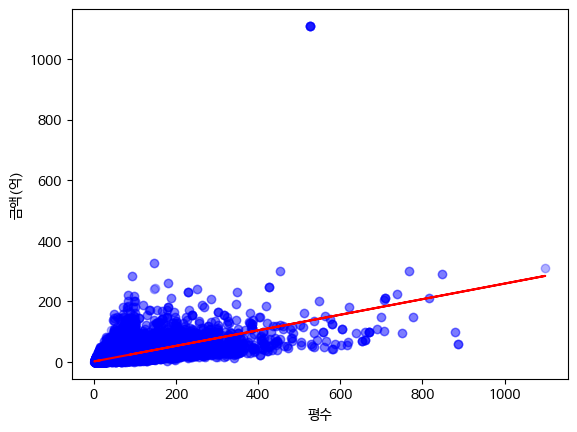

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= final_df[['평수']]
Y= final_df['물건금액(억)']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue',alpha=0.3, label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')
plt.xlabel("평수")
plt.ylabel("금액(억)")

LinearRegression()으로 추정한 모수
회귀계수는 8.5
절편은 -1.7e+01

Mean Squared Error is 4.4e+01


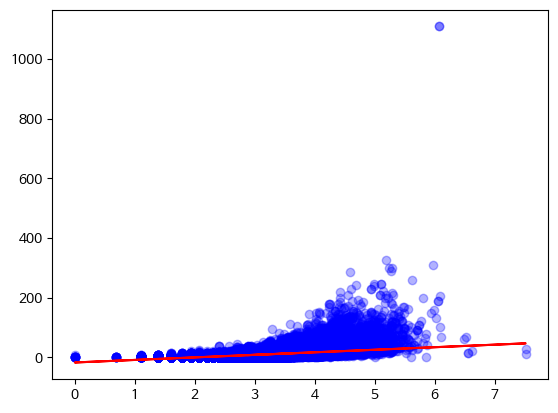

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= final_df[['평수_log']]
Y= final_df['물건금액(억)']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue',alpha=0.3, label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')

LinearRegression()으로 추정한 모수
회귀계수는 0.28
절편은 3.7

Mean Squared Error is 6.5e+01


Text(0, 0.5, '물건금액(억)')

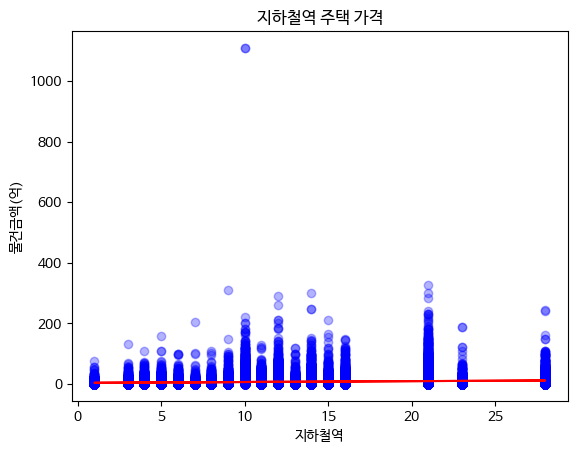

In [ ]:

X= final_df[['지하철역']]
Y= final_df['물건금액(억)']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')



plt.scatter(X, Y, color='blue',alpha=0.3, label='실제 데이터')
plt.plot(X, Y_pred, color='red', label='회귀 직선')
plt.title("지하철역 주택 가격")
plt.xlabel("지하철역")
plt.ylabel("물건금액(억)")


LinearRegression()으로 추정한 모수
회귀계수는 0.35
절편은 4.9

Mean Squared Error is 6.9e+01


Text(0, 0.5, '물건금액(억)')

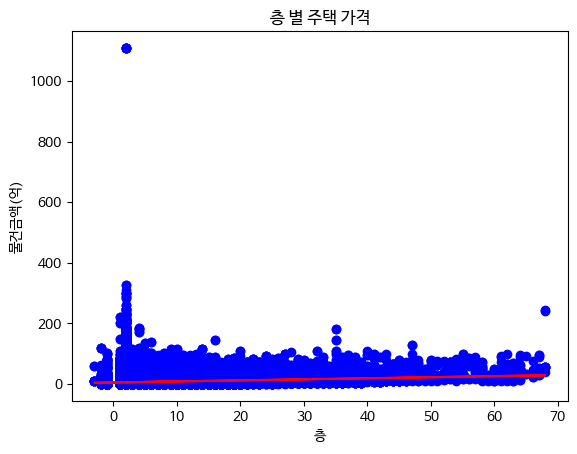

In [ ]:

X= final_df[['층']]
Y= final_df['물건금액(억)']

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X, Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {model.coef_[0]:.2}')
print(f'절편은 {model.intercept_:.2}')

# 예측
Y_pred = model.predict(X)

#모형 성능 평가
Y_pred = model.predict(X)
mse = mean_squared_error(Y,Y_pred)
print(f'\nMean Squared Error is {mse:.2}')
plt.plot(X, Y_pred, color='red', label='회귀 직선')
plt.scatter(X,Y,color='blue')
#color=blue
plt.title("층 별 주택 가격")
plt.xlabel("층")
plt.ylabel("물건금액(억)")

In [ ]:
final_df['건축년도'].describe()

count    1.010950e+06
mean     1.997613e+03
std      1.087843e+02
min      0.000000e+00
25%      1.994000e+03
50%      2.003000e+03
75%      2.015000e+03
max      2.024000e+03
Name: 건축년도, dtype: float64

In [ ]:
final_year=final_df[final_df['건축년도']>1950].sort_values("건축년도",ascending=False)
final_year

자치구명         날짜  물건금액(만원)   층  평수  건축년도   건물용도  지하철역  학교 수  \
295582    서울특별시 금천구 시흥동 2024-08-01     41350   3  14  2024  연립다세대     1    19   
932052               중구 2024-10-01     39100   3  11  2024   오피스텔    23    11   
931271              은평구 2024-10-01     58900  17  15  2024    아파트    13    32   
931301              은평구 2024-10-01     84500  13  20  2024    아파트    13    32   
295795    서울특별시 마포구 신수동 2024-08-01     44000   3   4  2024  연립다세대    16    22   
...                 ...        ...       ...  ..  ..   ...    ...   ...   ...   
229984  서울특별시 서대문구 북아현동 2021-04-01     88500   2  15  1953  단독다가구     5    18   
725919              종로구 2021-04-01    115000   2  21  1952  단독다가구    15    13   
241182   서울특별시 마포구 신공덕동 2020-05-01     67290   2   9  1952  단독다가구    16    22   
229915    서울특별시 종로구 혜화동 2021-04-01    115000   2  21  1952  단독다가구    15    13   
584073              마포구 2020-05-01     67290   2   9  1952  단독다가구    16    22   

        건설중장비임대  ...  미분양주택현황(서울)  기준금리   소비자물가  실질 GDP  주택담보대출(증감-전월대비)  \
295582   136.53  ...          946  3.50  114.54     0.1         4323.075   
932052   136.53  ...          917  3.25  114.69     0.1         2330.300   
931271   136.53  ...          917  3.25  114.69     0.1         2330.300   
931301   136.53  ...          917  3.25  114.69     0.1         2330.300   
295795   136.53  ...          946  3.50  114.54     0.1         4323.075   
...         ...  ...          ...   ...     ...     ...              ...   
229984   107.74  ...           76  0.50  101.98     1.3         1739.275   
725919   107.74  ...           76  0.50  101.98     1.3         1739.275   
241182   100.00  ...           70  0.50   99.44    -2.7         1574.225   
229915   107.74  ...           76  0.50  101.98     1.3         1739.275   
584073   100.00  ...           70  0.50   99.44    -2.7         1574.225   

        물건금액(억)    평수_log      시     구     동  
295582    4.135  2.639057  서울특별시   금천구   시흥동  
932052    3.910  2.397895     중구    중구  None  
931271    5.890  2.708050    은평구   은평구  None  
931301    8.450  2.995732    은평구   은평구  None  
295795    4.400  1.386294  서울특별시   마포구   신수동  
...         ...       ...    ...   ...   ...  
229984    8.850  2.708050  서울특별시  서대문구  북아현동  
725919   11.500  3.044522    종로구   종로구  None  
241182    6.729  2.197225  서울특별시   마포구  신공덕동  
229915   11.500  3.044522  서울특별시   종로구   혜화동  
584073    6.729  2.197225    마포구   마포구  None  

[1006769 rows x 28 columns]

LinearRegression()으로 추정한 모수
회귀계수는 -0.1
절편은 2.1e+02

Mean Squared Error is 7.1e+01


Text(0, 0.5, '물건금액(억)')

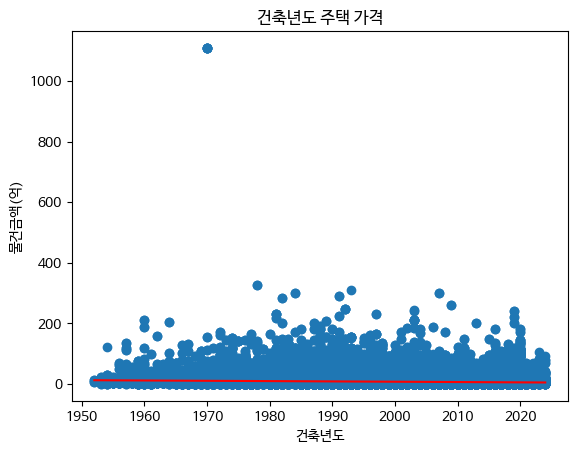

In [ ]:
year_X= final_year[['건축년도']]
year_Y= final_year['물건금액(억)']

# 모델 생성
year_model = LinearRegression()

# 모델 학습
year_model.fit(year_X, year_Y)

# 회귀계수와 절편 출력
print('LinearRegression()으로 추정한 모수')
print(f'회귀계수는 {year_model.coef_[0]:.2}')
print(f'절편은 {year_model.intercept_:.2}')

# 예측
year_Y_pred = year_model.predict(year_X)

#모형 성능 평가
year_Y_pred = year_model.predict(year_X)
mse = mean_squared_error(year_Y,year_Y_pred)
print(f'\nMean Squared Error is {mse:.2}')
plt.plot(year_X, year_Y_pred, color='red', label='회귀 직선')
plt.scatter(year_X,year_Y)
plt.title("건축년도 주택 가격")
plt.xlabel("건축년도")
plt.ylabel("물건금액(억)")

In [ ]:
final_prize_df= final_df[['날짜','물건금액(만원)','평수']]

prize_group=final_prize_df.groupby('날짜').agg({'물건금액(만원)':'mean','평수':'mean'}).round(2).reset_index()
prize_group

날짜   물건금액(만원)     평수
0  2020-01-01   54248.13  21.39
1  2020-02-01   56820.86  22.07
2  2020-03-01   52262.57  21.71
3  2020-04-01   50517.34  20.67
4  2020-05-01   59341.09  21.80
5  2020-06-01   72402.26  22.97
6  2020-07-01   65552.63  22.20
7  2020-08-01   68518.73  22.72
8  2020-09-01   64898.55  22.30
9  2020-10-01   61688.08  21.08
10 2020-11-01   72662.47  22.05
11 2020-12-01   74263.36  21.44
12 2021-01-01   66807.47  20.77
13 2021-02-01   66466.22  21.44
14 2021-03-01   63310.72  21.75
15 2021-04-01   63501.35  20.66
16 2021-05-01   64293.01  20.14
17 2021-06-01   63452.63  20.53
18 2021-07-01   71101.99  20.82
19 2021-08-01   71063.25  20.79
20 2021-09-01   67928.90  20.06
21 2021-10-01   64831.35  20.18
22 2021-11-01   60608.66  19.42
23 2021-12-01   57297.48  18.41
24 2022-01-01   58220.93  17.66
25 2022-02-01   60240.45  19.00
26 2022-03-01   62594.12  19.58
27 2022-04-01   65022.21  19.95
28 2022-05-01   63307.46  19.80
29 2022-06-01   61569.41  18.56
30 2022-07-01   57262.23  18.82
31 2022-08-01   55856.18  18.12
32 2022-09-01   58566.47  18.53
33 2022-10-01   52461.80  17.38
34 2022-11-01   55414.69  17.73
35 2022-12-01   56350.02  16.67
36 2023-01-01   69507.64  18.74
37 2023-02-01   73997.91  19.50
38 2023-03-01   73643.16  19.85
39 2023-04-01   85262.46  21.26
40 2023-05-01   80274.79  20.53
41 2023-06-01   86071.96  20.51
42 2023-07-01   85923.44  20.87
43 2023-08-01   86642.68  20.68
44 2023-09-01   85060.80  21.45
45 2023-10-01   74623.66  20.26
46 2023-11-01   71757.62  20.28
47 2023-12-01   68923.68  19.09
48 2024-01-01   76390.54  19.94
49 2024-02-01   79084.73  20.51
50 2024-03-01   83047.65  20.56
51 2024-04-01   87308.26  20.93
52 2024-05-01   92132.47  21.38
53 2024-06-01  102416.66  21.68
54 2024-07-01  104072.26  22.08
55 2024-08-01   97462.05  21.59
56 2024-09-01   90205.02  21.21
57 2024-10-01   87715.13  21.00
58 2024-11-01   88606.34  20.21
59 2024-12-01   84549.32  19.43

In [ ]:
#날짜별 건물용도 수
date_trade_count=final_df.groupby('날짜')['건물용도'].value_counts().reset_index()
date_trade_count.rename(columns={'count':'거래 수'},inplace=True)
date_trade_count

날짜   건물용도   거래 수
0   2020-01-01    아파트  13087
1   2020-01-01  연립다세대   7888
2   2020-01-01  단독다가구   1606
3   2020-01-01   오피스텔   1185
4   2020-02-01    아파트  16903
..         ...    ...    ...
235 2024-11-01  단독다가구    541
236 2024-12-01    아파트   5210
237 2024-12-01  연립다세대   3154
238 2024-12-01   오피스텔    695
239 2024-12-01  단독다가구    346

[240 rows x 3 columns]

In [ ]:
date_trade_count['건물용도'].unique()

array(['아파트', '연립다세대', '단독다가구', '오피스텔'], dtype=object)

In [ ]:
print(date_trade_count['거래 수'].skew(),date_trade_count['거래 수'].kurt())

2.1209686046642098 7.360572186862536


Text(0.5, 1.0, '서울시 주택 거래 수')

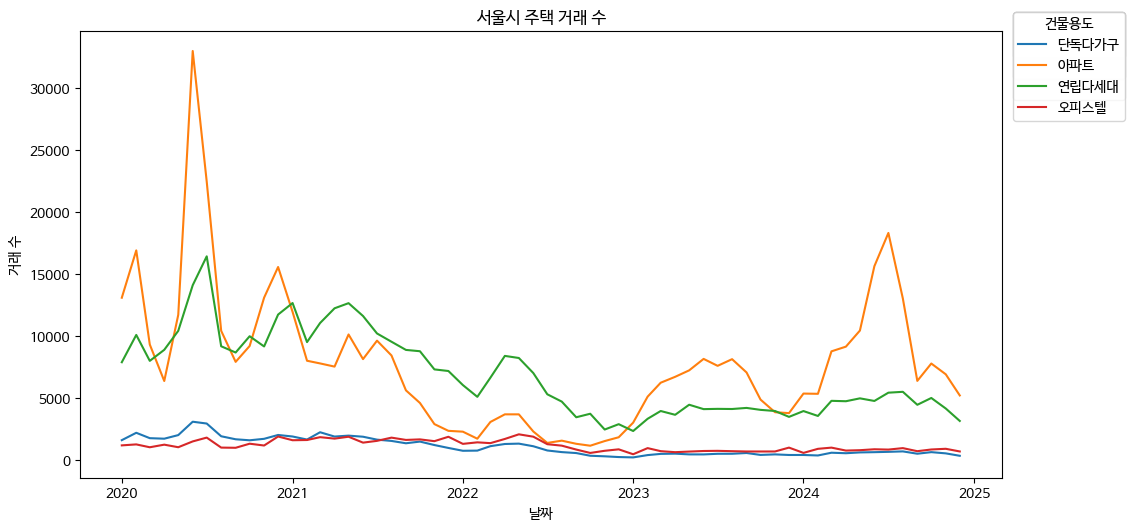

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):

  xs = series['날짜']
  ys = series['거래 수']

  plt.plot(xs, ys, label=series_name)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = date_trade_count.sort_values('날짜', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('건물용도')):
  _plot_series(series, series_name, i)
  fig.legend(title='건물용도', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('날짜')
plt.ylabel('거래 수')
plt.title("서울시 주택 거래 수")

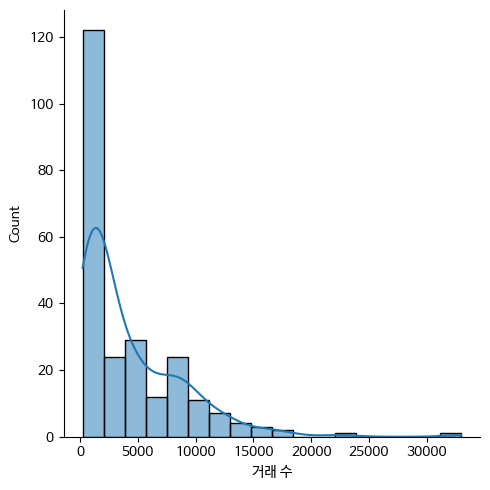

In [ ]:
sns.displot(data=date_trade_count, x='거래 수', kde=True)

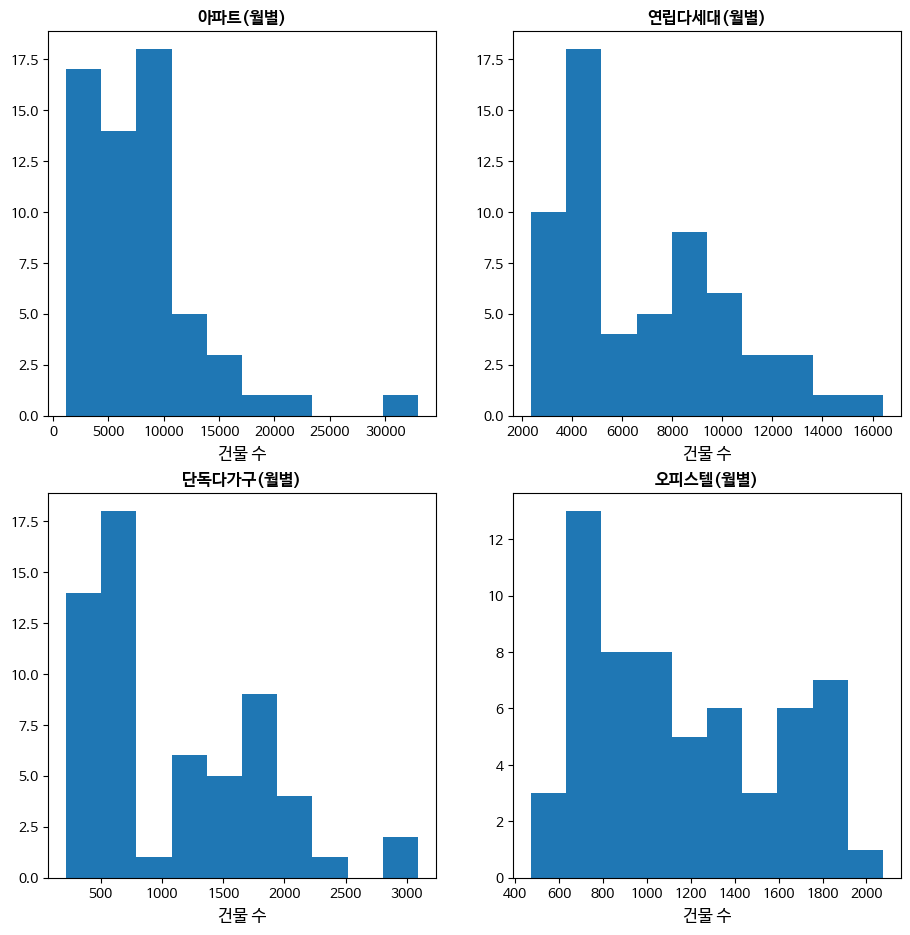

In [ ]:
building = date_trade_count['건물용도'].unique()

# 2X2 형식으로 서브플롯 만들기
fig, axes = plt.subplots(2, 2, figsize=(11,11)) # 2x2 그리드 생성
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환하여 다루기 편하게 함


for i, columns in enumerate(building):
  building_date = date_trade_count[date_trade_count['건물용도'] == columns]
  xs = building_date['날짜']
  ys = building_date['거래 수']
  axes[i].hist(ys)
  # 그래프 제목
  axes[i].set_title(f'{columns}(월별)', fontsize=12, fontweight='bold')
  axes[i].set_xlabel('건물 수', fontsize=12)


Text(0, 0.5, '건물 수')

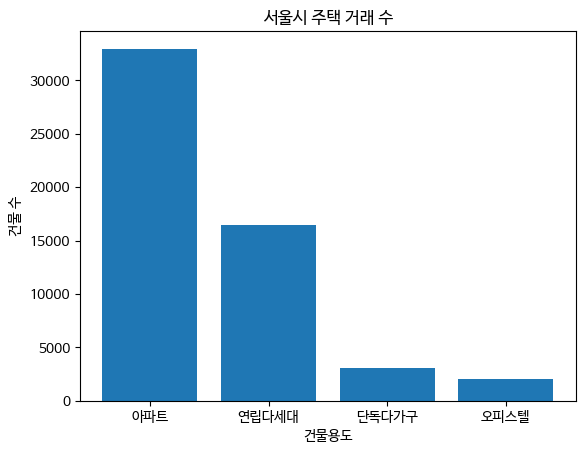

In [ ]:
plt.bar(date_trade_count['건물용도'],date_trade_count['거래 수'])
plt.title("서울시 주택 거래 수")
plt.xlabel("건물용도")
plt.ylabel("건물 수")

In [ ]:
date_trade_cost=final_df.groupby(['날짜','건물용도'])['물건금액(억)'].mean().reset_index()
date_trade_cost

날짜   건물용도    물건금액(억)
0   2020-01-01  단독다가구  10.503193
1   2020-01-01    아파트   6.587303
2   2020-01-01  연립다세대   2.900078
3   2020-01-01   오피스텔   2.509811
4   2020-02-01  단독다가구  11.257635
..         ...    ...        ...
235 2024-11-01   오피스텔   2.685771
236 2024-12-01  단독다가구  17.458421
237 2024-12-01    아파트  11.614709
238 2024-12-01  연립다세대   3.515576
239 2024-12-01   오피스텔   2.701099

[240 rows x 3 columns]

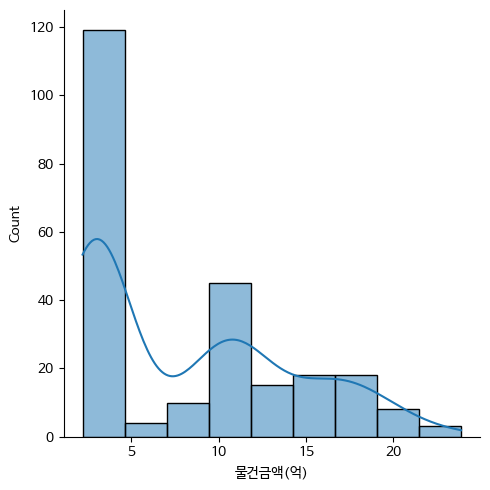

In [ ]:
sns.displot(data=date_trade_cost, x='물건금액(억)', kde=True)

In [ ]:
print(date_trade_cost['물건금액(억)'].skew(),date_trade_cost['물건금액(억)'].kurt())

0.6686963185535946 -0.8339466769140325


In [ ]:
date_trade_cost['물건금액(억)_root'] = np.sqrt(date_trade_cost['물건금액(억)'])

In [ ]:
date_trade_cost['건물용도'].unique()

array(['단독다가구', '아파트', '연립다세대', '오피스텔'], dtype=object)

Text(0, 0.5, '물건금액(억)')

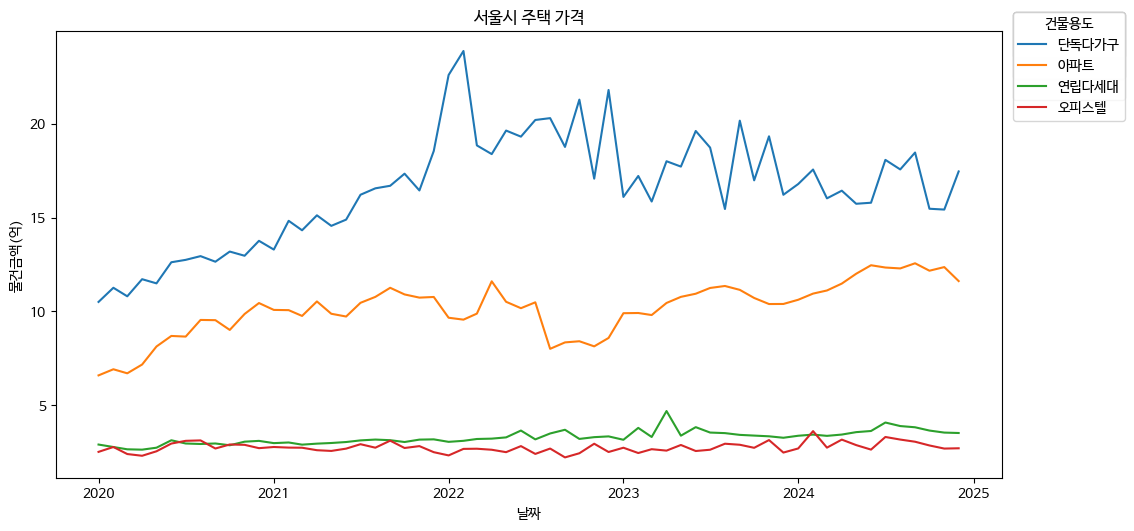

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):

  xs = series['날짜']
  ys = series['물건금액(억)']

  plt.plot(xs, ys, label=series_name)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = date_trade_cost.sort_values('날짜', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('건물용도')):
  _plot_series(series, series_name, i)
  fig.legend(title='건물용도', bbox_to_anchor=(1, 1), loc='upper left')
plt.title("서울시 주택 가격")
plt.xlabel('날짜')
plt.ylabel('물건금액(억)')

In [ ]:
date_trade_cost['건물용도'].unique()

array(['다가구', '다세대', '단독', '아파트', '연립', '연립다세대', '오피스텔'], dtype=object)

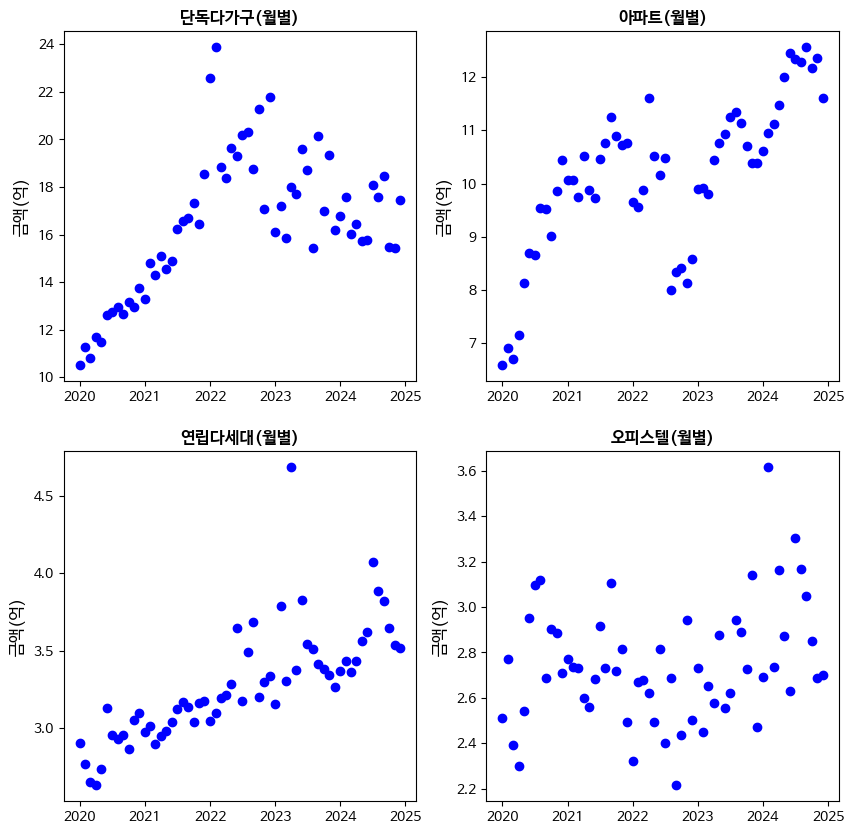

In [ ]:
building_cost = date_trade_cost['건물용도'].unique()

# 2X2 형식으로 서브플롯 만들기
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 그리드 생성
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환하여 다루기 편하게 함

for i, columns in enumerate(building_cost):
  building_date = date_trade_cost[date_trade_cost['건물용도'] == columns]

  xs = building_date['날짜']
  ys = building_date['물건금액(억)']


  axes[i].scatter(building_date['날짜'],ys,color='blue')
  # 그래프 제목
  axes[i].set_title(f'{columns}(월별)', fontsize=12, fontweight='bold')
  axes[i].set_ylabel('금액(억)', fontsize=12)

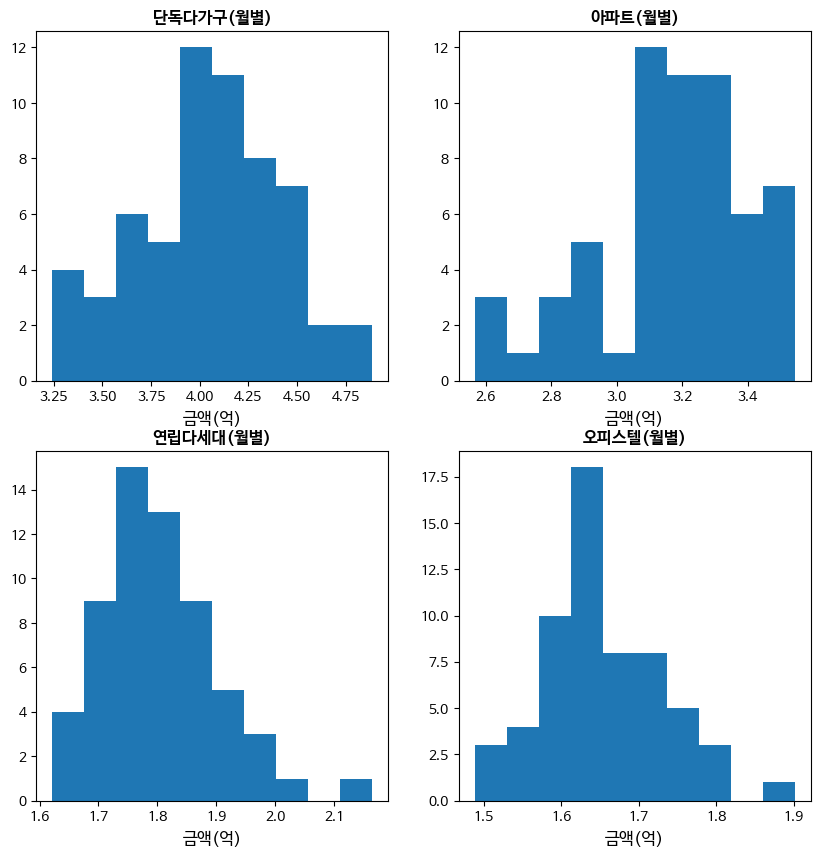

In [ ]:
building_cost = date_trade_cost['건물용도'].unique()

# 2X2 형식으로 서브플롯 만들기
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 그리드 생성
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환하여 다루기 편하게 함

for i, columns in enumerate(building_cost):
  building_date = date_trade_cost[date_trade_cost['건물용도'] == columns]
  xs = building_date['날짜']
  ys = building_date['물건금액(억)_root']
  axes[i].hist(ys)
  # 그래프 제목
  axes[i].set_title(f'{columns}(월별)', fontsize=12, fontweight='bold')
  axes[i].set_xlabel('금액(억)', fontsize=12)


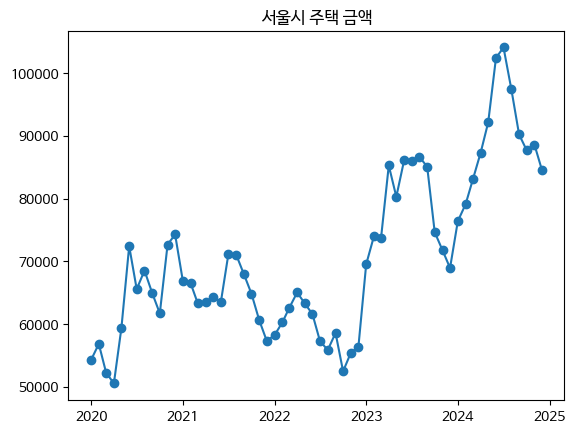

In [ ]:
x=prize_group['날짜']
y=prize_group['물건금액(만원)']

plt.title("서울시 주택 금액")
plt.plot(x,y, marker='o', linestyle='solid')

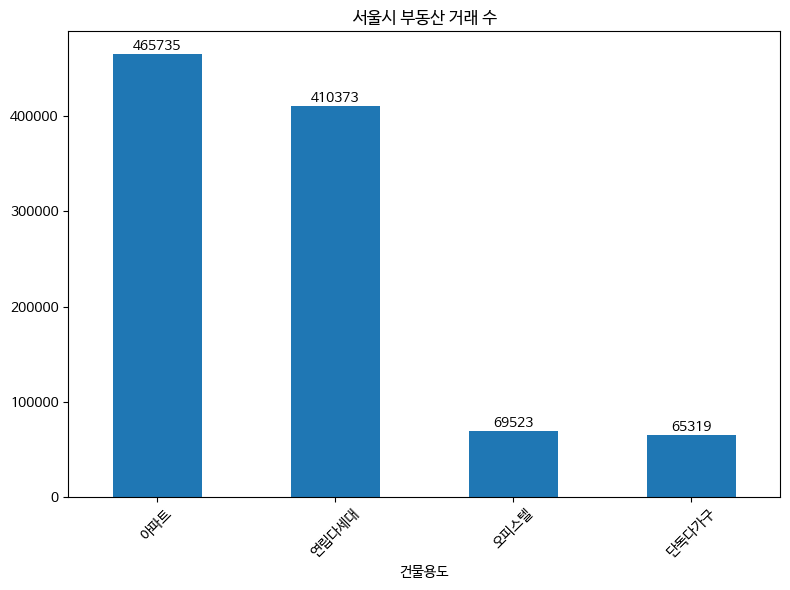

In [ ]:
count=final_df['건물용도'].value_counts()
#파이

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
count.plot(kind='bar')

# 값 표시 (바 위에)
for index, value in enumerate(count):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title("서울시 부동산 거래 수")
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
#건물용도 별 주택 가격
contruction_cost=final_df.groupby('건물용도').agg({'물건금액(억)':'mean'}).round(2).sort_values(by='물건금액(억)',ascending=False)
contruction_cost

물건금액(억)
건물용도          
단독다가구    15.23
아파트      10.08
연립다세대     3.17
오피스텔      2.73

<Figure size 800x600 with 0 Axes>

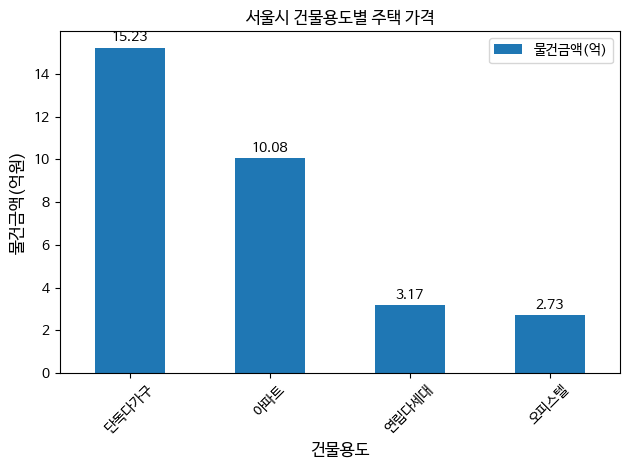

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
contruction_cost.plot(kind='bar')

# 값 표시
for index, value in enumerate(contruction_cost['물건금액(억)']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title("서울시 건물용도별 주택 가격")
plt.xlabel("건물용도",fontsize=12)
plt.ylabel("물건금액(억원)",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# df['주소'] = df['주소'].str.strip()
# df['주소'].str.split(' ', expand=True)
# df[['시','구','동']] = df['주소'].str.split(' ', expand=True)

final_df['자치구명'] = final_df['자치구명'].str.strip()
final_df['자치구명'].str.split(' ', expand=True)
final_df[['시','구','동']] = final_df['자치구명'].str.split(' ',expand=True)
final_df[['시','구','동']]

시     구      동
0        서울특별시   노원구    월계동
1        서울특별시    중구  충무로5가
2        서울특별시  동대문구    용두동
3        서울특별시   성동구  하왕십리동
4        서울특별시   중랑구     묵동
...        ...   ...    ...
1010945    구로구  None   None
1010946    구로구  None   None
1010947    구로구  None   None
1010948    마포구  None   None
1010949    강북구  None   None

[1010950 rows x 3 columns]

In [ ]:
final_df['구']=final_df['구'].fillna(final_df['시'])


금액 정규화

In [ ]:
#물건금액(만원) 정규화#물건금액(만원) 정규화
final_df['물건금액(억원)'] = final_df['물건금액(만원)'] / 10000
final_df['물건금액(억원)'] = final_df['물건금액(억원)'].round(2)
final_df[['물건금액(만원)','물건금액(억원)','물건금액(억)']]

물건금액(만원)  물건금액(억원)  물건금액(억)
0           73600      7.36    7.360
1           45500      4.55    4.550
2           18100      1.81    1.810
3           13000      1.30    1.300
4          105000     10.50   10.500
...           ...       ...      ...
1010945      9190      0.92    0.919
1010946      9190      0.92    0.919
1010947      9740      0.97    0.974
1010948    195000     19.50   19.500
1010949    164000     16.40   16.400

[1010950 rows x 3 columns]

In [ ]:
final_df.columns

Index(['자치구명', '날짜', '물건금액(만원)', '층', '평수', '건축년도', '건물용도', '지하철역', '학교 수',
       '건설중장비임대', '건설엔지니어링', '건축설계', '선행종합지수', '동행종합지수', '유형별 주택매매가격지수',
       '유형별 주택전세가격지수', '유형별 주택월세통합가격지수', '주택건설인허가실적(서울)', '미분양주택현황(서울)',
       '기준금리', '소비자물가', '실질 GDP', '주택담보대출(증감-전월대비)', '물건금액(억)', '시', '구', '동',
       '물건금액(억원)'],
      dtype='object')

In [ ]:
final_gu=final_df.groupby('구').agg({'물건금액(억)':'mean'}).reset_index().round(2).sort_values("물건금액(억)",ascending=False)
prize_top5=final_gu.head().set_index('구')
prize_top5

물건금액(억)
구           
강남구    17.40
서초구    15.21
용산구    13.83
성동구    11.95
송파구     9.66

<Figure size 800x600 with 0 Axes>

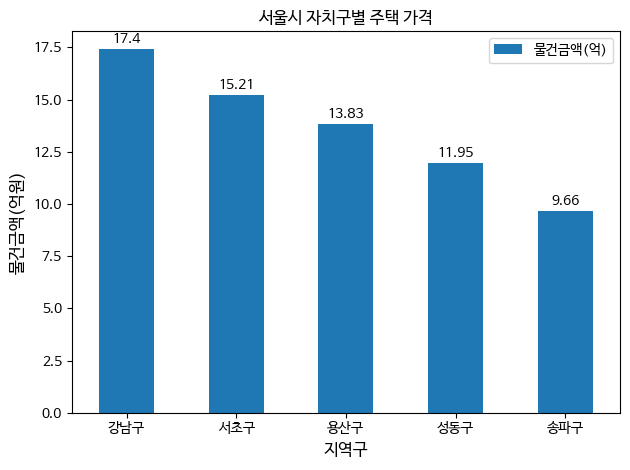

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
prize_top5.plot(kind='bar')
plt.title("서울시 자치구별 주택 가격")
plt.xlabel("지역구",fontsize=12)
plt.ylabel("물건금액(억원)",fontsize=12)

# 값 표시
for index, value in enumerate(prize_top5['물건금액(억)']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
contrucion_year = final_df.groupby('구').agg({'건축년도':'mean'}).round(0).sort_values('건축년도',ascending=False)
contrucion_year

건축년도
구           
금천구   2009.0
강서구   2006.0
구로구   2003.0
중랑구   2003.0
성동구   2001.0
양천구   2000.0
도봉구   1999.0
강북구   1999.0
서초구   1999.0
종로구   1999.0
광진구   1998.0
송파구   1998.0
관악구   1998.0
용산구   1998.0
동작구   1997.0
서대문구  1997.0
은평구   1996.0
영등포구  1996.0
성북구   1994.0
노원구   1994.0
강동구   1992.0
마포구   1992.0
중구    1989.0
강남구   1988.0
동대문구  1987.0

In [ ]:
final_gu=final_df.groupby('구').agg({'평수':'mean'}).reset_index().round(2).sort_values("평수",ascending=False)
top5=final_gu.head().set_index('구')
top5


평수
구         
강남구  26.43
용산구  26.21
서초구  25.13
성동구  24.60
종로구  23.96

<Figure size 800x600 with 0 Axes>

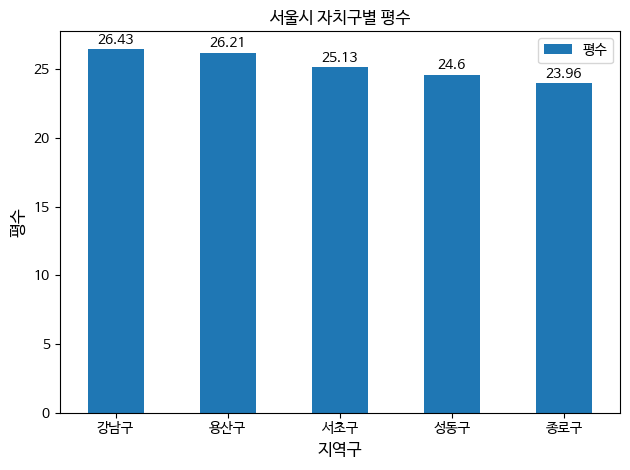

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
top5.plot(kind='bar')
plt.title("서울시 자치구별 평수")
plt.xlabel("지역구",fontsize=12)
plt.ylabel("평수",fontsize=12)

# 값 표시
for index, value in enumerate(top5['평수']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
prize_top5_reason=final_df[(final_df['구']=='강남구')|(final_df['구']=='서초구')|(final_df['구']=='용산구')|(final_df['구']=='성동구')|(final_df['구']=='송파구')]
prize_top5_gu=prize_top5_reason.groupby('구')['평수'].mean().round(2).sort_values(ascending=False)
prize_top5_gu

구
강남구    26.43
용산구    26.21
서초구    25.13
성동구    24.60
송파구    21.22
Name: 평수, dtype: float64

In [ ]:
prize_top5_reason

자치구명         날짜  물건금액(만원)   층  평수  건축년도   건물용도  지하철역  \
3        서울특별시 성동구 하왕십리동 2021-12-01     13000   6   4  2013    아파트    14   
24         서울특별시 서초구 서초동 2021-12-01    269000   9  24  1988    아파트    12   
25         서울특별시 서초구 서초동 2021-12-01    280000   9  24  1988    아파트    12   
27         서울특별시 송파구 풍납동 2021-12-01    185000   4  57  1999    아파트    28   
28         서울특별시 송파구 장지동 2021-12-01    168000   5  26  2016    아파트    28   
...                  ...        ...       ...  ..  ..   ...    ...   ...   
1010926              강남구 2023-11-01    315000  25  35  2003    아파트    21   
1010932              성동구 2023-11-01     59000   1  18  2000    아파트    14   
1010934              강남구 2023-09-01    165000  15  15  2019    아파트    21   
1010936              용산구 2023-08-01     39100   1  12  2011  연립다세대    10   
1010942              서초구 2023-01-01    775000  22  60  2009    아파트    12   

         학교 수  건설중장비임대  ...  미분양주택현황(서울)  기준금리   소비자물가  실질 GDP  \
3          21   107.74  ...           54   1.0  104.04     1.6   
24         24   107.74  ...           54   1.0  104.04     1.6   
25         24   107.74  ...           54   1.0  104.04     1.6   
27         41   107.74  ...           54   1.0  104.04     1.6   
28         41   107.74  ...           54   1.0  104.04     1.6   
...       ...      ...  ...          ...   ...     ...     ...   
1010926    34   133.96  ...          877   3.5  112.68     0.5   
1010932    21   133.96  ...          877   3.5  112.68     0.5   
1010934    34   133.48  ...          914   3.5  112.85     0.8   
1010936    14   133.48  ...          976   3.5  112.28     0.8   
1010942    24   132.71  ...          996   3.5  110.07     0.4   

         주택담보대출(증감-전월대비)  물건금액(억)      시    구      동  물건금액(억원)  
3               1589.925     1.30  서울특별시  성동구  하왕십리동      1.30  
24              1589.925    26.90  서울특별시  서초구    서초동     26.90  
25              1589.925    28.00  서울특별시  서초구    서초동     28.00  
27              1589.925    18.50  서울특별시  송파구    풍납동     18.50  
28              1589.925    16.80  서울특별시  송파구    장지동     16.80  
...                  ...      ...    ...  ...    ...       ...  
1010926         2663.450    31.50    강남구  강남구   None     31.50  
1010932         2663.450     5.90    성동구  성동구   None      5.90  
1010934         2423.800    16.50    강남구  강남구   None     16.50  
1010936         2485.800     3.91    용산구  용산구   None      3.91  
1010942         -155.475    77.50    서초구  서초구   None     77.50  

[193667 rows x 28 columns]

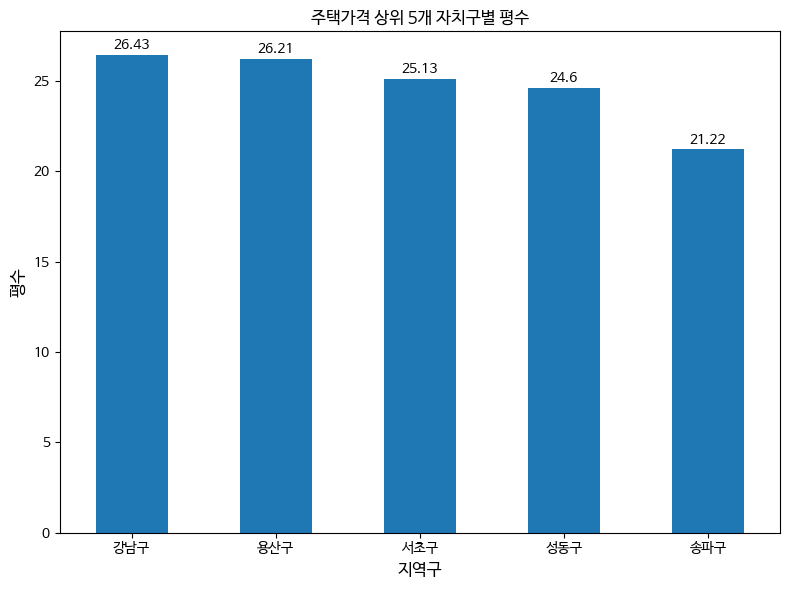

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
prize_top5_gu.plot(kind='bar')
plt.title("주택가격 상위 5개 자치구별 평수")
plt.xlabel("지역구",fontsize=12)
plt.ylabel("평수",fontsize=12)

# 값 표시
for index, value in enumerate(prize_top5_gu): # accessing the values directly
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
prize_top5_station=prize_top5_reason.groupby('구')['지하철역'].mean().round(2).sort_values(ascending=False)
prize_top5_station

구
송파구    28.0
강남구    21.0
성동구    14.0
서초구    12.0
용산구    10.0
Name: 지하철역, dtype: float64

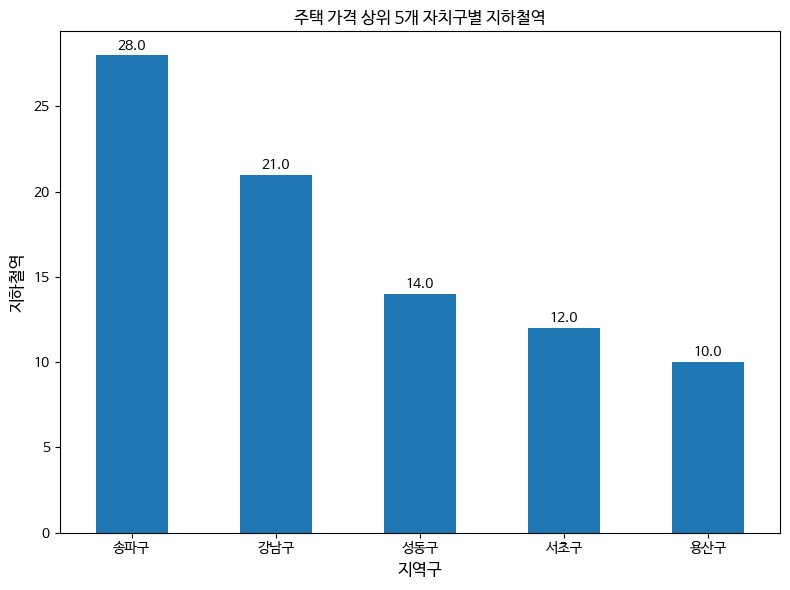

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
prize_top5_station.plot(kind='bar')
plt.title("주택 가격 상위 5개 자치구별 지하철역")
plt.xlabel("지역구",fontsize=12)
plt.ylabel("지하철역",fontsize=12)

# 값 표시
for index, value in enumerate(prize_top5_station): # accessing the values directly
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
prize_top5_school=prize_top5_reason.groupby('구')['학교 수'].mean().round(2).sort_values(ascending=False)
prize_top5_school

구
송파구    41.0
강남구    34.0
서초구    24.0
성동구    21.0
용산구    14.0
Name: 학교 수, dtype: float64

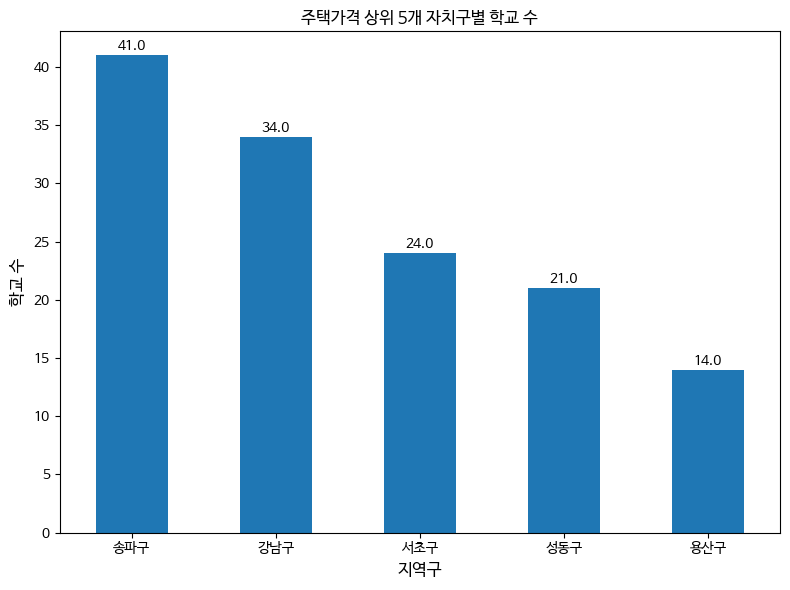

In [ ]:
# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
prize_top5_school.plot(kind='bar')
plt.title("주택가격 상위 5개 자치구별 학교 수")
plt.xlabel("지역구",fontsize=12)
plt.ylabel("학교 수",fontsize=12)

# 값 표시
for index, value in enumerate(prize_top5_school): # accessing the values directly
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

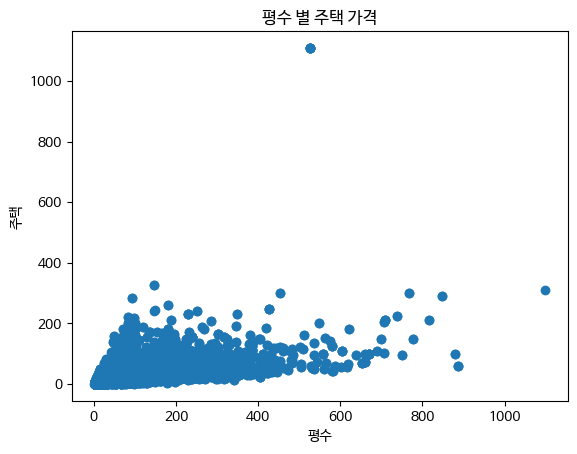

In [ ]:
plt.title("평수 별 주택 가격")
plt.xlabel("평수")
plt.ylabel("주택")
plt.scatter(final_df['평수'],final_df['물건금액(억)'])

In [ ]:
final_df[final_df['평수']>1000]

자치구명         날짜  물건금액(만원)  층    평수  건축년도 건물용도  지하철역  학교 수  \
132700  서울특별시 성북구 석관동 2023-11-01   3100000  2  1099  1993   단독     9    29   

        건설중장비임대  ...  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  미분양주택현황(서울)  기준금리  \
132700   133.96  ...            96.1          6,893          877   3.5   

         소비자물가  실질 GDP  주택담보대출(증감-전월대비)      시    구    동  
132700  112.68     0.5          2663.45  서울특별시  성북구  석관동  

[1 rows x 26 columns]

In [ ]:
final_df.columns

Index(['자치구명', '날짜', '물건금액(만원)', '층', '평수', '건축년도', '건물용도', '지하철역', '학교 수',
       '건설중장비임대', '건설엔지니어링', '건축설계', '선행종합지수', '동행종합지수', '유형별 주택매매가격지수',
       '유형별 주택전세가격지수', '유형별 주택월세통합가격지수', '주택건설인허가실적(서울)', '미분양주택현황(서울)',
       '기준금리', '소비자물가', '실질 GDP', '주택담보대출(증감-전월대비)', '시', '구', '동'],
      dtype='object')

In [ ]:
final_df[['물건금액(억)','층','평수','지하철역','학교 수']].corr()['물건금액(억)']

물건금액(억)    1.000000
층          0.234316
평수         0.617805
지하철역       0.233572
학교 수       0.014194
Name: 물건금액(억), dtype: float64

<Axes: >

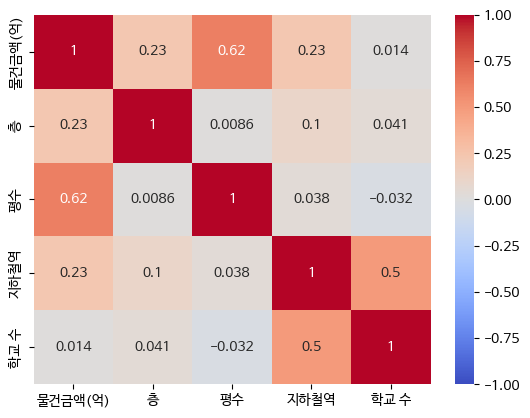

In [ ]:
sns.heatmap(final_df[['물건금액(억)','층','평수','지하철역','학교 수']].corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
#편의시설
gu_convience=final_df.groupby('구').agg({'지하철역':'mean','학교 수':'mean','평수':'mean'}).reset_index().sort_values(['지하철역','학교 수','평수'],ascending=False).round(2)
top_convience=gu_convience.head()
top_convience

구  지하철역  학교 수     평수
17  송파구  28.0  41.0  21.22
23   중구  23.0  11.0  21.70
0   강남구  21.0  34.0  26.43
12  마포구  16.0  22.0  20.07
1   강동구  15.0  29.0  20.48

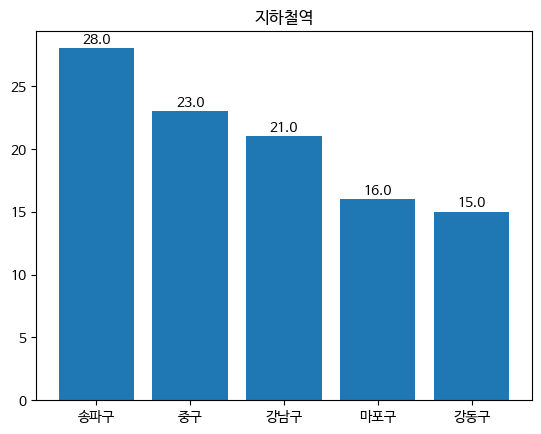

In [ ]:
x=top_convience['구']
y=top_convience['지하철역']

plt.title("지하철역")
plt.bar(x,y)
# 값 표시
for index, value in enumerate(top_convience['지하철역']): # accessing the values directly
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

<BarContainer object of 5 artists>

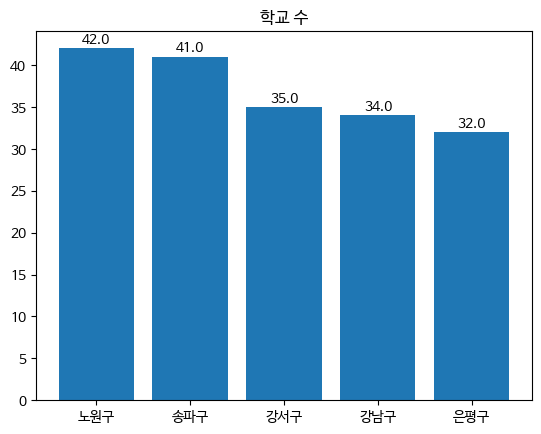

In [ ]:
x=top_convience['구']
y=top_convience['학교 수']

plt.title("학교 수")
# 값 표시
for index, value in enumerate(top_convience['학교 수']): # accessing the values directly
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.bar(x,y)

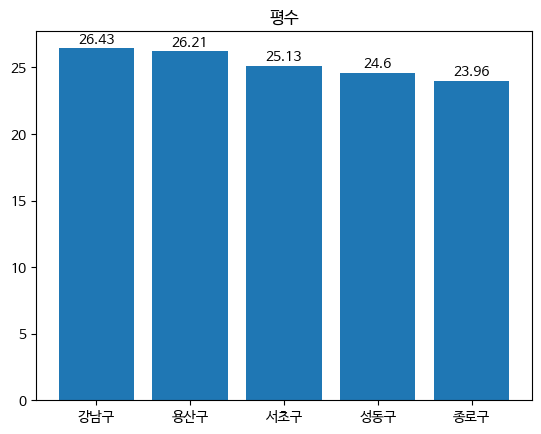

In [ ]:
x=top_convience['구']
y=top_convience['평수']

plt.title("평수")
plt.bar(x,y)
# 값 표시
for index, value in enumerate(top_convience['평수']): # accessing the values directly
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

머신러닝

In [ ]:
X=numeric_columns.drop(columns='물건금액(억)',axis=1)
Y=numeric_columns['물건금액(억)']

In [ ]:
#분할
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#랜덤포레스트 회귀
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #GridSearchCV

rf_Regressor = RandomForestRegressor(n_estimators=50, random_state=42)
rf_Regressor.fit(X_train_scaled,y_train)

print("RandomForest")
print("Train score",rf_Regressor.score(X_train_scaled,y_train))
print("Test score",rf_Regressor.score(X_test_scaled,y_test))

RandomForest
Train score 0.9999750037646197
Test score 0.9999804440380369


In [ ]:
# 예측
y_pred = rf_Regressor.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score # Import r2_score
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.0014133587768268099
Mean Absolute Error (MAE): 0.00024790479253843567
R-squared (R²): 0.9999804440380369


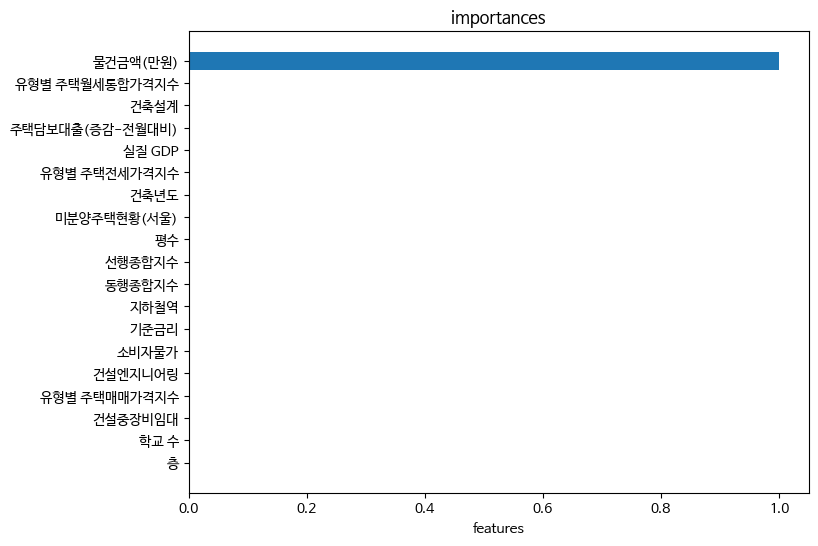

In [ ]:
#특성 중요도
importances = rf_Regressor.feature_importances_

# 특성 중요도 시각화
features = X.columns
indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.title("importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("features")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def get_score(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true, y_pred)
    print(model_name, 'mean_squared_error:',mse,'mean_absolute_error:',mae,'r2_score: ',r2)

In [ ]:
from sklearn.impute import SimpleImputer

   # Create an imputer instance
   imputer = SimpleImputer(strategy='mean') # Or 'median', 'most_frequent'

   # Fit the imputer on your training data and transform
   X_train_scaled = imputer.fit_transform(X_train_scaled)
   X_test_scaled = imputer.transform(X_test_scaled)

IndentationError: unexpected indent (<ipython-input-85-05b58a89ddf2>, line 4)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # Import GradientBoostingRegressor

model_gbm = GradientBoostingRegressor(random_state=42) # Change to GradientBoostingRegressor
model_gbm.fit(X_train_scaled,y_train)

print("Train score",model_gbm.score(X_train_scaled,y_train))
print("Test score",model_gbm.score(X_test_scaled,y_test))

#예측
y_gbm_pred = model_gbm.predict(X_test_scaled)
y_train_pred = model_gbm.predict(X_train_scaled)
y_test_pred = model_gbm.predict(X_test_scaled)

get_score('gbm',y_test,y_gbm_pred)

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### 2030 주택현황 파악

In [5]:
builing_type= pd.read_csv("/content/향후+주거+형태_20250501114820.csv",encoding='euc-kr',sep='\t')
builing_type

항목  20대 이하   30대  100 만원 미만  100~200만 미만  200~300만 미만  300~400만 미만  \
0        아파트    61.5  76.4       50.3         41.7         54.9         67.5   
1       단독주택     9.7   9.3       27.1         33.3         22.2         17.2   
2  연립/다세대 주택    14.2   9.3       18.7         21.9         16.4         11.5   
3       오피스텔    14.6   5.0        3.9          2.8          6.3          3.7   

   400~500만 미만  500만원 이상  
0         70.7      71.8  
1         16.2      17.4  
2         11.5       9.1  
3          1.6       1.5

In [6]:
#2030
builing_type['2030세대'] = (builing_type['20대 이하']+builing_type['30대'])/2
builing_type.sort_values("2030세대",ascending=False)

항목  20대 이하   30대  100 만원 미만  100~200만 미만  200~300만 미만  300~400만 미만  \
0        아파트    61.5  76.4       50.3         41.7         54.9         67.5   
2  연립/다세대 주택    14.2   9.3       18.7         21.9         16.4         11.5   
3       오피스텔    14.6   5.0        3.9          2.8          6.3          3.7   
1       단독주택     9.7   9.3       27.1         33.3         22.2         17.2   

   400~500만 미만  500만원 이상  2030세대  
0         70.7      71.8   68.95  
2         11.5       9.1   11.75  
3          1.6       1.5    9.80  
1         16.2      17.4    9.50

([<matplotlib.patches.Wedge at 0x78839e530990>,
 [Text(0.9107587682288227, -0.6168617884861387, '아파트'),
  Text(-1.096332521418262, -0.0897496656298857, '단독주택'),
  Text(-0.9165318005073033, 0.6082511476839487, '연립/다세대 주택'),
  Text(-0.3333388155701049, 1.0482772696354337, '오피스텔')],
 [Text(0.4967775099429942, -0.3364700664469847, '68.95%'),
  Text(-0.5979995571372337, -0.04895436307084674, '9.50%'),
  Text(-0.4999264366403472, 0.33177335328215385, '11.75%'),
  Text(-0.18182117212914814, 0.5717876016193274, '9.80%')])

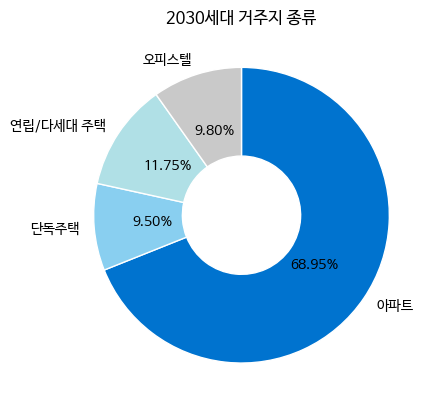

In [7]:
colors=['#0073CF','#89CFF0','#B0E0E6','#C9C9C9']
wedgeprops={'width': 0.6, 'edgecolor': 'w'}
plt.title("2030세대 거주지 종류")
plt.pie(builing_type['2030세대'],labels=builing_type['항목'],colors=colors,autopct='%.2f%%',startangle=90,counterclock=False,wedgeprops=wedgeprops)


([<matplotlib.patches.Wedge at 0x78839e2ffad0>,
 [Text(0.9366820240673023, -0.5767380564772728, '아파트'),
  Text(-1.0969975792102606, 0.08121767792068466, '단독주택'),
  Text(-0.6159720164361072, 0.9113607819999916, '연립/다세대 주택'),
  Text(-0.1277018197874762, 1.0925622386038092, '오피스텔')],
 [Text(0.5109174676730739, -0.31458439444214875, '67.57%'),
  Text(-0.5983623159328694, 0.04430055159310072, '17.22%'),
  Text(-0.33598473623787667, 0.4971058810909045, '11.51%'),
  Text(-0.0696555380658961, 0.5959430392384414, '3.70%')])

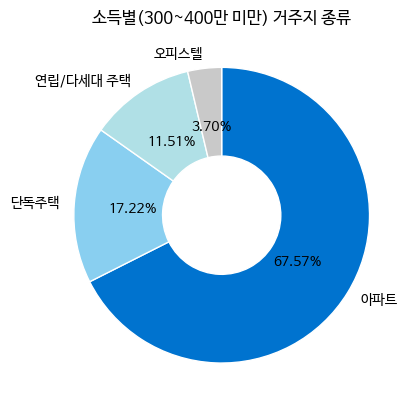

In [8]:
plt.title("소득별(300~400만 미만) 거주지 종류")
plt.pie(builing_type['300~400만 미만'],labels=builing_type['항목'],colors=colors,autopct='%.2f%%',startangle=90,counterclock=False,wedgeprops=wedgeprops)

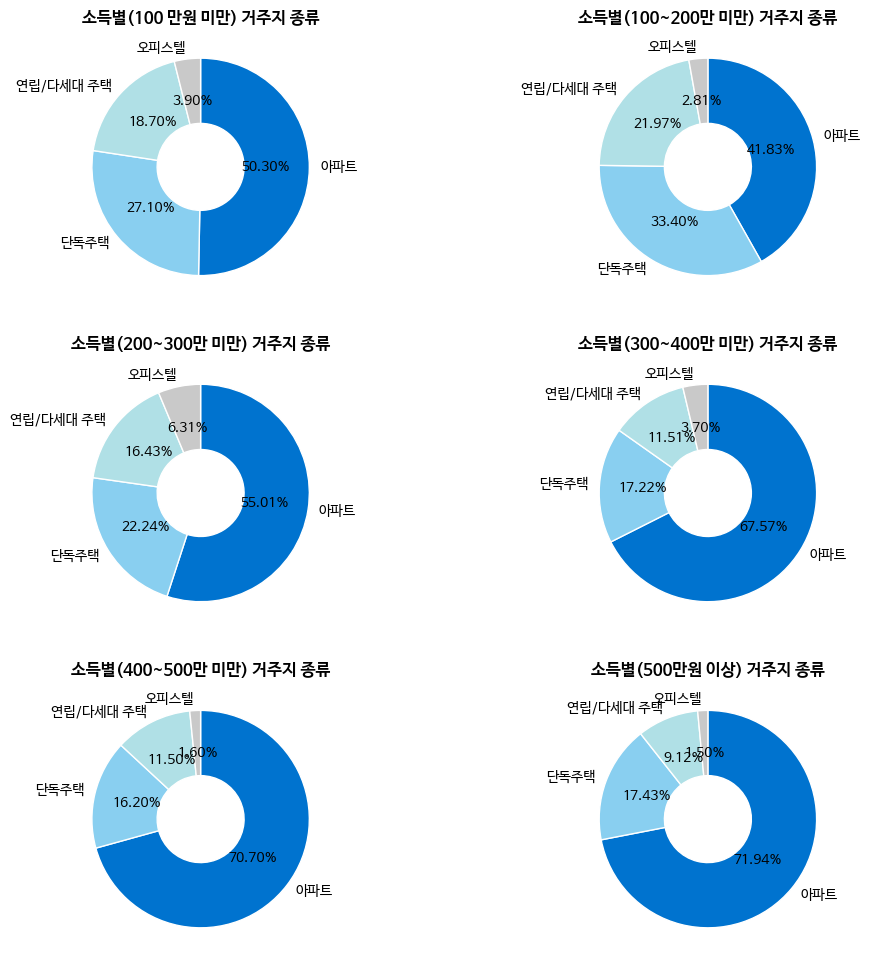

In [ ]:
y=builing_type[['100 만원 미만','100~200만 미만','200~300만 미만','300~400만 미만','400~500만 미만','500만원 이상']]
# 3x3 형식으로 서브플롯 만들기
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3x2 그리드 생성
axes = axes.flatten()
for index,columns in enumerate(y):
  axes[index].pie(builing_type[columns],labels=builing_type['항목'],autopct='%.2f%%',colors=colors,startangle=90,counterclock=False,wedgeprops=wedgeprops)
  # 그래프 제목
  axes[index].set_title(f'소득별({columns}) 거주지 종류', fontsize=12, fontweight='bold')

In [ ]:
#주거형태
contract_df= pd.read_csv("/content/2030주택유형.csv",encoding='euc-kr',sep=',')
contract_df

항목   서울시
0         자가  35.8
1         전세  29.4
2  보증금 있는 월세  32.3
3  보증금 없는 월세   2.5

In [ ]:
contract_df

항목   서울시
0         자가  35.8
1         전세  29.4
2  보증금 있는 월세  32.3
3  보증금 없는 월세   2.5

([<matplotlib.patches.Wedge at 0x7fe14bc98f50>,
 [Text(0.9021339298383131, 0.43145610742517204, '자가'),
  Text(-0.03141081555679243, -0.9995065585908164, '전세'),
  Text(-0.9214567993045079, 0.3884808451075701, '보증금 있는 월세'),
  Text(-0.0784591157290088, 0.996917332159002, '보증금 없는 월세')],
 [Text(0.5412803579029878, 0.25887366445510324, '35.80%'),
  Text(-0.01884648933407546, -0.5997039351544898, '29.40%'),
  Text(-0.5528740795827047, 0.23308850706454204, '32.30%'),
  Text(-0.04707546943740527, 0.5981503992954011, '2.50%')])

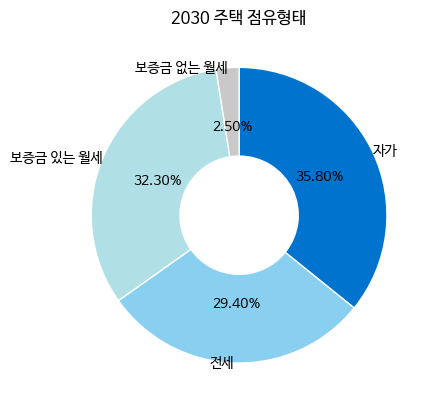

In [ ]:
colors=['#0073CF','#89CFF0','#B0E0E6','#C9C9C9']
wedgeprops={'width': 0.6, 'edgecolor': 'w'}
plt.title("2030 주택 점유형태")

plt.pie(contract_df['서울시'],labels=contract_df['항목'],labeldistance=1.0,autopct='%.2f%%',colors=colors,startangle=90,counterclock=False,wedgeprops=wedgeprops)


소득

In [ ]:
earn_df = pd.read_csv("/content/2030세대_월평균임금.csv")
earn_df

연도  2030세대 평균임금
0  2020    3146000.0
1  2021    3224500.0
2  2022    3405750.0
3  2023    3641750.0

<ipython-input-66-4c37a970ea3f>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}(원)'.format(v) for v in current_values])


[Text(0, 3100000.0, '3,100,000(원)'),
 Text(0, 3200000.0, '3,200,000(원)'),
 Text(0, 3300000.0, '3,300,000(원)'),
 Text(0, 3400000.0, '3,400,000(원)'),
 Text(0, 3500000.0, '3,500,000(원)'),
 Text(0, 3600000.0, '3,600,000(원)'),
 Text(0, 3700000.0, '3,700,000(원)')]

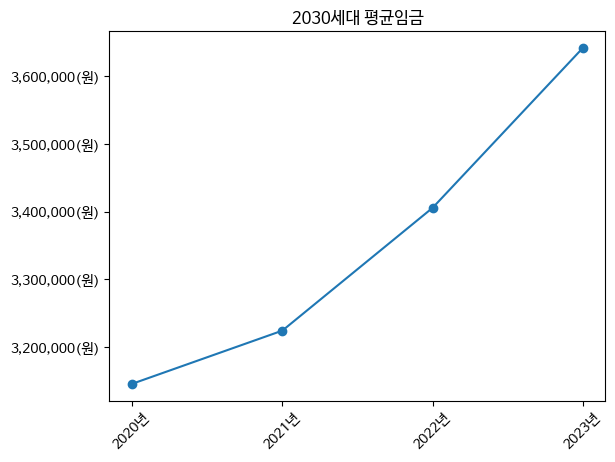

In [ ]:
x=earn_df['연도']
y=earn_df['2030세대 평균임금']
x_labels=['2020년','2021년','2022년','2023년']
plt.title("2030세대 평균임금")
plt.plot(x,y,marker='o')
current_values = plt.gca().get_yticks()
plt.xticks(range(2020,2024),labels=x_labels, rotation=45)
plt.gca().set_yticklabels(['{:,.0f}(원)'.format(v) for v in current_values])

###월세

In [ ]:
month_df1 = pd.read_excel("/content/월세 머신러닝.xlsx",sheet_name="통합 문서1")
month_df1

In [ ]:
month_df2 = pd.read_excel("/content/월세 머신러닝.xlsx",sheet_name='Sheet2')
month_df2

In [ ]:
month_concat = pd.concat([month_df1,month_df2])
month_concat

거래유형      날짜  보증금(만원)  월세금(만원)    층  건축년도 건물용도  평수     구  지하철역  학교 수
0        월세  202312     3330       13  7.0  2023  다세대   6   종로구    15    12
1        월세  202312    29000        6  4.0  2016  다세대  12   광진구    11    22
2        월세  202312    20000       50  4.0  2008  다세대  15   광진구    11    22
3        월세  202312     4000       80  3.0  2000  다세대  17   종로구    15    12
4        월세  202312    20000       50  4.0  2008  다세대  15   광진구    11    22
...     ...     ...      ...      ...  ...   ...  ...  ..   ...   ...   ...
652499   월세  202201      100       25  2.0  2014  다세대  17   금천구     1    19
652500   월세  202201      500       40  2.0  2011  다세대   5   금천구     1    19
652501   월세  202201    10000       10  3.0  2002  다세대   7  영등포구    11    23
652502   월세  202201    33000        7  5.0  2020  다세대   9  영등포구    11    23
652503   월세  202201     2000       60  3.0  2014  다세대   7   송파구    28    41

[1360374 rows x 11 columns]

In [ ]:
from datetime import datetime

# Apply strptime to each element in the '날짜' column using apply
month_concat['날짜'] = month_concat['날짜'].apply(lambda x: datetime.strptime(str(x), '%Y%m'))

In [ ]:
month_concat.head()

거래유형         날짜  보증금(만원)  월세금(만원)    층  건축년도 건물용도  평수    구  지하철역  학교 수
0   월세 2023-12-01     3330       13  7.0  2023  다세대   6  종로구    15    12
1   월세 2023-12-01    29000        6  4.0  2016  다세대  12  광진구    11    22
2   월세 2023-12-01    20000       50  4.0  2008  다세대  15  광진구    11    22
3   월세 2023-12-01     4000       80  3.0  2000  다세대  17  종로구    15    12
4   월세 2023-12-01    20000       50  4.0  2008  다세대  15  광진구    11    22

In [ ]:
eco_df = pd.read_csv("/content/금융데이터 최종본.csv")
eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               60 non-null     object 
 1   건설중장비임대          60 non-null     float64
 2   건설엔지니어링          60 non-null     float64
 3   건축설계             60 non-null     float64
 4   선행종합지수           60 non-null     float64
 5   동행종합지수           60 non-null     float64
 6   유형별 주택매매가격지수     60 non-null     float64
 7   유형별 주택전세가격지수     60 non-null     float64
 8   유형별 주택월세통합가격지수   60 non-null     float64
 9   주택건설인허가실적(서울)    60 non-null     object 
 10  미분양주택현황(서울)      60 non-null     int64  
 11  기준금리             60 non-null     float64
 12  소비자물가            60 non-null     float64
 13  실질 GDP           60 non-null     float64
 14  주택담보대출(증감-전월대비)  60 non-null     float64
dtypes: float64(12), int64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
from datetime import datetime

# Apply strptime to each element in the '날짜' column using apply
eco_df['날짜'] = eco_df['날짜'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

In [ ]:
final_month=month_concat.merge(eco_df,on='날짜',how='inner')
final_month

In [ ]:
final_month.head()
final_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360374 entries, 0 to 1360373
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   거래유형             1360374 non-null  object        
 1   날짜               1360374 non-null  datetime64[ns]
 2   보증금(만원)          1360374 non-null  int64         
 3   월세금(만원)          1360374 non-null  int64         
 4   층                1360374 non-null  float64       
 5   건축년도             1360374 non-null  int64         
 6   건물용도             1360374 non-null  object        
 7   평수               1360374 non-null  int64         
 8   구                1360374 non-null  object        
 9   지하철역             1360374 non-null  int64         
 10  학교 수             1360374 non-null  int64         
 11  건설중장비임대          1360374 non-null  float64       
 12  건설엔지니어링          1360374 non-null  float64       
 13  건축설계             1360374 non-null  float64       
 14  선행

In [ ]:
final_month.to_csv("월세 머신러닝 병합.csv")

In [ ]:
final_month_df=pd.read_csv("/content/월세 머신러닝 병합.csv")
final_month_df.head()

Unnamed: 0 거래유형          날짜  보증금(만원)  월세금(만원)    층  건축년도 건물용도  평수    구  \
0           0   월세  2023-12-01     3330       13  7.0  2023  다세대   6  종로구   
1           1   월세  2023-12-01    29000        6  4.0  2016  다세대  12  광진구   
2           2   월세  2023-12-01    20000       50  4.0  2008  다세대  15  광진구   
3           3   월세  2023-12-01     4000       80  3.0  2000  다세대  17  종로구   
4           4   월세  2023-12-01    20000       50  4.0  2008  다세대  15  광진구   

   ...  동행종합지수  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0  ...   111.6          86.1          89.9            97.2          3,940   
1  ...   111.6          86.1          89.9            97.2          3,940   
2  ...   111.6          86.1          89.9            97.2          3,940   
3  ...   111.6          86.1          89.9            97.2          3,940   
4  ...   111.6          86.1          89.9            97.2          3,940   

   미분양주택현황(서울)  기준금리   소비자물가  실질 GDP  주택담보대출(증감-전월대비)  
0          958   3.5  112.73     0.5         2259.175  
1          958   3.5  112.73     0.5         2259.175  
2          958   3.5  112.73     0.5         2259.175  
3          958   3.5  112.73     0.5         2259.175  
4          958   3.5  112.73     0.5         2259.175  

[5 rows x 26 columns]

In [ ]:
final_month_df.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
final_month_df.shape

(1360374, 25)

In [ ]:
final_month_df.head()

In [ ]:
#날짜
from datetime import datetime

# Apply strptime to each element in the '날짜' column using apply
final_month_df['날짜'] = final_month_df['날짜'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

In [ ]:
final_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360374 entries, 0 to 1360373
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   거래유형             1360374 non-null  object        
 1   날짜               1360374 non-null  datetime64[ns]
 2   보증금(만원)          1360374 non-null  int64         
 3   월세금(만원)          1360374 non-null  int64         
 4   층                1360374 non-null  float64       
 5   건축년도             1360374 non-null  int64         
 6   건물용도             1360374 non-null  object        
 7   평수               1360374 non-null  int64         
 8   구                1360374 non-null  object        
 9   지하철역             1360374 non-null  int64         
 10  학교 수             1360374 non-null  int64         
 11  건설중장비임대          1360374 non-null  float64       
 12  건설엔지니어링          1360374 non-null  float64       
 13  건축설계             1360374 non-null  float64       
 14  선행

In [ ]:
final_month_df['주택건설인허가실적(서울)'] = final_month_df['주택건설인허가실적(서울)'].str.replace(',', '').astype(float)

In [ ]:
final_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360374 entries, 0 to 1360373
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   거래유형             1360374 non-null  object        
 1   날짜               1360374 non-null  datetime64[ns]
 2   보증금(만원)          1360374 non-null  int64         
 3   월세금(만원)          1360374 non-null  int64         
 4   층                1360374 non-null  float64       
 5   건축년도             1360374 non-null  int64         
 6   건물용도             1360374 non-null  object        
 7   평수               1360374 non-null  int64         
 8   구                1360374 non-null  object        
 9   지하철역             1360374 non-null  int64         
 10  학교 수             1360374 non-null  int64         
 11  건설중장비임대          1360374 non-null  float64       
 12  건설엔지니어링          1360374 non-null  float64       
 13  건축설계             1360374 non-null  float64       
 14  선행

In [ ]:
final_month_df.drop_duplicates(inplace=True)
final_month_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030178 entries, 0 to 1235642
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   거래유형             1030178 non-null  object        
 1   날짜               1030178 non-null  datetime64[ns]
 2   보증금(만원)          1030178 non-null  int64         
 3   월세금(만원)          1030178 non-null  int64         
 4   층                1030178 non-null  float64       
 5   건축년도             1030178 non-null  int64         
 6   건물용도             1030178 non-null  object        
 7   평수               1030178 non-null  int64         
 8   구                1030178 non-null  object        
 9   지하철역             1030178 non-null  int64         
 10  학교 수             1030178 non-null  int64         
 11  건설중장비임대          1030178 non-null  float64       
 12  건설엔지니어링          1030178 non-null  float64       
 13  건축설계             1030178 non-null  float64       
 14  선행종합지수 

In [ ]:
final_month_df.to_csv("월세 머신러닝 병합 중복 제거.csv")

In [ ]:
#이상치 제거
for i, columns in enumerate(final_month_df):
  print(columns)

거래유형
날짜
보증금(만원)
월세금(만원)
층
건축년도
건물용도
평수
구
지하철역
학교 수
건설중장비임대
건설엔지니어링
건축설계
선행종합지수
동행종합지수
유형별 주택매매가격지수
유형별 주택전세가격지수
유형별 주택월세통합가격지수
주택건설인허가실적(서울)
미분양주택현황(서울)
기준금리
소비자물가
실질 GDP
주택담보대출(증감-전월대비)
건축연수


In [ ]:
final_month_df['건축연수'] = 2025 - final_month_df['건축년도']
final_month_df[['건축년도','건축연수']]

건축년도  건축연수
0        2023     2
1        2016     9
2        2008    17
3        2000    25
5        2002    23
...       ...   ...
1235638  2008    17
1235639  2012    13
1235640  1997    28
1235641  2015    10
1235642  2007    18

[1030178 rows x 2 columns]

In [ ]:
numeric_columns=final_month_df.select_dtypes(include=['number'])
numeric_columns.head()

보증금(만원)  월세금(만원)    층  건축년도  평수  지하철역  학교 수  건설중장비임대  건설엔지니어링    건축설계  ...  \
0     3330       13  7.0  2023   6    15    12   133.96   124.48  131.32  ...   
1    29000        6  4.0  2016  12    11    22   133.96   124.48  131.32  ...   
2    20000       50  4.0  2008  15    11    22   133.96   124.48  131.32  ...   
3     4000       80  3.0  2000  17    15    12   133.96   124.48  131.32  ...   
5     9900       17  4.0  2002   7     9    29   133.96   124.48  131.32  ...   

   동행종합지수  유형별 주택매매가격지수  유형별 주택전세가격지수  유형별 주택월세통합가격지수  주택건설인허가실적(서울)  \
0   111.6          86.1          89.9            97.2         3940.0   
1   111.6          86.1          89.9            97.2         3940.0   
2   111.6          86.1          89.9            97.2         3940.0   
3   111.6          86.1          89.9            97.2         3940.0   
5   111.6          86.1          89.9            97.2         3940.0   

   미분양주택현황(서울)  기준금리   소비자물가  실질 GDP  주택담보대출(증감-전월대비)  
0          958   3.5  112.73     0.5         2259.175  
1          958   3.5  112.73     0.5         2259.175  
2          958   3.5  112.73     0.5         2259.175  
3          958   3.5  112.73     0.5         2259.175  
5          958   3.5  112.73     0.5         2259.175  

[5 rows x 21 columns]

In [ ]:
#데이터 전처리
target_districts = ['강남구', '강서구', '관악구', '송파구']
select_df = final_month_df[final_month_df['구'].isin(target_districts)]

In [ ]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275426 entries, 16 to 1235634
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   거래유형             275426 non-null  object        
 1   날짜               275426 non-null  datetime64[ns]
 2   보증금(만원)          275426 non-null  int64         
 3   월세금(만원)          275426 non-null  int64         
 4   층                275426 non-null  float64       
 5   건축년도             275426 non-null  int64         
 6   건물용도             275426 non-null  object        
 7   평수               275426 non-null  int64         
 8   구                275426 non-null  object        
 9   지하철역             275426 non-null  int64         
 10  학교 수             275426 non-null  int64         
 11  건설중장비임대          275426 non-null  float64       
 12  건설엔지니어링          275426 non-null  float64       
 13  건축설계             275426 non-null  float64       
 14  선행종합지수           275426

In [ ]:
num_cols = [
    '월세금(만원)', '지하철역', '학교 수', '평수', '층', '건축년도',
    '미분양주택현황(서울)', '주택담보대출(증감-전월대비)', '유형별 주택매매가격지수',
    '선행종합지수', '동행종합지수', '건축설계'
]
for col in num_cols:
    select_df[col] = pd.to_numeric(select_df[col].astype(str).str.replace(',', ''), errors='coerce')

<ipython-input-209-cc0bd1b333a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df[col] = pd.to_numeric(select_df[col].astype(str).str.replace(',', ''), errors='coerce')
<ipython-input-209-cc0bd1b333a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df[col] = pd.to_numeric(select_df[col].astype(str).str.replace(',', ''), errors='coerce')
<ipython-input-209-cc0bd1b333a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
select_df['isbasement'] = select_df['층'].apply(lambda x: 1 if x < 0 else 0)
select_df['abs층'] = select_df['층'].abs()

<ipython-input-210-e1c8ff4adbaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['isbasement'] = select_df['층'].apply(lambda x: 1 if x < 0 else 0)
<ipython-input-210-e1c8ff4adbaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['abs층'] = select_df['층'].abs()


In [ ]:
select_df['건축연수'] = 2025 - select_df['건축년도']

<ipython-input-211-1c6f3ee0626a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['건축연수'] = 2025 - select_df['건축년도']


In [ ]:
select_df['log월세금(만원)'] = np.log1p(select_df['월세금(만원)'])
select_df['log평수'] = np.log1p(select_df['평수'])
select_df['log_건축연수'] = np.log1p(select_df['건축연수'])
select_df['logabs층'] = np.log1p(select_df['abs층'])

<ipython-input-212-225531924ddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['log월세금(만원)'] = np.log1p(select_df['월세금(만원)'])
<ipython-input-212-225531924ddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['log평수'] = np.log1p(select_df['평수'])
<ipython-input-212-225531924ddf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
select_df['log보증금(만원)'] = np.log1p(select_df['보증금(만원)'])

<ipython-input-213-f4df7a688dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df['log보증금(만원)'] = np.log1p(select_df['보증금(만원)'])


In [ ]:
select_df = pd.read_csv("/content/월세 머신러닝 전처리.csv",encoding='euc-kr')
select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275426 entries, 0 to 275425
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   거래유형             275426 non-null  object 
 1   날짜               275426 non-null  object 
 2   보증금(만원)          275426 non-null  int64  
 3   월세금(만원)          275426 non-null  int64  
 4   층                275426 non-null  float64
 5   건축년도             275426 non-null  int64  
 6   평수               275426 non-null  int64  
 7   지하철역             275426 non-null  int64  
 8   학교 수             275426 non-null  int64  
 9   건설중장비임대          275426 non-null  float64
 10  건설엔지니어링          275426 non-null  float64
 11  건축설계             275426 non-null  float64
 12  선행종합지수           275426 non-null  float64
 13  동행종합지수           275426 non-null  float64
 14  유형별 주택매매가격지수     275426 non-null  float64
 15  유형별 주택전세가격지수     275426 non-null  float64
 16  유형별 주택월세통합가격지수   275426 non-null  floa

In [ ]:
select_df.columns

Index(['거래유형', '날짜', '보증금(만원)', '월세금(만원)', '층', '건축년도', '건물용도', '평수', '구',
       '지하철역', '학교 수', '건설중장비임대', '건설엔지니어링', '건축설계', '선행종합지수', '동행종합지수',
       '유형별 주택매매가격지수', '유형별 주택전세가격지수', '유형별 주택월세통합가격지수', '주택건설인허가실적(서울)',
       '미분양주택현황(서울)', '기준금리', '소비자물가', '실질 GDP', '주택담보대출(증감-전월대비)', '건축연수',
       'isbasement', 'abs층', 'log월세금(만원)', 'log평수', 'log_건축연수', 'logabs층',
       'log보증금(만원)'],
      dtype='object')

In [ ]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275426 entries, 16 to 1235634
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   거래유형             275426 non-null  object        
 1   날짜               275426 non-null  datetime64[ns]
 2   보증금(만원)          275426 non-null  int64         
 3   월세금(만원)          275426 non-null  int64         
 4   층                275426 non-null  float64       
 5   건축년도             275426 non-null  int64         
 6   건물용도             275426 non-null  object        
 7   평수               275426 non-null  int64         
 8   구                275426 non-null  object        
 9   지하철역             275426 non-null  int64         
 10  학교 수             275426 non-null  int64         
 11  건설중장비임대          275426 non-null  float64       
 12  건설엔지니어링          275426 non-null  float64       
 13  건축설계             275426 non-null  float64       
 14  선행종합지수           275426

In [ ]:
select_df['log월세금(억)'] = np.log1p(select_df['월세금(억)'])
select_df['log보증금(억)'] = np.log1p(select_df['보증금(억)'])

In [ ]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275426 entries, 0 to 275425
Data columns (total 49 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   거래유형             275426 non-null  object 
 1   날짜               275426 non-null  object 
 2   보증금(만원)          275426 non-null  int64  
 3   월세금(만원)          275426 non-null  int64  
 4   층                275426 non-null  float64
 5   건축년도             275426 non-null  int64  
 6   평수               275426 non-null  int64  
 7   지하철역             275426 non-null  int64  
 8   학교 수             275426 non-null  int64  
 9   건설중장비임대          275426 non-null  float64
 10  건설엔지니어링          275426 non-null  float64
 11  건축설계             275426 non-null  float64
 12  선행종합지수           275426 non-null  float64
 13  동행종합지수           275426 non-null  float64
 14  유형별 주택매매가격지수     275426 non-null  float64
 15  유형별 주택전세가격지수     275426 non-null  float64
 16  유형별 주택월세통합가격지수   275426 non-null  floa

In [ ]:
#구,건물용도 원핫 인코딩
select_df = pd.get_dummies(select_df, columns=['구', '건물용도'])

In [ ]:
features = [
    'log평수', 'logabs층', 'log_건축연수',
    '지하철역', '학교 수', '주택건설인허가실적(서울)',
    '미분양주택현황(서울)', '주택담보대출(증감-전월대비)',
    '유형별 주택월세통합가격지수', '선행종합지수', '동행종합지수', '건축설계','보증금(억)','유형별 주택전세가격지수','year','month','기준금리'
    ,'소비자물가',

]

features += [col for col in select_df.columns if col.startswith('구') or col.startswith('건물용도')]


In [ ]:
select_df = select_df.dropna(subset=features + ['log월세금(만원)'])

In [ ]:

select_df['year'] = select_df['날짜'].dt.year
select_df['month'] = select_df['날짜'].dt.month
select_df['quarter'] = select_df['날짜'].dt.quarter
select_df['YM'] = select_df['날짜'].dt.to_period('M').astype(str)

In [ ]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275426 entries, 16 to 1235634
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   거래유형             275426 non-null  object        
 1   날짜               275426 non-null  datetime64[ns]
 2   보증금(만원)          275426 non-null  int64         
 3   월세금(만원)          275426 non-null  int64         
 4   층                275426 non-null  float64       
 5   건축년도             275426 non-null  int64         
 6   평수               275426 non-null  int64         
 7   지하철역             275426 non-null  int64         
 8   학교 수             275426 non-null  int64         
 9   건설중장비임대          275426 non-null  float64       
 10  건설엔지니어링          275426 non-null  float64       
 11  건축설계             275426 non-null  float64       
 12  선행종합지수           275426 non-null  float64       
 13  동행종합지수           275426 non-null  float64       
 14  유형별 주택매매가격지수     275426

In [ ]:
q90 = select_df.select_dtypes(include=['number']).quantile(0.90)


In [ ]:
select_df['하위90_월세금(만원)'] = select_df['월세금(만원)'].where(select_df['월세금(만원)'] <= q90['월세금(만원)'], other=np.nan)

In [ ]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275426 entries, 0 to 275425
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   거래유형             275426 non-null  object 
 1   날짜               275426 non-null  object 
 2   보증금(만원)          275426 non-null  int64  
 3   월세금(만원)          275426 non-null  int64  
 4   층                275426 non-null  float64
 5   건축년도             275426 non-null  int64  
 6   평수               275426 non-null  int64  
 7   지하철역             275426 non-null  int64  
 8   학교 수             275426 non-null  int64  
 9   건설중장비임대          275426 non-null  float64
 10  건설엔지니어링          275426 non-null  float64
 11  건축설계             275426 non-null  float64
 12  선행종합지수           275426 non-null  float64
 13  동행종합지수           275426 non-null  float64
 14  유형별 주택매매가격지수     275426 non-null  float64
 15  유형별 주택전세가격지수     275426 non-null  float64
 16  유형별 주택월세통합가격지수   275426 non-null  floa

In [ ]:
select_df=select_df.dropna(subset='하위90_월세금(만원)')

In [ ]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250135 entries, 0 to 275425
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   거래유형             250135 non-null  object 
 1   날짜               250135 non-null  object 
 2   보증금(만원)          250135 non-null  int64  
 3   월세금(만원)          250135 non-null  int64  
 4   층                250135 non-null  float64
 5   건축년도             250135 non-null  int64  
 6   평수               250135 non-null  int64  
 7   지하철역             250135 non-null  int64  
 8   학교 수             250135 non-null  int64  
 9   건설중장비임대          250135 non-null  float64
 10  건설엔지니어링          250135 non-null  float64
 11  건축설계             250135 non-null  float64
 12  선행종합지수           250135 non-null  float64
 13  동행종합지수           250135 non-null  float64
 14  유형별 주택매매가격지수     250135 non-null  float64
 15  유형별 주택전세가격지수     250135 non-null  float64
 16  유형별 주택월세통합가격지수   250135 non-null  float64
 

In [ ]:
select_df.to_csv("월세 머신러닝 전처리_상위 10%_제거.csv")

In [ ]:
select_df.head()

거래유형         날짜  보증금(만원)  월세금(만원)    층  건축년도  평수  지하철역  학교 수  건설중장비임대  ...  \
16   월세 2023-12-01      500       60  4.0  2010   9    28    41   133.96  ...   
17   월세 2023-12-01     7000       64  3.0  2011  15    28    41   133.96  ...   
19   월세 2023-12-01     1000       57  2.0  2012   7    28    41   133.96  ...   
21   월세 2023-12-01    18400       25  3.0  2002  17     9    36   133.96  ...   
23   월세 2023-12-01     5000      100  6.0  2018   9     9    36   133.96  ...   

    구_강남구  구_강서구  구_관악구  구_송파구  건물용도_다가구  건물용도_다세대  건물용도_단독  건물용도_아파트  \
16  False  False  False   True     False      True    False     False   
17  False  False  False   True     False      True    False     False   
19  False  False  False   True     False      True    False     False   
21  False   True  False  False     False      True    False     False   
23  False   True  False  False     False      True    False     False   

    건물용도_연립  건물용도_연립다세대  
16    False       False  
17    False       False  
19    False       False  
21    False       False  
23    False       False  

[5 rows x 41 columns]

In [ ]:
select_num = select_df.select_dtypes(include=['number'])

In [ ]:
select_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275426 entries, 16 to 1235634
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   보증금(만원)          275426 non-null  int64  
 1   월세금(만원)          275426 non-null  int64  
 2   층                275426 non-null  float64
 3   건축년도             275426 non-null  int64  
 4   평수               275426 non-null  int64  
 5   지하철역             275426 non-null  int64  
 6   학교 수             275426 non-null  int64  
 7   건설중장비임대          275426 non-null  float64
 8   건설엔지니어링          275426 non-null  float64
 9   건축설계             275426 non-null  float64
 10  선행종합지수           275426 non-null  float64
 11  동행종합지수           275426 non-null  float64
 12  유형별 주택매매가격지수     275426 non-null  float64
 13  유형별 주택전세가격지수     275426 non-null  float64
 14  유형별 주택월세통합가격지수   275426 non-null  float64
 15  주택건설인허가실적(서울)    275426 non-null  float64
 16  미분양주택현황(서울)      275426 non-null  int64  

<Axes: >

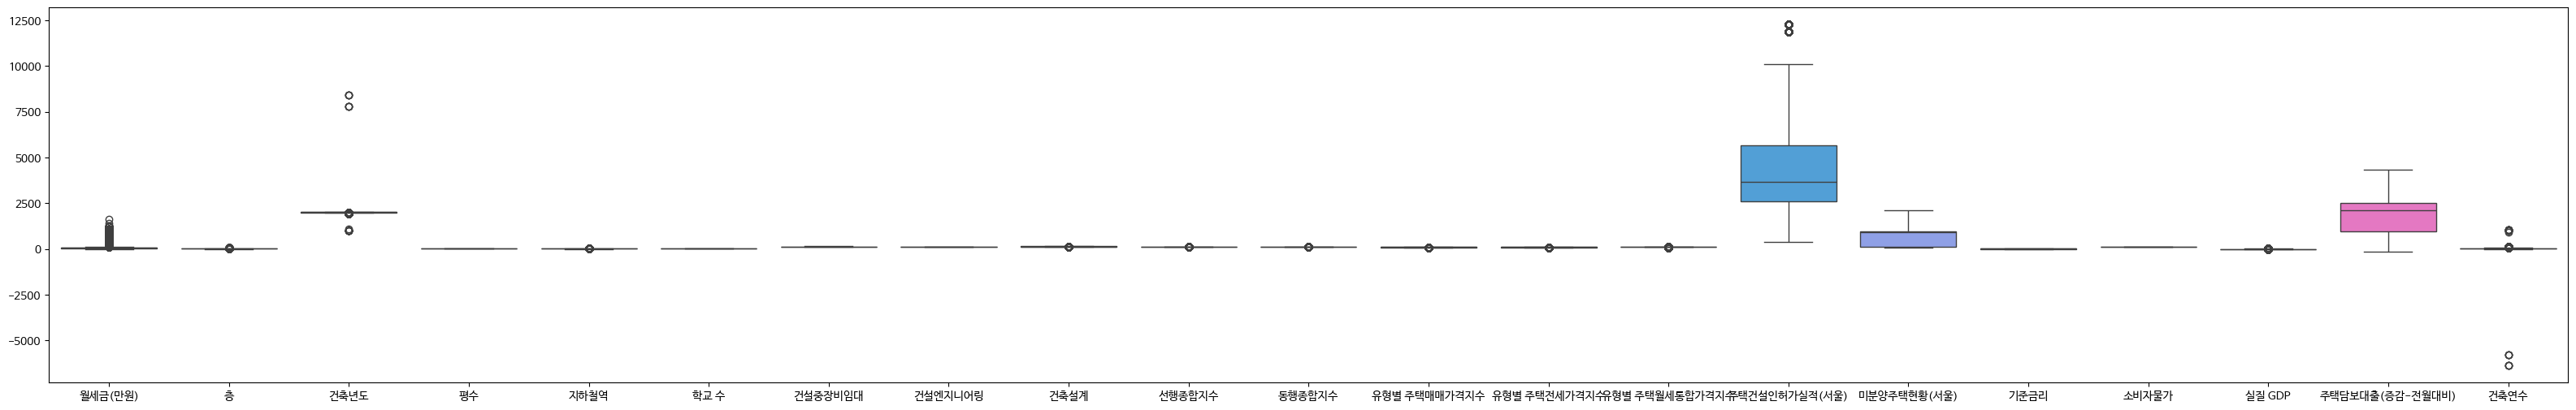

In [ ]:
plt.figure(figsize=(40, 6))
sns.boxplot(data=numeric_columns)

In [ ]:
#왜도 ,첨도
for i , columns in enumerate(numeric_columns):
  print(f"{columns} 왜도 : {numeric_columns[columns].skew()}, 첨도 : {numeric_columns[columns].kurt()}")

보증금(만원) 왜도 : 4.61544297211344, 첨도 : 38.51768867880397
월세금(만원) 왜도 : 7.713329259226817, 첨도 : 149.56488842837018
층 왜도 : 2.3097676881540377, 첨도 : 6.530456355430129
건축년도 왜도 : 173.88528967664544, 첨도 : 49734.43920899457
평수 왜도 : 1.860402815834958, 첨도 : 5.885224122478638
지하철역 왜도 : 0.8394869102371664, 첨도 : 0.2542786085626849
학교 수 왜도 : 0.5673097748964869, 첨도 : -0.4398971766084365
건설중장비임대 왜도 : -0.8722770501507753, 첨도 : -0.8624984219186609
건설엔지니어링 왜도 : -0.5018744508288205, 첨도 : -0.9532461657712914
건축설계 왜도 : -1.1949934964951998, 첨도 : 0.2582722988888606
선행종합지수 왜도 : -0.597645786863475, 첨도 : -0.018390786186063046
동행종합지수 왜도 : -1.1712346941784026, 첨도 : 0.2085932414992624
유형별 주택매매가격지수 왜도 : -1.1317928813442029, 첨도 : 1.4687393798882629
유형별 주택전세가격지수 왜도 : -2.3833200866461985, 첨도 : 7.42125575083576
유형별 주택월세통합가격지수 왜도 : -3.0856938109201857, 첨도 : 10.93298237635194
주택건설인허가실적(서울) 왜도 : 1.2723080303745449, 첨도 : 2.1615022067912073
미분양주택현황(서울) 왜도 : 0.15340748574193494, 첨도 : 0.3056785052500701
기준금리 왜도 : -0.6322479202940

(array([  6185.,  11338.,  14641.,  32037.,   3529., 112187.,   1476.,
          2557.,   2564.,   1201., 179816.,   1027.,   1257.,    981.,
           673.,  10738.,    599.,    790.,    753.,    704.,  79073.,
           996.,    941.,    808.,    810.,   4977.,   1095.,   1336.,
           873.,    959.,  64281.,    931.,    951.,    942.,    981.,
          3260.,    813.,   1014.,    818.,    979.,  21006.,   1217.,
           961.,    755.,    862.,   2381.,    888.,    799.,    960.,
          1006.,  64709.,    980.,   1123.,   1262.,    715.,   2291.,
           754.,    677.,    705.,   1046.,  11242.,    885.,    845.,
           739.,    543.,   1373.,    635.,    557.,    541.,    582.,
         11843.,    512.,    515.,    652.,    553.,   1524.,    550.,
           551.,    685.,    466.,  11609.,    531.,    530.,    709.,
           583.,   1474.,    448.,    604.,    606.,    607.,   7835.,
           585.,    462.,    512.,    627.,   1064.,    628.,    430.,
      

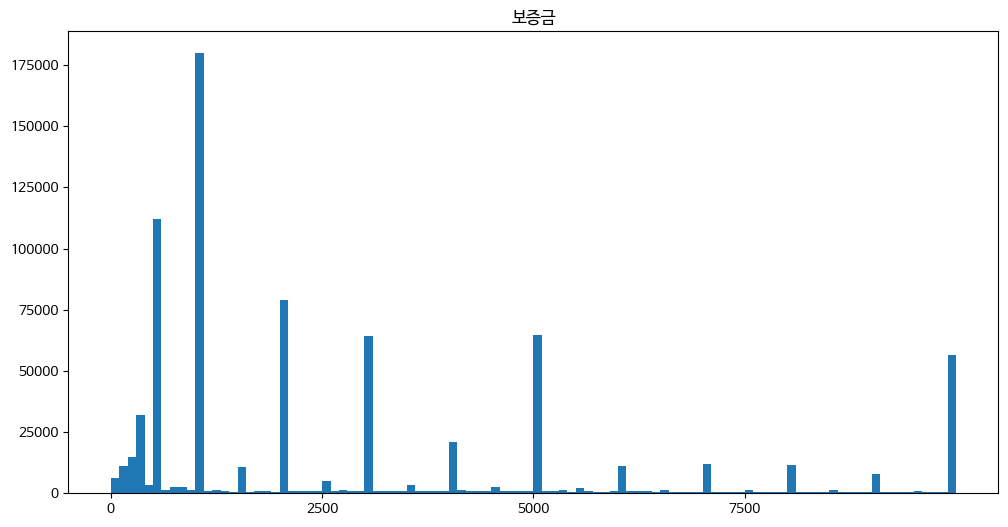

In [ ]:
plt.figure(figsize=(12,6))
plt.title("보증금")
plt.xticks(np.arange(0, 10000, 2500))
plt.hist(final_month_df['보증금(만원)'],bins=100,range=[0,10000])

(array([  148.,  1045.,  2038.,  2927.,  2679., 10578.,  4148.,  4323.,
         3687.,  3577., 24454.,  3327.,  4936.,  4421.,  4282., 16755.,
         3657.,  3570.,  3868.,  2674., 34145.,  3109.,  4106.,  4441.,
         3149., 24557.,  3050.,  4300.,  5372.,  4804., 55712.,  3181.,
         6399.,  6628.,  4163., 41145.,  4117.,  6946.,  7362.,  3672.,
        70454.,  2972.,  8262.,  7660.,  4063., 44697.,  3161.,  6849.,
         6433.,  2882., 79477.,  2085.,  5771.,  7320.,  2804., 34823.,
         2316.,  4261.,  5013.,  1786., 53139.,  1491.,  2525.,  5768.,
         1772., 22487.,  2003.,  2212.,  3450.,  1379., 33233.,  1038.,
         1698.,  2307.,  1762., 13812.,  1077.,  1336.,  1590.,  1048.,
        25905.,   526.,   885.,  1155.,  1672.,  8970.,   557.,   739.,
         1033.,   892., 14837.,   338.,   538.,   575.,   580.,  5722.,
          371.,   388.,   428., 23736.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12., 

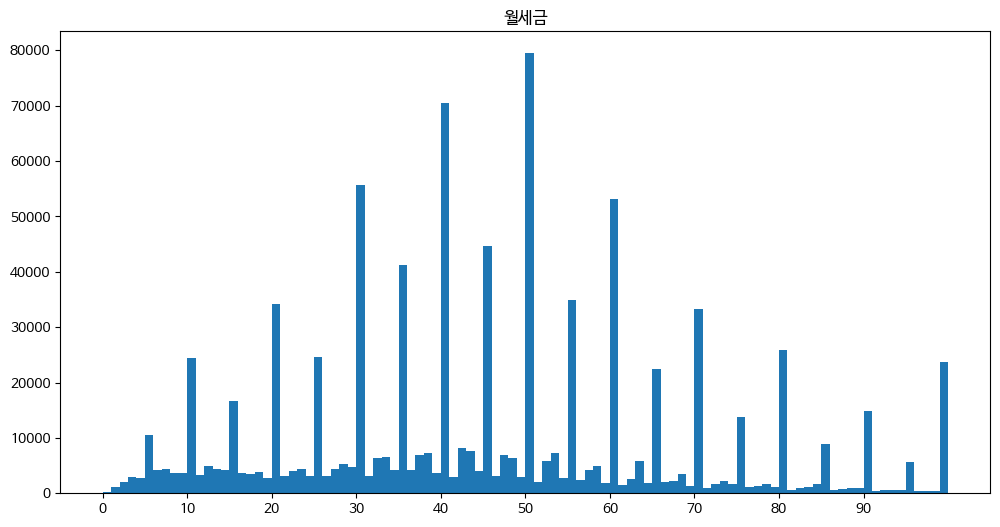

In [ ]:
plt.figure(figsize=(12,6))
plt.title("월세금")
plt.xticks(np.arange(0,100,10))
plt.hist(final_month_df['월세금(만원)'],bins=100,range=[0,100])

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

outlier=numeric_columns[['층','건축년도','평수']]
for i, columns in enumerate(outlier):

# Assuming final_month_df is already loaded
# Apply the function to your dataframe
  outlier_idx = get_outlier(df=final_month_df, column=columns, weight=1.5)

# Now drop the rows with the outlier indices
  final_month_df.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
select_num.columns

Index(['보증금(만원)', '월세금(만원)', '층', '건축년도', '평수', '지하철역', '학교 수', '건설중장비임대',
       '건설엔지니어링', '건축설계', '선행종합지수', '동행종합지수', '유형별 주택매매가격지수', '유형별 주택전세가격지수',
       '유형별 주택월세통합가격지수', '주택건설인허가실적(서울)', '미분양주택현황(서울)', '기준금리', '소비자물가',
       '실질 GDP', '주택담보대출(증감-전월대비)', 'isbasement', 'abs층', '건축연수', 'log월세금(만원)',
       'log평수', 'log_건축연수', 'logabs층'],
      dtype='object')

머신러닝

In [ ]:
X = select_df[features]
Y = select_df['월세금(억)']

In [ ]:
#분할
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)



In [ ]:
#랜덤포레스트 회귀
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #GridSearchCV

rf_Regressor = RandomForestRegressor(n_estimators=50, random_state=42)
rf_Regressor.fit(X_train_scaled,y_train)

print("RandomForest")
print("Train score",rf_Regressor.score(X_train_scaled,y_train))
print("Test score",rf_Regressor.score(X_test_scaled,y_test))

RandomForest
Train score 0.9510879131239847
Test score 0.6903247402496502


In [ ]:
# 예측
y_pred = rf_Regressor.predict(X_test_scaled)

ValueError: X has 28 features, but RandomForestRegressor is expecting 26 features as input.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score # Import r2_score
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root_mean Squared Error (MSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2}")

NameError: name 'y_pred' is not defined

In [ ]:
# R² 계산
r2_train = r2_score(y_train, y_train_pred) # Replace y_train with y_train_scaled
r2_test = r2_score(y_test, y_test_pred)   # Replace y_test with y_test_scaled

# 결과 출력
print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")

# 과적합 여부 판단
gap = r2_train - r2_test
if gap > 0.1:
    print("⚠️ 과적합 가능성 있음 (Train과 Test 성능 차이 큼)")
elif gap < -0.1:
    print("❓ 역과적합 가능성 (Test가 Train보다 높음 - 확인 필요)")
else:
    print("✅ 과적합 없음 - 안정적인 모델로 보임")

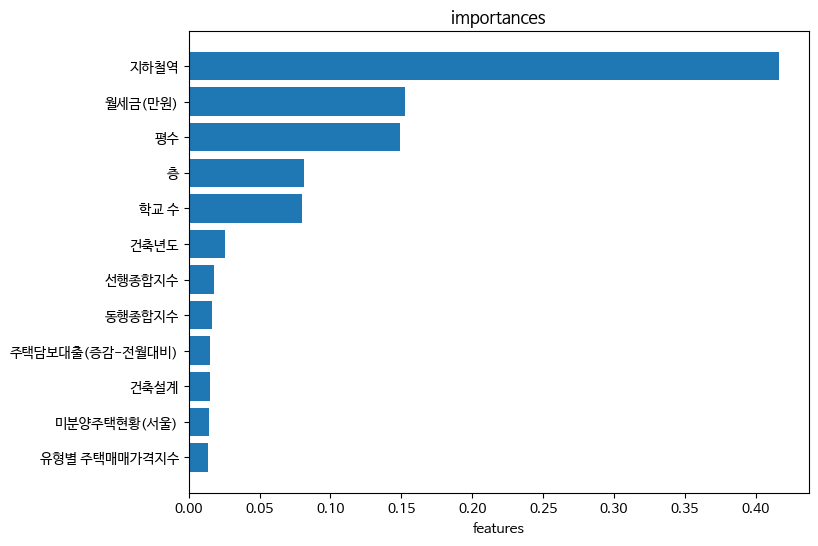

In [ ]:
#특성 중요도
importances = rf_Regressor.feature_importances_

# 특성 중요도 시각화
#features = X.columns # X is a numpy array, it does not have an attribute called columns
# Instead of using X.columns, since X was created from select_df, use the column names from select_df to get the features.
features = select_df.columns[[select_df.columns.get_loc(col) for col in num_cols]] # Get the features from num_cols defined before.
indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.title("importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("features")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score # Import r2_score
def get_score(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse= np.sqrt(mse)
    mae = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true, y_pred)
    print(model_name, 'root_mean_squared_error:',rmse,'mean_absolute_error:',mae,'r2_score: ',r2)

In [ ]:
pip install optuna

In [ ]:
import xgboost as xgb
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBRegressor(objective="reg:squarederror",random_state=42)
xgb_model.fit(X_train_scaled, y_train)

print("Train score",xgb_model.score(X_train_scaled,y_train))
print("Test score",xgb_model.score(X_test_scaled,y_test))

#예측
y_xgm_pred = xgb_model.predict(X_test_scaled)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

get_score('xgm',y_test,y_xgm_pred)



Train score 0.7082976015133214
Test score 0.6717353481497466
xgm root_mean_squared_error: 0.001979386823971671 mean_absolute_error: 0.001392393783004259 r2_score:  0.6717353481497466


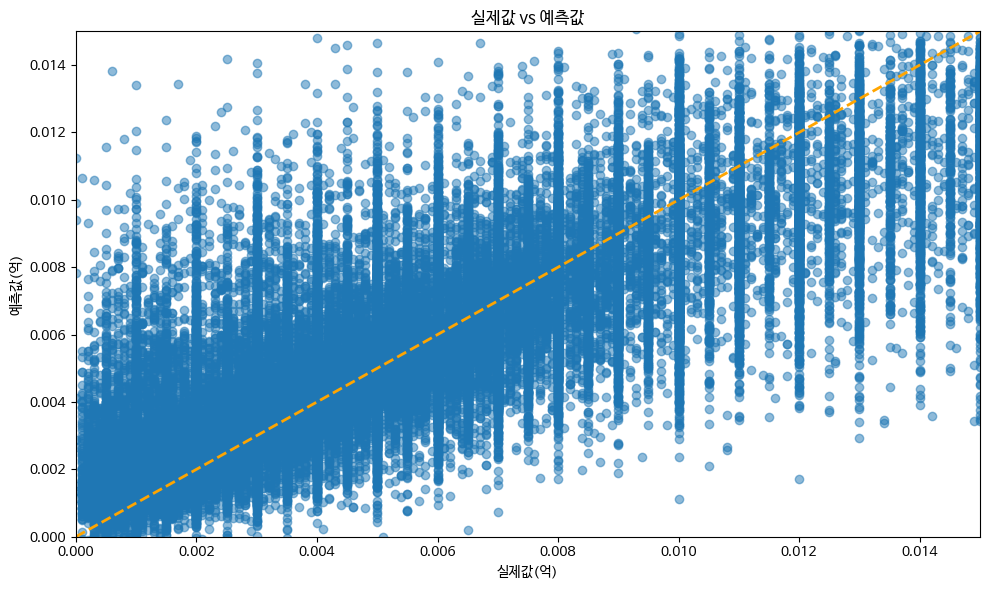

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_xgm_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange',linestyle='dashed', lw=2)
plt.xlabel("실제값(억)")
plt.ylabel("예측값(억)")
plt.title("실제값 vs 예측값")

# 범위 제한 (예: 0 ~ 0.015)
plt.xlim(0, 0.015)
plt.ylim(0, 0.015)

plt.tight_layout()
plt.show()

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }
    xgm_tun_model = xgb.XGBRegressor(**params)
    xgm_tun_model.fit(X_train_scaled, y_train)
    #예측
    y_xgm_pred = xgm_tun_model.predict(X_test_scaled)
    y_train_pred = xgm_tun_model.predict(X_train_scaled)
    y_test_pred = xgm_tun_model.predict(X_test_scaled)

    get_score('xgm',y_test,y_xgm_pred)

# reducing number of trials to 5
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

# you can access the results of all trials using study.trials_dataframe()
print(study.trials_dataframe())

print("Best params:", study.best_trial.params)

[I 2025-05-09 07:48:47,770] A new study created in memory with name: no-name-88415731-93c1-49c5-a678-c6eca6da0b52
[W 2025-05-09 07:48:54,153] Trial 0 failed with parameters: {'n_estimators': 388, 'max_depth': 4, 'learning_rate': 0.2317770130909285, 'subsample': 0.7577125914729091, 'colsample_bytree': 0.9609055422642172, 'gamma': 4.911251369778623, 'reg_alpha': 1.6535713310558515, 'reg_lambda': 4.635113133982412} because of the following error: The value None could not be cast to float..
[W 2025-05-09 07:48:54,154] Trial 0 failed with value None.


xgm root_mean_squared_error: 20.205165726975373 mean_absolute_error: 14.292650041057977 r2_score:  0.6579515682864292


[W 2025-05-09 07:49:30,631] Trial 1 failed with parameters: {'n_estimators': 788, 'max_depth': 9, 'learning_rate': 0.23039916323299672, 'subsample': 0.555793559827242, 'colsample_bytree': 0.5436064370537953, 'gamma': 0.09034924621798612, 'reg_alpha': 4.300247468188988, 'reg_lambda': 1.2643337455258559} because of the following error: The value None could not be cast to float..
[W 2025-05-09 07:49:30,632] Trial 1 failed with value None.


xgm root_mean_squared_error: 20.28580531628972 mean_absolute_error: 14.00578897263612 r2_score:  0.655215863256515


[W 2025-05-09 07:49:46,141] Trial 2 failed with parameters: {'n_estimators': 326, 'max_depth': 9, 'learning_rate': 0.0280491470247263, 'subsample': 0.7943251180295825, 'colsample_bytree': 0.587855827786762, 'gamma': 3.635826995344223, 'reg_alpha': 0.9794626735816597, 'reg_lambda': 0.6698386353732189} because of the following error: The value None could not be cast to float..
[W 2025-05-09 07:49:46,142] Trial 2 failed with value None.


xgm root_mean_squared_error: 19.043742312896196 mean_absolute_error: 13.3357132738352 r2_score:  0.6961443178601562


[W 2025-05-09 07:49:50,151] Trial 3 failed with parameters: {'n_estimators': 121, 'max_depth': 8, 'learning_rate': 0.2684895062849306, 'subsample': 0.7459827147037066, 'colsample_bytree': 0.8791370477535047, 'gamma': 4.406133444749764, 'reg_alpha': 4.630025483533795, 'reg_lambda': 3.168362836495296} because of the following error: The value None could not be cast to float..
[W 2025-05-09 07:49:50,152] Trial 3 failed with value None.


xgm root_mean_squared_error: 19.16773998332373 mean_absolute_error: 13.31092199552451 r2_score:  0.6921745036610223


[W 2025-05-09 07:50:05,772] Trial 4 failed with parameters: {'n_estimators': 441, 'max_depth': 8, 'learning_rate': 0.21257748087736608, 'subsample': 0.9557860095018671, 'colsample_bytree': 0.6073933560517771, 'gamma': 0.8286290227461507, 'reg_alpha': 3.5177215581562837, 'reg_lambda': 0.3036907532536187} because of the following error: The value None could not be cast to float..
[W 2025-05-09 07:50:05,774] Trial 4 failed with value None.


xgm root_mean_squared_error: 19.08925346682477 mean_absolute_error: 13.183048310473245 r2_score:  0.6946902604898462
   number value             datetime_start          datetime_complete  \
0       0  None 2025-05-09 07:48:47.772589 2025-05-09 07:48:54.153560   
1       1  None 2025-05-09 07:48:54.156430 2025-05-09 07:49:30.631320   
2       2  None 2025-05-09 07:49:30.633685 2025-05-09 07:49:46.140832   
3       3  None 2025-05-09 07:49:46.143458 2025-05-09 07:49:50.150941   
4       4  None 2025-05-09 07:49:50.152839 2025-05-09 07:50:05.772634   

                duration  params_colsample_bytree  params_gamma  \
0 0 days 00:00:06.380971                 0.960906      4.911251   
1 0 days 00:00:36.474890                 0.543606      0.090349   
2 0 days 00:00:15.507147                 0.587856      3.635827   
3 0 days 00:00:04.007483                 0.879137      4.406133   
4 0 days 00:00:15.619795                 0.607393      0.828629   

   params_learning_rate  params_max_depth

ValueError: No trials are completed yet.

In [ ]:
# R² 계산
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")

# 과적합 여부 판단
gap = r2_train - r2_test
if gap > 0.1:
    print("⚠️ 과적합 가능성 있음 (Train과 Test 성능 차이 큼)")
elif gap < -0.1:
    print("❓ 역과적합 가능성 (Test가 Train보다 높음 - 확인 필요)")
else:
    print("✅ 과적합 없음 - 안정적인 모델로 보임")

Train R²: 0.7107
Test  R²: 0.6747
✅ 과적합 없음 - 안정적인 모델로 보임


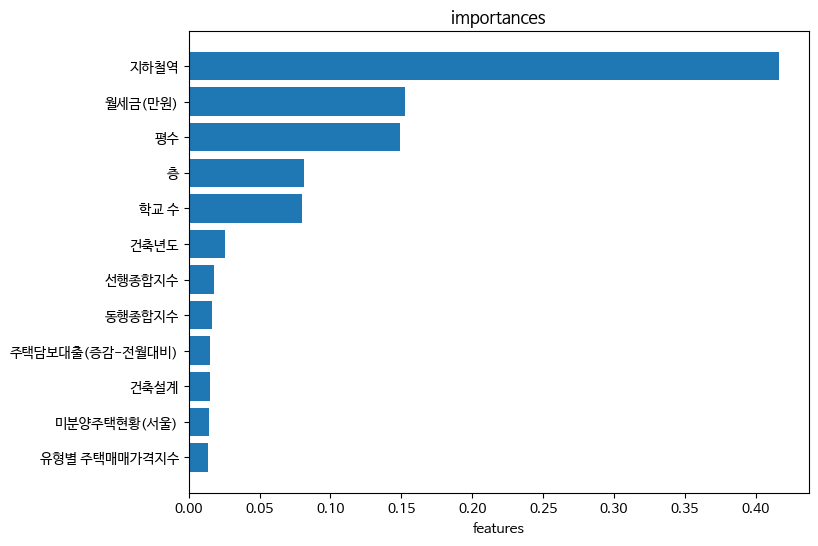

In [ ]:
# 특성 중요도 시각화
feature_importance = xgb_model.feature_importances_
# 특성 중요도 시각화
#features = X.columns # X is a numpy array, it does not have an attribute called columns
# Instead of using X.columns, since X was created from select_df, use the column names from select_df to get the features.
features = select_df.columns[[select_df.columns.get_loc(col) for col in num_cols]] # Get the features from num_cols defined before.
indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.title("importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("features")
plt.show()

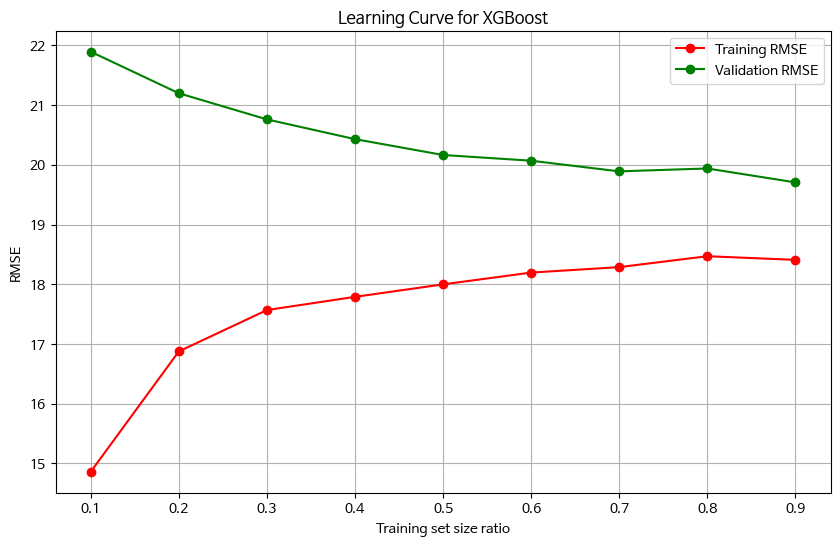

In [ ]:
# 학습 곡선
train_sizes = np.linspace(0.1, 0.9, 9)  # 0.1에서 0.9까지 9개의 값
train_losses = []
test_losses = []

for size in train_sizes:
    X_subset, _, y_subset, _ = train_test_split(X_train_scaled, y_train, train_size=size, random_state=42)
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_subset, y_subset)
    train_pred = model.predict(X_subset)
    test_pred = model.predict(X_test_scaled)
    train_losses.append(np.sqrt(mean_squared_error(y_subset, train_pred)))
    test_losses.append(np.sqrt(mean_squared_error(y_test, test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_losses, 'o-', color="r", label="Training RMSE")
plt.plot(train_sizes, test_losses, 'o-', color="g", label="Validation RMSE")
plt.xlabel("Training set size ratio")
plt.ylabel("RMSE")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
#LSTM
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,BatchNormalization

In [ ]:
seq_length = 12
LSTM_model = Sequential()
LSTM_model.add(LSTM(20, input_shape=(seq_length, 1)))
LSTM_model.add(BatchNormalization())
LSTM_model.add(Dense(1))  # 출력 뉴런 1개
LSTM_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

LSTM_model.fit(X_train_scaled, y_train, epochs=10, batch_size=64,callbacks=[early_stop])

In [ ]:
# 예측
y_LSTM_pred = LSTM_model.predict(X_test_scaled).flatten()

# 평가 지표
mae = mean_absolute_error(y_test, y_LSTM_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_LSTM_pred))
r2 = r2_score(y_test, y_LSTM_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

1722/1722 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
RMSE: 56.5092
MAE: 33.1973
R² Score: 0.5925


In [ ]:
LSTM_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 20)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,505 (21.51 KB)

 Trainable params: 1,821 (7.11 KB)

 Non-trainable params: 40 (160.00 B)

 Optimizer params: 3,644 (14.24 KB)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12,1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 회귀용 출력층

model.compile(optimizer='adam', loss='mse')

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6886/6886 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 7994.2451
Epoch 2/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - loss: 7250.3359
Epoch 3/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 7026.2085
Epoch 4/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 7314.7656
Epoch 5/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 7139.2886
Epoch 6/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 7135.3901
Epoch 7/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 7339.5742
Epoch 8/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 7216.1724
Epoch 9/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 7346.6689
Epoch 10/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 7369.1826
Epoch 11/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 7241.7949
Epoch 12/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 7081.4380
Epoch 13/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 7369.6162
Epoch 14/20
6886/6886 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - 

In [ ]:
# 예측
y_pred = ANN_model.predict(X_test_scaled).flatten()

# 평가 지표
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
RMSE: 55.3313
MAE: 31.9592
R² Score: 0.6093


In [ ]:
#앙상블 XGboosting , LSTM 시계열 성능 머신러닝

# 6. 앙상블 예측 (평균)
y_pred_ensemble = (y_LSTM_pred + y_xgm_pred) / 2

# 8. 평가 지표
mae = mean_absolute_error(y_test, y_pred_ensemble)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
r2 = r2_score(y_test, y_pred_ensemble)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 24.5345
RMSE: 43.4121
R² Score: 0.7595


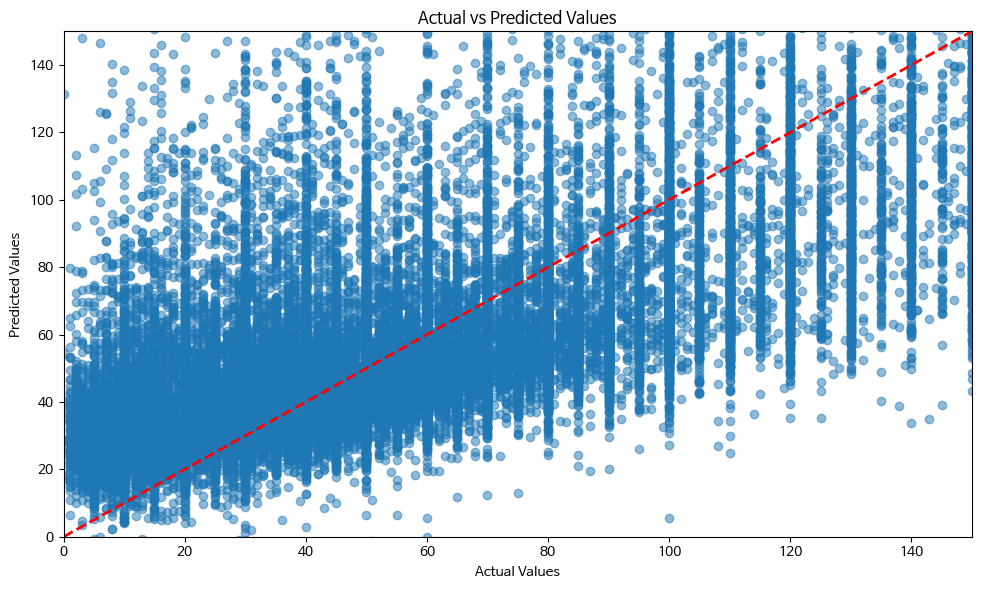

In [ ]:
# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.xlim([0,150])
plt.ylim([0,150])
plt.show()

In [ ]:
#SHAP
import shap

In [ ]:
explainer  = shap.Explainer(xgb_model)

In [ ]:
shap_values = explainer(X_train)

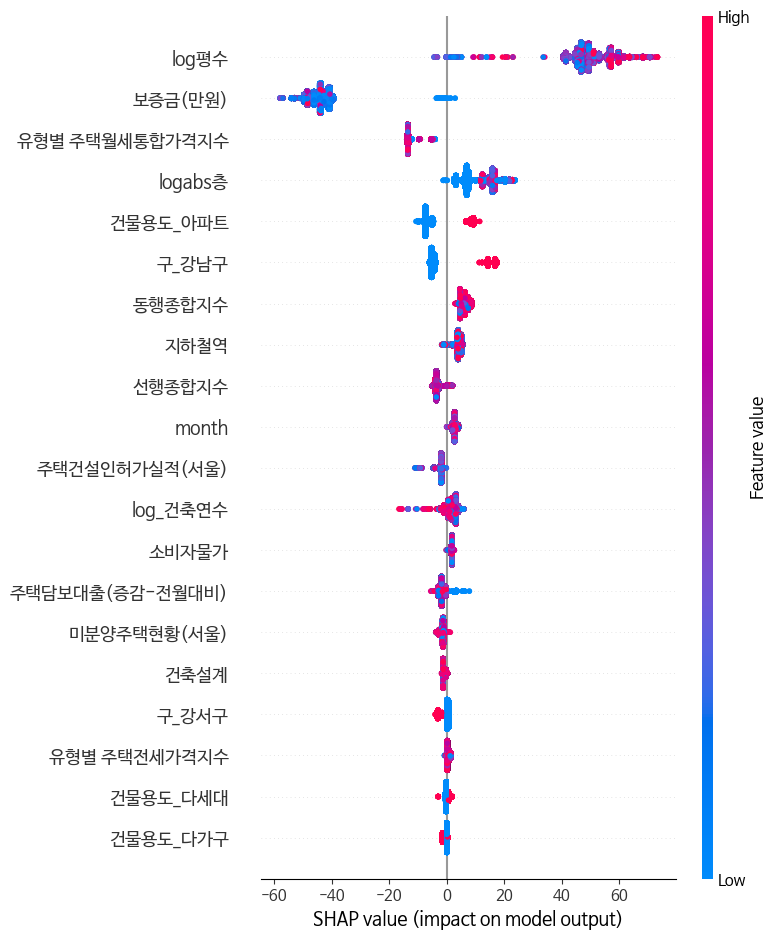

In [ ]:
shap.summary_plot(shap_values, X_test_scaled)

###머신러닝 + streamlit

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. 데이터 로드 및 feature 정의
df = pd.read_csv("/content/월세 머신러닝 전처리.csv", encoding='euc-kr')

features = [
    'log_평수', 'log_abs층', 'log_건축연수',
    '지하철역', '학교 수', '주택건설인허가실적(서울)',
    '미분양주택현황(서울)', '주택담보대출(증감-전월대비)',
    '유형별 주택월세통합가격지수', '선행종합지수', '동행종합지수', '건축설계',
    'log보증금(만원)', '유형별 주택전세가격지수', 'year', 'month', '기준금리',
    '소비자물가'
]
features += [col for col in df.columns if col.startswith('구') or col.startswith('건물용도')]

df = df.dropna(subset=features + ['log월세금(만원)'])

X = df[features]
y_log = df['log월세금(만원)']

# 로그값 이상치 제거
y_log = np.clip(y_log, None, 8.5)  # e^8.5 ≈ 4,900만 원

# 2. 데이터 분할
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3, random_state=42)

# 3. 정규화
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train_log.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test_log.values.reshape(-1, 1)).ravel()

# 4. XGBoost 모델 학습
xgb_model = xgb.XGBRegressor(
    max_depth=4,
    learning_rate=0.05,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train_scaled)

# 5. 예측 및 복원
y_train_pred_scaled = xgb_model.predict(X_train_scaled)
y_test_pred_scaled = xgb_model.predict(X_test_scaled)

y_train_pred_log = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred_log = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# 로그 복원 → 실제 월세
y_train_pred = np.expm1(y_train_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_test_actual = np.expm1(y_test_log)

# 6. 성능 평가
def get_score(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse= np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name}\n  RMSE: {rmse:.2f}\n  MAE: {mae:.2f}\n  R²: {r2:.4f}')

print("Train Score (raw):", xgb_model.score(X_train_scaled, y_train_scaled))
print("Test Score (raw):", xgb_model.score(X_test_scaled, y_test_scaled))
get_score("XGBoost 월세 모델", y_test_actual, y_test_pred)

In [ ]:
import joblib

# XGBoost 모델, 입력 스케일러, 출력 스케일러 저장
joblib.dump(xgb_model, 'monthly_rent_xgb_model.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

In [ ]:
app_code = '''
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# 모델 및 스케일러 로드
model = joblib.load('monthly_rent_xgb_model.pkl')
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# Feature 정의
expected_features = [
    'log_평수', 'log_abs층', 'log_건축연수', '지하철역', '학교 수', '주택건설인허가실적(서울)',
    '미분양주택현황(서울)', '주택담보대출(증감-전월대비)', '유형별 주택월세통합가격지수',
    '선행종합지수', '동행종합지수', '건축설계', 'log보증금(만원)', '유형별 주택전세가격지수',
    'year', 'month', '기준금리', '소비자물가',
    '구_강남구', '구_강서구', '구_관악구', '구_송파구',
    '건물용도_다가구', '건물용도_다세대', '건물용도_단독', '건물용도_아파트',
    '건물용도_연립', '건물용도_연립다세대'
]

st.title('🏢 서울시 월세 예측 시스템')

# 사용자 입력 받기
평수 = st.number_input('평수', min_value=1)
층 = st.number_input('층', min_value=-5, max_value=100)
건축연수 = st.number_input('건축 연수', min_value=0)
지하철역 = st.number_input('지하철역 개수', min_value=0)
학교수 = st.number_input('학교 수', min_value=0)
날짜 = st.date_input('거래일')
year, month = 날짜.year, 날짜.month
# 카테고리 선택
구_list = ['강남구', '강서구', '관악구', '송파구']
건물용도_list = ['다가구', '다세대', '단독', '아파트', '연립', '연립다세대']
선택_구 = st.selectbox('구 선택', 구_list)
선택_건물용도 = st.selectbox('건물 용도 선택', 건물용도_list)
건설인허가 = st.number_input('주택건설인허가실적(서울)', min_value=0)
미분양 = st.number_input('미분양주택현황(서울)', min_value=0)
대출증감 = st.number_input('주택담보대출(증감-전월대비)', min_value=0)
월세지수 = st.number_input('유형별 주택월세통합가격지수', min_value=0.0)
전세지수 = st.number_input('유형별 주택전세가격지수', min_value=0.0)
선행지수 = st.number_input('선행종합지수', min_value=0.0)
동행지수 = st.number_input('동행종합지수', min_value=0.0)
건축설계 = st.number_input('건축설계 건수', min_value=0)
보증금 = st.number_input('보증금(만원)', min_value=0)
기준금리 = st.number_input('기준금리', min_value=0.0)
소비자물가 = st.number_input('소비자물가', min_value=0.0)




if st.button('예측하기'):
    # 피처 처리
    X_input = {
        'log_평수': np.log1p(평수),
        'log_abs층': np.log1p(abs(층)),
        'log_건축연수': np.log1p(건축연수),
        '지하철역': 지하철역,
        '학교 수': 학교수,
        '주택건설인허가실적(서울)': 건설인허가,
        '미분양주택현황(서울)': 미분양,
        '주택담보대출(증감-전월대비)': 대출증감,
        '유형별 주택월세통합가격지수': 월세지수,
        '유형별 주택전세가격지수': 전세지수,
        '선행종합지수': 선행지수,
        '동행종합지수': 동행지수,
        '건축설계': 건축설계,
        'log보증금(만원)': np.log1p(보증금),
        '기준금리': 기준금리,
        '소비자물가': 소비자물가,
        'year': year,
        'month': month
    }

    # 구 및 건물용도 One-hot
    for 구 in 구_list:
        X_input[f'구_{구}'] = 1 if 선택_구 == 구 else 0
    for 용도 in 건물용도_list:
        X_input[f'건물용도_{용도}'] = 1 if 선택_건물용도 == 용도 else 0

    # 누락된 컬럼 채우기
    for col in expected_features:
        if col not in X_input:
            X_input[col] = 0

    X_df = pd.DataFrame([X_input])[expected_features]

    # 스케일링 후 예측
    X_scaled = scaler_X.transform(X_df)
    log_scaled_pred = model.predict(X_scaled).reshape(-1, 1)
    log_pred = scaler_y.inverse_transform(log_scaled_pred).ravel()[0]

    # 최종 월세 복원
    rent_pred = np.expm1(log_pred)


    st.success(f'💰 월세 예측값: {rent_pred:.2f} 만원')

'''

#✅ app.py 파일 자동 저장
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print("✅ app.py 파일 생성 완료!")